In [1]:
import numpy as np
from pykeen.triples import TriplesFactory
from pykeen.evaluation import RankBasedEvaluator

import torch

# Replace these lists with your actual triples data
triples = [('Dominican Republic', 'location', 'republic'), ('Dominican Republic', 'country', 'republic'), ('Dominican Republic', 'form_of_government', 'republic'), ('Mighty Morphin Power Rangers', 'tv', 'Wendee Lee'), ('Mighty Morphin Power Rangers', 'tv_program', 'Wendee Lee'), ('Mighty Morphin Power Rangers', 'regular_cast.', 'Wendee Lee'), ('Mighty Morphin Power Rangers', 'tv', 'Wendee Lee'), ('Mighty Morphin Power Rangers', 'regular_tv_appearance', 'Wendee Lee'), ('Mighty Morphin Power Rangers', 'actor', 'Wendee Lee'), ('drama film', 'media_common', 'American History X'), ('drama film', 'netflix_genre', 'American History X'), ('drama film', 'titles', 'American History X'), ('Michelle Rodriguez', 'award', 'Naveen Andrews'), ('Michelle Rodriguez', 'award_winner', 'Naveen Andrews'), ('Michelle Rodriguez', 'awards_won.', 'Naveen Andrews'), ('Michelle Rodriguez', 'award', 'Naveen Andrews'), ('Michelle Rodriguez', 'award_honor', 'Naveen Andrews'), ('Michelle Rodriguez', 'award_winner', 'Naveen Andrews'), ("Australia men's national soccer team", 'soccer', 'midfielder'), ("Australia men's national soccer team", 'football_team', 'midfielder'), ("Australia men's national soccer team", 'current_roster.', 'midfielder'), ("Australia men's national soccer team", 'sports', 'midfielder'), ("Australia men's national soccer team", 'sports_team_roster', 'midfielder'), ("Australia men's national soccer team", 'position', 'midfielder'), ('Maldives national football team', 'soccer', 'forward'), ('Maldives national football team', 'football_team', 'forward'), ('Maldives national football team', 'current_roster.', 'forward'), ('Maldives national football team', 'soccer', 'forward'), ('Maldives national football team', 'football_roster_position', 'forward'), ('Maldives national football team', 'position', 'forward'), ('Bryan Singer', 'film', 'Star Trek: Nemesis'), ('Bryan Singer', 'actor', 'Star Trek: Nemesis'), ('Bryan Singer', 'film.', 'Star Trek: Nemesis'), ('Bryan Singer', 'film', 'Star Trek: Nemesis'), ('Bryan Singer', 'performance', 'Star Trek: Nemesis'), ('Bryan Singer', 'film', 'Star Trek: Nemesis'), ('BAFTA Award for Best Original Screenplay', 'award', 'Philadelphia'), ('BAFTA Award for Best Original Screenplay', 'award_category', 'Philadelphia'), ('BAFTA Award for Best Original Screenplay', 'nominees.', 'Philadelphia'), ('BAFTA Award for Best Original Screenplay', 'award', 'Philadelphia'), ('BAFTA Award for Best Original Screenplay', 'award_nomination', 'Philadelphia'), ('BAFTA Award for Best Original Screenplay', 'nominated_for', 'Philadelphia'), ('Danny DeVito', 'award', 'Guy Pearce'), ('Danny DeVito', 'award_nominee', 'Guy Pearce'), ('Danny DeVito', 'award_nominations.', 'Guy Pearce'), ('Danny DeVito', 'award', 'Guy Pearce'), ('Danny DeVito', 'award_nomination', 'Guy Pearce'), ('Danny DeVito', 'award_nominee', 'Guy Pearce'), ('harpsichord', 'music', 'violin'), ('harpsichord', 'performance_role', 'violin'), ('harpsichord', 'regular_performances.', 'violin'), ('harpsichord', 'music', 'violin'), ('harpsichord', 'group_membership', 'violin'), ('harpsichord', 'role', 'violin'), ('Academy Award for Best International Feature Film', 'award', '61st Academy Awards'), ('Academy Award for Best International Feature Film', 'award_category', '61st Academy Awards'), ('Academy Award for Best International Feature Film', 'winners.', '61st Academy Awards'), ('Academy Award for Best International Feature Film', 'award', '61st Academy Awards'), ('Academy Award for Best International Feature Film', 'award_honor', '61st Academy Awards'), ('Academy Award for Best International Feature Film', 'ceremony', '61st Academy Awards'), ('Anonymous', 'film', 'DVD'), ('Anonymous', 'film', 'DVD'), ('Anonymous', 'release_date_s.', 'DVD'), ('Anonymous', 'film', 'DVD'), ('Anonymous', 'film_regional_release_date', 'DVD'), ('Anonymous', 'film_release_distribution_medium', 'DVD'), ('City of Angels', 'award', 'Gabriel Yared'), ('City of Angels', 'award_winning_work', 'Gabriel Yared'), ('City of Angels', 'awards_won.', 'Gabriel Yared'), ('City of Angels', 'award', 'Gabriel Yared'), ('City of Angels', 'award_honor', 'Gabriel Yared'), ('City of Angels', 'award_winner', 'Gabriel Yared'), ('Bridesmaids', 'film', 'Portugal'), ('Bridesmaids', 'film', 'Portugal'), ('Bridesmaids', 'release_date_s.', 'Portugal'), ('Bridesmaids', 'film', 'Portugal'), ('Bridesmaids', 'film_regional_release_date', 'Portugal'), ('Bridesmaids', 'film_release_region', 'Portugal'), ('Serpico', 'film', 'Italian'), ('Serpico', 'film', 'Italian'), ('Serpico', 'language', 'Italian'), ('Catherine Keener', 'award', 'Chris Cooper'), ('Catherine Keener', 'award_nominee', 'Chris Cooper'), ('Catherine Keener', 'award_nominations.', 'Chris Cooper'), ('Catherine Keener', 'award', 'Chris Cooper'), ('Catherine Keener', 'award_nomination', 'Chris Cooper'), ('Catherine Keener', 'award_nominee', 'Chris Cooper'), ('United States of America', 'location', 'St. Augustine'), ('United States of America', 'location', 'St. Augustine'), ('United States of America', 'contains', 'St. Augustine'), ('Stan Lee', 'film', 'X-Men'), ('Stan Lee', 'actor', 'X-Men'), ('Stan Lee', 'film.', 'X-Men'), ('Stan Lee', 'film', 'X-Men'), ('Stan Lee', 'performance', 'X-Men'), ('Stan Lee', 'film', 'X-Men'), ('California Institute of the Arts', 'organization', 'United States of America'), ('California Institute of the Arts', 'organization', 'United States of America'), ('California Institute of the Arts', 'headquarters.', 'United States of America'), ('California Institute of the Arts', 'location', 'United States of America'), ('California Institute of the Arts', 'mailing_address', 'United States of America'), ('California Institute of the Arts', 'country', 'United States of America'), ('Chiwetel Ejiofor', 'award', 'Carla Gugino'), ('Chiwetel Ejiofor', 'award_nominee', 'Carla Gugino'), ('Chiwetel Ejiofor', 'award_nominations.', 'Carla Gugino'), ('Chiwetel Ejiofor', 'award', 'Carla Gugino'), ('Chiwetel Ejiofor', 'award_nomination', 'Carla Gugino'), ('Chiwetel Ejiofor', 'award_nominee', 'Carla Gugino'), ('Golden Raspberry Award for Worst Supporting Actor', 'award', 'G.I. Joe: The Rise of Cobra'), ('Golden Raspberry Award for Worst Supporting Actor', 'award_category', 'G.I. Joe: The Rise of Cobra'), ('Golden Raspberry Award for Worst Supporting Actor', 'nominees.', 'G.I. Joe: The Rise of Cobra'), ('Golden Raspberry Award for Worst Supporting Actor', 'award', 'G.I. Joe: The Rise of Cobra'), ('Golden Raspberry Award for Worst Supporting Actor', 'award_nomination', 'G.I. Joe: The Rise of Cobra'), ('Golden Raspberry Award for Worst Supporting Actor', 'nominated_for', 'G.I. Joe: The Rise of Cobra'), ('Oprah Winfrey', 'people', 'theatrical producer'), ('Oprah Winfrey', 'person', 'theatrical producer'), ('Oprah Winfrey', 'profession', 'theatrical producer'), ('Washington D.C.', 'location', 'Christianity'), ('Washington D.C.', 'statistical_region', 'Christianity'), ('Washington D.C.', 'religions.', 'Christianity'), ('Washington D.C.', 'location', 'Christianity'), ('Washington D.C.', 'religion_percentage', 'Christianity'), ('Washington D.C.', 'religion', 'Christianity'), ('Saeed Jaffrey', 'award', 'BAFTA Award for Best Actor in a Supporting Role'), ('Saeed Jaffrey', 'award_nominee', 'BAFTA Award for Best Actor in a Supporting Role'), ('Saeed Jaffrey', 'award_nominations.', 'BAFTA Award for Best Actor in a Supporting Role'), ('Saeed Jaffrey', 'award', 'BAFTA Award for Best Actor in a Supporting Role'), ('Saeed Jaffrey', 'award_nomination', 'BAFTA Award for Best Actor in a Supporting Role'), ('Saeed Jaffrey', 'award', 'BAFTA Award for Best Actor in a Supporting Role'), ('heartland rock', 'music', 'Bob Seger'), ('heartland rock', 'genre', 'Bob Seger'), ('heartland rock', 'artists', 'Bob Seger'), ('Hunter S. Thompson', 'influence', 'William Faulkner'), ('Hunter S. Thompson', 'influence_node', 'William Faulkner'), ('Hunter S. Thompson', 'influenced_by', 'William Faulkner'), ('avant-garde jazz', 'music', 'John Coltrane'), ('avant-garde jazz', 'genre', 'John Coltrane'), ('avant-garde jazz', 'artists', 'John Coltrane'), ('Yale University', 'education', 'James Franco'), ('Yale University', 'educational_institution', 'James Franco'), ('Yale University', 'students_graduates.', 'James Franco'), ('Yale University', 'education', 'James Franco'), ('Yale University', 'education', 'James Franco'), ('Yale University', 'student', 'James Franco'), ('Frankenweenie', 'film', 'Portugal'), ('Frankenweenie', 'film', 'Portugal'), ('Frankenweenie', 'release_date_s.', 'Portugal'), ('Frankenweenie', 'film', 'Portugal'), ('Frankenweenie', 'film_regional_release_date', 'Portugal'), ('Frankenweenie', 'film_release_region', 'Portugal'), ('The Bahamas', 'organization', 'World Bank'), ('The Bahamas', 'organization_member', 'World Bank'), ('The Bahamas', 'member_of.', 'World Bank'), ('The Bahamas', 'organization', 'World Bank'), ('The Bahamas', 'organization_membership', 'World Bank'), ('The Bahamas', 'organization', 'World Bank'), ('Alan Burnett', 'people', 'United States of America'), ('Alan Burnett', 'person', 'United States of America'), ('Alan Burnett', 'place_of_birth', 'United States of America'), ('Bill Payne', 'people', 'record producer'), ('Bill Payne', 'person', 'record producer'), ('Bill Payne', 'profession', 'record producer'), ('Billy Ray Cyrus', 'common', '/m/08mbj5d'), ('Billy Ray Cyrus', 'topic', '/m/08mbj5d'), ('Billy Ray Cyrus', 'webpage.', '/m/08mbj5d'), ('Billy Ray Cyrus', 'common', '/m/08mbj5d'), ('Billy Ray Cyrus', 'webpage', '/m/08mbj5d'), ('Billy Ray Cyrus', 'category', '/m/08mbj5d'), ('Fantastic Four: Rise of the Silver Surfer', 'film', 'make-up artist'), ('Fantastic Four: Rise of the Silver Surfer', 'film', 'make-up artist'), ('Fantastic Four: Rise of the Silver Surfer', 'other_crew.', 'make-up artist'), ('Fantastic Four: Rise of the Silver Surfer', 'film', 'make-up artist'), ('Fantastic Four: Rise of the Silver Surfer', 'film_crew_gig', 'make-up artist'), ('Fantastic Four: Rise of the Silver Surfer', 'film_crew_role', 'make-up artist'), ('52nd Annual Grammy Awards', 'award', 'Dr. Dre'), ('52nd Annual Grammy Awards', 'award_ceremony', 'Dr. Dre'), ('52nd Annual Grammy Awards', 'awards_presented.', 'Dr. Dre'), ('52nd Annual Grammy Awards', 'award', 'Dr. Dre'), ('52nd Annual Grammy Awards', 'award_honor', 'Dr. Dre'), ('52nd Annual Grammy Awards', 'award_winner', 'Dr. Dre'), ('American Reunion', 'film', 'Argentina'), ('American Reunion', 'film', 'Argentina'), ('American Reunion', 'release_date_s.', 'Argentina'), ('American Reunion', 'film', 'Argentina'), ('American Reunion', 'film_regional_release_date', 'Argentina'), ('American Reunion', 'film_release_region', 'Argentina'), ('BAFTA Award for Best Makeup and Hair', 'award', 'Shakespeare in Love'), ('BAFTA Award for Best Makeup and Hair', 'award_category', 'Shakespeare in Love'), ('BAFTA Award for Best Makeup and Hair', 'nominees.', 'Shakespeare in Love'), ('BAFTA Award for Best Makeup and Hair', 'award', 'Shakespeare in Love'), ('BAFTA Award for Best Makeup and Hair', 'award_nomination', 'Shakespeare in Love'), ('BAFTA Award for Best Makeup and Hair', 'nominated_for', 'Shakespeare in Love'), ('The Love Guru', 'film', 'United States of America'), ('The Love Guru', 'film', 'United States of America'), ('The Love Guru', 'country', 'United States of America'), ('Jackie Chan', 'film', 'Around the World in 80 Days'), ('Jackie Chan', 'actor', 'Around the World in 80 Days'), ('Jackie Chan', 'film.', 'Around the World in 80 Days'), ('Jackie Chan', 'film', 'Around the World in 80 Days'), ('Jackie Chan', 'performance', 'Around the World in 80 Days'), ('Jackie Chan', 'film', 'Around the World in 80 Days'), ('triathlon', 'olympics', 'Mexico'), ('triathlon', 'olympic_sport', 'Mexico'), ('triathlon', 'athletes.', 'Mexico'), ('triathlon', 'olympics', 'Mexico'), ('triathlon', 'olympic_athlete_affiliation', 'Mexico'), ('triathlon', 'country', 'Mexico'), ('Wall Street', 'award', 'Golden Raspberry Award for Worst Supporting Actress'), ('Wall Street', 'award_winning_work', 'Golden Raspberry Award for Worst Supporting Actress'), ('Wall Street', 'awards_won.', 'Golden Raspberry Award for Worst Supporting Actress'), ('Wall Street', 'award', 'Golden Raspberry Award for Worst Supporting Actress'), ('Wall Street', 'award_honor', 'Golden Raspberry Award for Worst Supporting Actress'), ('Wall Street', 'award', 'Golden Raspberry Award for Worst Supporting Actress'), ('Top Gun', 'film', 'United States of America'), ('Top Gun', 'film', 'United States of America'), ('Top Gun', 'country', 'United States of America'), ('Rosemary Harris', 'award', 'Philip Seymour Hoffman'), ('Rosemary Harris', 'award_nominee', 'Philip Seymour Hoffman'), ('Rosemary Harris', 'award_nominations.', 'Philip Seymour Hoffman'), ('Rosemary Harris', 'award', 'Philip Seymour Hoffman'), ('Rosemary Harris', 'award_nomination', 'Philip Seymour Hoffman'), ('Rosemary Harris', 'award_nominee', 'Philip Seymour Hoffman'), ('Dave Brubeck', 'award', '/m/02581q'), ('Dave Brubeck', 'award_nominee', '/m/02581q'), ('Dave Brubeck', 'award_nominations.', '/m/02581q'), ('Dave Brubeck', 'award', '/m/02581q'), ('Dave Brubeck', 'award_nomination', '/m/02581q'), ('Dave Brubeck', 'award', '/m/02581q'), ('The Dresser', 'film', 'historical drama'), ('The Dresser', 'film', 'historical drama'), ('The Dresser', 'genre', 'historical drama'), ('Scott Rudin', 'award', 'Alan Bennett'), ('Scott Rudin', 'award_winner', 'Alan Bennett'), ('Scott Rudin', 'awards_won.', 'Alan Bennett'), ('Scott Rudin', 'award', 'Alan Bennett'), ('Scott Rudin', 'award_honor', 'Alan Bennett'), ('Scott Rudin', 'award_winner', 'Alan Bennett'), ('Miramax', 'film', 'The Cider House Rules'), ('Miramax', 'film_distributor', 'The Cider House Rules'), ('Miramax', 'films_distributed.', 'The Cider House Rules'), ('Miramax', 'film', 'The Cider House Rules'), ('Miramax', 'film_film_distributor_relationship', 'The Cider House Rules'), ('Miramax', 'film', 'The Cider House Rules'), ('Berrien County', 'location', 'United States dollar'), ('Berrien County', 'statistical_region', 'United States dollar'), ('Berrien County', 'rent50_2.', 'United States dollar'), ('Berrien County', 'measurement_unit', 'United States dollar'), ('Berrien County', 'dated_money_value', 'United States dollar'), ('Berrien County', 'currency', 'United States dollar'), ('eventing', 'olympics', 'Belgium'), ('eventing', 'olympic_sport', 'Belgium'), ('eventing', 'athletes.', 'Belgium'), ('eventing', 'olympics', 'Belgium'), ('eventing', 'olympic_athlete_affiliation', 'Belgium'), ('eventing', 'country', 'Belgium'), ('The Passion of the Christ', 'film', 'United States dollar'), ('The Passion of the Christ', 'film', 'United States dollar'), ('The Passion of the Christ', 'estimated_budget.', 'United States dollar'), ('The Passion of the Christ', 'measurement_unit', 'United States dollar'), ('The Passion of the Christ', 'dated_money_value', 'United States dollar'), ('The Passion of the Christ', 'currency', 'United States dollar'), ('32nd United States Congress', 'government', 'Ohio'), ('32nd United States Congress', 'legislative_session', 'Ohio'), ('32nd United States Congress', 'members.', 'Ohio'), ('32nd United States Congress', 'government', 'Ohio'), ('32nd United States Congress', 'government_position_held', 'Ohio'), ('32nd United States Congress', 'district_represented', 'Ohio'), ('/m/0fbq2n', 'sports', 'running back'), ('/m/0fbq2n', 'sports_team', 'running back'), ('/m/0fbq2n', 'roster.', 'running back'), ('/m/0fbq2n', 'american_football', 'running back'), ('/m/0fbq2n', 'football_historical_roster_position', 'running back'), ('/m/0fbq2n', 'position_s', 'running back'), ('prime minister', 'government', 'Dominica'), ('prime minister', 'government_office_category', 'Dominica'), ('prime minister', 'officeholders.', 'Dominica'), ('prime minister', 'government', 'Dominica'), ('prime minister', 'government_position_held', 'Dominica'), ('prime minister', 'jurisdiction_of_office', 'Dominica'), ('Roger Deakins', 'award', '/m/02vxq9m'), ('Roger Deakins', 'award_nominee', '/m/02vxq9m'), ('Roger Deakins', 'award_nominations.', '/m/02vxq9m'), ('Roger Deakins', 'award', '/m/02vxq9m'), ('Roger Deakins', 'award_nomination', '/m/02vxq9m'), ('Roger Deakins', 'nominated_for', '/m/02vxq9m'), ('Burt Young', 'film', 'Rocky V'), ('Burt Young', 'actor', 'Rocky V'), ('Burt Young', 'film.', 'Rocky V'), ('Burt Young', 'film', 'Rocky V'), ('Burt Young', 'performance', 'Rocky V'), ('Burt Young', 'film', 'Rocky V'), ('Ray Walston', 'people', 'Beverly Hills'), ('Ray Walston', 'deceased_person', 'Beverly Hills'), ('Ray Walston', 'place_of_death', 'Beverly Hills'), ('Don Cheadle', 'award', 'Larenz Tate'), ('Don Cheadle', 'award_winner', 'Larenz Tate'), ('Don Cheadle', 'awards_won.', 'Larenz Tate'), ('Don Cheadle', 'award', 'Larenz Tate'), ('Don Cheadle', 'award_honor', 'Larenz Tate'), ('Don Cheadle', 'award_winner', 'Larenz Tate'), ('John Barrowman', 'film', 'The Untouchables'), ('John Barrowman', 'actor', 'The Untouchables'), ('John Barrowman', 'film.', 'The Untouchables'), ('John Barrowman', 'film', 'The Untouchables'), ('John Barrowman', 'performance', 'The Untouchables'), ('John Barrowman', 'film', 'The Untouchables'), ('Technical University of Berlin', 'common', '/m/08mbj5d'), ('Technical University of Berlin', 'topic', '/m/08mbj5d'), ('Technical University of Berlin', 'webpage.', '/m/08mbj5d'), ('Technical University of Berlin', 'common', '/m/08mbj5d'), ('Technical University of Berlin', 'webpage', '/m/08mbj5d'), ('Technical University of Berlin', 'category', '/m/08mbj5d'), ('Cabaret', 'award', 'BAFTA Award for Best Film'), ('Cabaret', 'award_winning_work', 'BAFTA Award for Best Film'), ('Cabaret', 'awards_won.', 'BAFTA Award for Best Film'), ('Cabaret', 'award', 'BAFTA Award for Best Film'), ('Cabaret', 'award_honor', 'BAFTA Award for Best Film'), ('Cabaret', 'award', 'BAFTA Award for Best Film'), ('Richard Day', 'award', 'Thomas Little'), ('Richard Day', 'award_nominee', 'Thomas Little'), ('Richard Day', 'award_nominations.', 'Thomas Little'), ('Richard Day', 'award', 'Thomas Little'), ('Richard Day', 'award_nomination', 'Thomas Little'), ('Richard Day', 'award_nominee', 'Thomas Little'), ('Yale University', 'education', 'James Burrows'), ('Yale University', 'educational_institution', 'James Burrows'), ('Yale University', 'students_graduates.', 'James Burrows'), ('Yale University', 'education', 'James Burrows'), ('Yale University', 'education', 'James Burrows'), ('Yale University', 'student', 'James Burrows'), ('ACF Fiorentina', 'soccer', '/m/0dgrmp'), ('ACF Fiorentina', 'football_team', '/m/0dgrmp'), ('ACF Fiorentina', 'current_roster.', '/m/0dgrmp'), ('ACF Fiorentina', 'sports', '/m/0dgrmp'), ('ACF Fiorentina', 'sports_team_roster', '/m/0dgrmp'), ('ACF Fiorentina', 'position', '/m/0dgrmp'), ('Once Upon a Time in America', 'film', 'Italy'), ('Once Upon a Time in America', 'film', 'Italy'), ('Once Upon a Time in America', 'country', 'Italy'), ('Beijing', 'common', '/m/08mbj5d'), ('Beijing', 'topic', '/m/08mbj5d'), ('Beijing', 'webpage.', '/m/08mbj5d'), ('Beijing', 'common', '/m/08mbj5d'), ('Beijing', 'webpage', '/m/08mbj5d'), ('Beijing', 'category', '/m/08mbj5d'), ('David Healy', 'sports', 'Doncaster Rovers F.C.'), ('David Healy', 'pro_athlete', 'Doncaster Rovers F.C.'), ('David Healy', 'teams.', 'Doncaster Rovers F.C.'), ('David Healy', 'sports', 'Doncaster Rovers F.C.'), ('David Healy', 'sports_team_roster', 'Doncaster Rovers F.C.'), ('David Healy', 'team', 'Doncaster Rovers F.C.'), ('Jay Bennett', 'music', 'drum'), ('Jay Bennett', 'artist', 'drum'), ('Jay Bennett', 'track_contributions.', 'drum'), ('Jay Bennett', 'music', 'drum'), ('Jay Bennett', 'track_contribution', 'drum'), ('Jay Bennett', 'role', 'drum'), ('alto saxophone', 'music', 'Ray Charles'), ('alto saxophone', 'instrument', 'Ray Charles'), ('alto saxophone', 'instrumentalists', 'Ray Charles'), ('University of North Texas', 'education', 'Norah Jones'), ('University of North Texas', 'educational_institution', 'Norah Jones'), ('University of North Texas', 'students_graduates.', 'Norah Jones'), ('University of North Texas', 'education', 'Norah Jones'), ('University of North Texas', 'education', 'Norah Jones'), ('University of North Texas', 'student', 'Norah Jones'), ('Treasure Planet', 'film', 'DVD'), ('Treasure Planet', 'film', 'DVD'), ('Treasure Planet', 'release_date_s.', 'DVD'), ('Treasure Planet', 'film', 'DVD'), ('Treasure Planet', 'film_regional_release_date', 'DVD'), ('Treasure Planet', 'film_release_distribution_medium', 'DVD'), ('John Lee Hooker', 'people', 'singer-songwriter'), ('John Lee Hooker', 'person', 'singer-songwriter'), ('John Lee Hooker', 'profession', 'singer-songwriter'), ('Freddy Rodriguez', 'award', 'Justina Machado'), ('Freddy Rodriguez', 'award_winner', 'Justina Machado'), ('Freddy Rodriguez', 'awards_won.', 'Justina Machado'), ('Freddy Rodriguez', 'award', 'Justina Machado'), ('Freddy Rodriguez', 'award_honor', 'Justina Machado'), ('Freddy Rodriguez', 'award_winner', 'Justina Machado'), ('Battle Creek', 'common', '/m/08mbj5d'), ('Battle Creek', 'topic', '/m/08mbj5d'), ('Battle Creek', 'webpage.', '/m/08mbj5d'), ('Battle Creek', 'common', '/m/08mbj5d'), ('Battle Creek', 'webpage', '/m/08mbj5d'), ('Battle Creek', 'category', '/m/08mbj5d'), ('Rango', 'film', 'action film'), ('Rango', 'film', 'action film'), ('Rango', 'genre', 'action film'), ('Keith Urban', 'common', '/m/08mbj5d'), ('Keith Urban', 'topic', '/m/08mbj5d'), ('Keith Urban', 'webpage.', '/m/08mbj5d'), ('Keith Urban', 'common', '/m/08mbj5d'), ('Keith Urban', 'webpage', '/m/08mbj5d'), ('Keith Urban', 'category', '/m/08mbj5d'), ('guitar', 'music', 'synthesizer'), ('guitar', 'performance_role', 'synthesizer'), ('guitar', 'regular_performances.', 'synthesizer'), ('guitar', 'music', 'synthesizer'), ('guitar', 'group_membership', 'synthesizer'), ('guitar', 'role', 'synthesizer'), ('Brad Dourif', 'people', '/m/05zppz'), ('Brad Dourif', 'person', '/m/05zppz'), ('Brad Dourif', 'gender', '/m/05zppz'), ('internship', 'business', 'ESPN'), ('internship', 'job_title', 'ESPN'), ('internship', 'people_with_this_title.', 'ESPN'), ('internship', 'business', 'ESPN'), ('internship', 'employment_tenure', 'ESPN'), ('internship', 'company', 'ESPN'), ('Stephen Colbert', 'base', 'Steve Carell'), ('Stephen Colbert', 'popstra', 'Steve Carell'), ('Stephen Colbert', 'celebrity', 'Steve Carell'), ('Stephen Colbert', 'friendship.', 'Steve Carell'), ('Stephen Colbert', 'base', 'Steve Carell'), ('Stephen Colbert', 'popstra', 'Steve Carell'), ('Stephen Colbert', 'friendship', 'Steve Carell'), ('Stephen Colbert', 'participant', 'Steve Carell'), ('My Big Fat Greek Wedding', 'film', 'romantic comedy'), ('My Big Fat Greek Wedding', 'film', 'romantic comedy'), ('My Big Fat Greek Wedding', 'genre', 'romantic comedy'), ('Bulworth', 'film', 'DVD'), ('Bulworth', 'film', 'DVD'), ('Bulworth', 'release_date_s.', 'DVD'), ('Bulworth', 'film', 'DVD'), ('Bulworth', 'film_regional_release_date', 'DVD'), ('Bulworth', 'film_release_distribution_medium', 'DVD'), ('Anjelica Huston', 'people', 'Santa Monica'), ('Anjelica Huston', 'person', 'Santa Monica'), ('Anjelica Huston', 'place_of_birth', 'Santa Monica'), ('Valve Corporation', 'business', '/m/01mw1'), ('Valve Corporation', 'business_operation', '/m/01mw1'), ('Valve Corporation', 'industry', '/m/01mw1'), ('Grammy Award for Best Rock Song', 'award', 'Sting'), ('Grammy Award for Best Rock Song', 'award_category', 'Sting'), ('Grammy Award for Best Rock Song', 'winners.', 'Sting'), ('Grammy Award for Best Rock Song', 'award', 'Sting'), ('Grammy Award for Best Rock Song', 'award_honor', 'Sting'), ('Grammy Award for Best Rock Song', 'award_winner', 'Sting'), ('Insidious', 'film', 'United States of America'), ('Insidious', 'film', 'United States of America'), ('Insidious', 'release_date_s.', 'United States of America'), ('Insidious', 'film', 'United States of America'), ('Insidious', 'film_regional_release_date', 'United States of America'), ('Insidious', 'film_release_region', 'United States of America'), ('Tyrese Gibson', 'common', '/m/08mbj5d'), ('Tyrese Gibson', 'topic', '/m/08mbj5d'), ('Tyrese Gibson', 'webpage.', '/m/08mbj5d'), ('Tyrese Gibson', 'common', '/m/08mbj5d'), ('Tyrese Gibson', 'webpage', '/m/08mbj5d'), ('Tyrese Gibson', 'category', '/m/08mbj5d'), ('Quest for Fire', 'film', 'Japan'), ('Quest for Fire', 'film', 'Japan'), ('Quest for Fire', 'release_date_s.', 'Japan'), ('Quest for Fire', 'film', 'Japan'), ('Quest for Fire', 'film_regional_release_date', 'Japan'), ('Quest for Fire', 'film_release_region', 'Japan'), ('A Beautiful Mind', 'film', 'English'), ('A Beautiful Mind', 'film', 'English'), ('A Beautiful Mind', 'language', 'English'), ('Kaneto Shiozawa', 'people', 'Japan'), ('Kaneto Shiozawa', 'person', 'Japan'), ('Kaneto Shiozawa', 'nationality', 'Japan'), ('3 Idiots', 'film', 'comedy film'), ('3 Idiots', 'film', 'comedy film'), ('3 Idiots', 'genre', 'comedy film'), ('Cincinnati Reds', 'sports', 'starting pitcher'), ('Cincinnati Reds', 'sports_team', 'starting pitcher'), ('Cincinnati Reds', 'roster.', 'starting pitcher'), ('Cincinnati Reds', 'baseball', 'starting pitcher'), ('Cincinnati Reds', 'baseball_roster_position', 'starting pitcher'), ('Cincinnati Reds', 'position', 'starting pitcher'), ('Russell Crowe', 'film', 'A Beautiful Mind'), ('Russell Crowe', 'actor', 'A Beautiful Mind'), ('Russell Crowe', 'film.', 'A Beautiful Mind'), ('Russell Crowe', 'film', 'A Beautiful Mind'), ('Russell Crowe', 'performance', 'A Beautiful Mind'), ('Russell Crowe', 'film', 'A Beautiful Mind'), ('Sarah Lawrence College', 'education', 'Jon Avnet'), ('Sarah Lawrence College', 'educational_institution', 'Jon Avnet'), ('Sarah Lawrence College', 'students_graduates.', 'Jon Avnet'), ('Sarah Lawrence College', 'education', 'Jon Avnet'), ('Sarah Lawrence College', 'education', 'Jon Avnet'), ('Sarah Lawrence College', 'student', 'Jon Avnet'), ('vice president', 'business', 'Ford Motor Company'), ('vice president', 'job_title', 'Ford Motor Company'), ('vice president', 'people_with_this_title.', 'Ford Motor Company'), ('vice president', 'business', 'Ford Motor Company'), ('vice president', 'employment_tenure', 'Ford Motor Company'), ('vice president', 'company', 'Ford Motor Company'), ('cancer', 'people', 'Laurence Olivier'), ('cancer', 'cause_of_death', 'Laurence Olivier'), ('cancer', 'people', 'Laurence Olivier'), ("Can't Stop the Music", 'film', 'cult film'), ("Can't Stop the Music", 'film', 'cult film'), ("Can't Stop the Music", 'genre', 'cult film'), ('The O.C.', 'tv', 'English'), ('The O.C.', 'tv_program', 'English'), ('The O.C.', 'languages', 'English'), ('Phyllis Smith', 'award', 'Rainn Wilson'), ('Phyllis Smith', 'award_nominee', 'Rainn Wilson'), ('Phyllis Smith', 'award_nominations.', 'Rainn Wilson'), ('Phyllis Smith', 'award', 'Rainn Wilson'), ('Phyllis Smith', 'award_nomination', 'Rainn Wilson'), ('Phyllis Smith', 'award_nominee', 'Rainn Wilson'), ('Danny Boyle', 'award', '/m/0f_nbyh'), ('Danny Boyle', 'award_nominee', '/m/0f_nbyh'), ('Danny Boyle', 'award_nominations.', '/m/0f_nbyh'), ('Danny Boyle', 'award', '/m/0f_nbyh'), ('Danny Boyle', 'award_nomination', '/m/0f_nbyh'), ('Danny Boyle', 'award', '/m/0f_nbyh'), ('Sunshine', 'film', 'Canada'), ('Sunshine', 'film', 'Canada'), ('Sunshine', 'country', 'Canada'), ('Babylon 5: The Gathering', 'film', '/m/02_n3z'), ('Babylon 5: The Gathering', 'film', '/m/02_n3z'), ('Babylon 5: The Gathering', 'other_crew.', '/m/02_n3z'), ('Babylon 5: The Gathering', 'film', '/m/02_n3z'), ('Babylon 5: The Gathering', 'film_crew_gig', '/m/02_n3z'), ('Babylon 5: The Gathering', 'film_crew_role', '/m/02_n3z'), ('reggae', 'music', 'world music'), ('reggae', 'genre', 'world music'), ('reggae', 'parent_genre', 'world music'), ('George Clooney', 'base', 'Krista Allen'), ('George Clooney', 'popstra', 'Krista Allen'), ('George Clooney', 'celebrity', 'Krista Allen'), ('George Clooney', 'breakup.', 'Krista Allen'), ('George Clooney', 'base', 'Krista Allen'), ('George Clooney', 'popstra', 'Krista Allen'), ('George Clooney', 'breakup', 'Krista Allen'), ('George Clooney', 'participant', 'Krista Allen'), ('Mississippi Burning', 'award', 'National Board of Review Award for Best Director'), ('Mississippi Burning', 'award_winning_work', 'National Board of Review Award for Best Director'), ('Mississippi Burning', 'awards_won.', 'National Board of Review Award for Best Director'), ('Mississippi Burning', 'award', 'National Board of Review Award for Best Director'), ('Mississippi Burning', 'award_honor', 'National Board of Review Award for Best Director'), ('Mississippi Burning', 'award', 'National Board of Review Award for Best Director'), ('Algeria', 'location', 'Algiers'), ('Algeria', 'country', 'Algiers'), ('Algeria', 'capital', 'Algiers'), ("Gulliver's Travels", 'tv', "Peter O'Toole"), ("Gulliver's Travels", 'tv_program', "Peter O'Toole"), ("Gulliver's Travels", 'regular_cast.', "Peter O'Toole"), ("Gulliver's Travels", 'tv', "Peter O'Toole"), ("Gulliver's Travels", 'regular_tv_appearance', "Peter O'Toole"), ("Gulliver's Travels", 'actor', "Peter O'Toole"), ('seiyū', 'film', 'Sailor Moon R: The Movie'), ('seiyū', 'special_film_performance_type', 'Sailor Moon R: The Movie'), ('seiyū', 'film_performance_type.', 'Sailor Moon R: The Movie'), ('seiyū', 'film', 'Sailor Moon R: The Movie'), ('seiyū', 'performance', 'Sailor Moon R: The Movie'), ('seiyū', 'film', 'Sailor Moon R: The Movie'), ('MTV Movie Award for Best Movie', 'award', 'Braveheart'), ('MTV Movie Award for Best Movie', 'award_category', 'Braveheart'), ('MTV Movie Award for Best Movie', 'nominees.', 'Braveheart'), ('MTV Movie Award for Best Movie', 'award', 'Braveheart'), ('MTV Movie Award for Best Movie', 'award_nomination', 'Braveheart'), ('MTV Movie Award for Best Movie', 'nominated_for', 'Braveheart'), ('Jon Bon Jovi', 'music', 'guitar'), ('Jon Bon Jovi', 'artist', 'guitar'), ('Jon Bon Jovi', 'track_contributions.', 'guitar'), ('Jon Bon Jovi', 'music', 'guitar'), ('Jon Bon Jovi', 'track_contribution', 'guitar'), ('Jon Bon Jovi', 'role', 'guitar'), ('math rock', 'music', 'alternative rock'), ('math rock', 'genre', 'alternative rock'), ('math rock', 'parent_genre', 'alternative rock'), ('Life is Beautiful', 'film', 'Sweden'), ('Life is Beautiful', 'film', 'Sweden'), ('Life is Beautiful', 'release_date_s.', 'Sweden'), ('Life is Beautiful', 'film', 'Sweden'), ('Life is Beautiful', 'film_regional_release_date', 'Sweden'), ('Life is Beautiful', 'film_release_region', 'Sweden'), ('Van Johnson', 'film', 'The Purple Rose of Cairo'), ('Van Johnson', 'actor', 'The Purple Rose of Cairo'), ('Van Johnson', 'film.', 'The Purple Rose of Cairo'), ('Van Johnson', 'film', 'The Purple Rose of Cairo'), ('Van Johnson', 'performance', 'The Purple Rose of Cairo'), ('Van Johnson', 'film', 'The Purple Rose of Cairo'), ('musical film', 'media_common', '/m/011yxg'), ('musical film', 'netflix_genre', '/m/011yxg'), ('musical film', 'titles', '/m/011yxg'), ('Iowa City', 'location', 'Iowa City'), ('Iowa City', 'hud_county_place', 'Iowa City'), ('Iowa City', 'place', 'Iowa City'), ('United Arab Emirates', 'organization', 'United Nations'), ('United Arab Emirates', 'organization_member', 'United Nations'), ('United Arab Emirates', 'member_of.', 'United Nations'), ('United Arab Emirates', 'organization', 'United Nations'), ('United Arab Emirates', 'organization_membership', 'United Nations'), ('United Arab Emirates', 'organization', 'United Nations'), ('electric guitar', 'music', 'percussion instrument'), ('electric guitar', 'performance_role', 'percussion instrument'), ('electric guitar', 'guest_performances.', 'percussion instrument'), ('electric guitar', 'music', 'percussion instrument'), ('electric guitar', 'recording_contribution', 'percussion instrument'), ('electric guitar', 'performance_role', 'percussion instrument'), ('piano', 'music', 'Jean-Michel Jarre'), ('piano', 'instrument', 'Jean-Michel Jarre'), ('piano', 'instrumentalists', 'Jean-Michel Jarre'), ('Denis Leary', 'people', 'film producer'), ('Denis Leary', 'person', 'film producer'), ('Denis Leary', 'profession', 'film producer'), ('Bergen County', 'location', 'Rockland County'), ('Bergen County', 'location', 'Rockland County'), ('Bergen County', 'adjoin_s.', 'Rockland County'), ('Bergen County', 'location', 'Rockland County'), ('Bergen County', 'adjoining_relationship', 'Rockland County'), ('Bergen County', 'adjoins', 'Rockland County'), ('Conrad Buff IV', 'award', 'Terminator 2: Judgment Day'), ('Conrad Buff IV', 'award_nominee', 'Terminator 2: Judgment Day'), ('Conrad Buff IV', 'award_nominations.', 'Terminator 2: Judgment Day'), ('Conrad Buff IV', 'award', 'Terminator 2: Judgment Day'), ('Conrad Buff IV', 'award_nomination', 'Terminator 2: Judgment Day'), ('Conrad Buff IV', 'nominated_for', 'Terminator 2: Judgment Day'), ('World War II', 'film', 'The Guns of Navarone'), ('World War II', 'film_subject', 'The Guns of Navarone'), ('World War II', 'films', 'The Guns of Navarone'), ('Josh Schwartz', 'base', 'United States dollar'), ('Josh Schwartz', 'schemastaging', 'United States dollar'), ('Josh Schwartz', 'person_extra', 'United States dollar'), ('Josh Schwartz', 'net_worth.', 'United States dollar'), ('Josh Schwartz', 'measurement_unit', 'United States dollar'), ('Josh Schwartz', 'dated_money_value', 'United States dollar'), ('Josh Schwartz', 'currency', 'United States dollar'), ('University of Pittsburgh', 'education', 'gold'), ('University of Pittsburgh', 'educational_institution', 'gold'), ('University of Pittsburgh', 'colors', 'gold'), ('Delaware County', 'base', 'New York'), ('Delaware County', 'aareas', 'New York'), ('Delaware County', 'schema', 'New York'), ('Delaware County', 'administrative_area', 'New York'), ('Delaware County', 'administrative_parent', 'New York'), ('Joshua Malina', 'award', 'The West Wing'), ('Joshua Malina', 'award_nominee', 'The West Wing'), ('Joshua Malina', 'award_nominations.', 'The West Wing'), ('Joshua Malina', 'award', 'The West Wing'), ('Joshua Malina', 'award_nomination', 'The West Wing'), ('Joshua Malina', 'nominated_for', 'The West Wing'), ('Val Kilmer', 'award', 'Batman Forever'), ('Val Kilmer', 'award_nominee', 'Batman Forever'), ('Val Kilmer', 'award_nominations.', 'Batman Forever'), ('Val Kilmer', 'award', 'Batman Forever'), ('Val Kilmer', 'award_nomination', 'Batman Forever'), ('Val Kilmer', 'nominated_for', 'Batman Forever'), ('Herbert Ross', 'people', 'film producer'), ('Herbert Ross', 'person', 'film producer'), ('Herbert Ross', 'profession', 'film producer'), ('/m/026mg3', 'award', '42nd Annual Grammy Awards'), ('/m/026mg3', 'award_category', '42nd Annual Grammy Awards'), ('/m/026mg3', 'winners.', '42nd Annual Grammy Awards'), ('/m/026mg3', 'award', '42nd Annual Grammy Awards'), ('/m/026mg3', 'award_honor', '42nd Annual Grammy Awards'), ('/m/026mg3', 'ceremony', '42nd Annual Grammy Awards'), ('Seeking a Friend for the End of the World', 'film', 'Lithuania'), ('Seeking a Friend for the End of the World', 'film', 'Lithuania'), ('Seeking a Friend for the End of the World', 'release_date_s.', 'Lithuania'), ('Seeking a Friend for the End of the World', 'film', 'Lithuania'), ('Seeking a Friend for the End of the World', 'film_regional_release_date', 'Lithuania'), ('Seeking a Friend for the End of the World', 'film_release_region', 'Lithuania'), ('president', 'organization', 'Hampton University'), ('president', 'role', 'Hampton University'), ('president', 'leaders.', 'Hampton University'), ('president', 'organization', 'Hampton University'), ('president', 'leadership', 'Hampton University'), ('president', 'organization', 'Hampton University'), ('Macclesfield Town F.C.', 'soccer', 'forward'), ('Macclesfield Town F.C.', 'football_team', 'forward'), ('Macclesfield Town F.C.', 'current_roster.', 'forward'), ('Macclesfield Town F.C.', 'soccer', 'forward'), ('Macclesfield Town F.C.', 'football_roster_position', 'forward'), ('Macclesfield Town F.C.', 'position', 'forward'), ('George Clooney', 'award', "Ocean's Thirteen"), ('George Clooney', 'award_nominee', "Ocean's Thirteen"), ('George Clooney', 'award_nominations.', "Ocean's Thirteen"), ('George Clooney', 'award', "Ocean's Thirteen"), ('George Clooney', 'award_nomination', "Ocean's Thirteen"), ('George Clooney', 'nominated_for', "Ocean's Thirteen"), ('Golden Raspberry Award for Worst Director', 'award', 'The Scarlet Letter'), ('Golden Raspberry Award for Worst Director', 'award_category', 'The Scarlet Letter'), ('Golden Raspberry Award for Worst Director', 'nominees.', 'The Scarlet Letter'), ('Golden Raspberry Award for Worst Director', 'award', 'The Scarlet Letter'), ('Golden Raspberry Award for Worst Director', 'award_nomination', 'The Scarlet Letter'), ('Golden Raspberry Award for Worst Director', 'nominated_for', 'The Scarlet Letter'), ('Pierre Boulez', 'people', 'writer'), ('Pierre Boulez', 'person', 'writer'), ('Pierre Boulez', 'profession', 'writer'), ('/m/0495ys', 'government', '/m/05l2z4'), ('/m/0495ys', 'legislative_session', '/m/05l2z4'), ('/m/0495ys', 'members.', '/m/05l2z4'), ('/m/0495ys', 'government', '/m/05l2z4'), ('/m/0495ys', 'government_position_held', '/m/05l2z4'), ('/m/0495ys', 'legislative_sessions', '/m/05l2z4'), ('1904 Summer Olympics', 'olympics', 'diving'), ('1904 Summer Olympics', 'olympic_games', 'diving'), ('1904 Summer Olympics', 'sports', 'diving'), ('Peter Morgan', 'people', 'London'), ('Peter Morgan', 'person', 'London'), ('Peter Morgan', 'places_lived.', 'London'), ('Peter Morgan', 'people', 'London'), ('Peter Morgan', 'place_lived', 'London'), ('Peter Morgan', 'location', 'London'), ('Prince of Persia: The Sands of Time', 'film', 'DVD'), ('Prince of Persia: The Sands of Time', 'film', 'DVD'), ('Prince of Persia: The Sands of Time', 'release_date_s.', 'DVD'), ('Prince of Persia: The Sands of Time', 'film', 'DVD'), ('Prince of Persia: The Sands of Time', 'film_regional_release_date', 'DVD'), ('Prince of Persia: The Sands of Time', 'film_release_distribution_medium', 'DVD'), ('Judd Apatow', 'award', 'Knocked Up'), ('Judd Apatow', 'award_nominee', 'Knocked Up'), ('Judd Apatow', 'award_nominations.', 'Knocked Up'), ('Judd Apatow', 'award', 'Knocked Up'), ('Judd Apatow', 'award_nomination', 'Knocked Up'), ('Judd Apatow', 'nominated_for', 'Knocked Up'), ('Levon Helm', 'award', 'Ricky Skaggs'), ('Levon Helm', 'award_nominee', 'Ricky Skaggs'), ('Levon Helm', 'award_nominations.', 'Ricky Skaggs'), ('Levon Helm', 'award', 'Ricky Skaggs'), ('Levon Helm', 'award_nomination', 'Ricky Skaggs'), ('Levon Helm', 'award_nominee', 'Ricky Skaggs'), ('Steve Buscemi', 'award', 'Jamie-Lynn Sigler'), ('Steve Buscemi', 'award_nominee', 'Jamie-Lynn Sigler'), ('Steve Buscemi', 'award_nominations.', 'Jamie-Lynn Sigler'), ('Steve Buscemi', 'award', 'Jamie-Lynn Sigler'), ('Steve Buscemi', 'award_nomination', 'Jamie-Lynn Sigler'), ('Steve Buscemi', 'award_nominee', 'Jamie-Lynn Sigler'), ('Submarine', 'film', 'drama film'), ('Submarine', 'film', 'drama film'), ('Submarine', 'genre', 'drama film'), ("Palme d'Or", 'award', 'film'), ("Palme d'Or", 'award_category', 'film'), ("Palme d'Or", 'disciplines_or_subjects', 'film'), ('Eileen Atkins', 'award', 'Primetime Emmy Award for Outstanding Supporting Actress in a Miniseries or a Movie'), ('Eileen Atkins', 'award_nominee', 'Primetime Emmy Award for Outstanding Supporting Actress in a Miniseries or a Movie'), ('Eileen Atkins', 'award_nominations.', 'Primetime Emmy Award for Outstanding Supporting Actress in a Miniseries or a Movie'), ('Eileen Atkins', 'award', 'Primetime Emmy Award for Outstanding Supporting Actress in a Miniseries or a Movie'), ('Eileen Atkins', 'award_nomination', 'Primetime Emmy Award for Outstanding Supporting Actress in a Miniseries or a Movie'), ('Eileen Atkins', 'award', 'Primetime Emmy Award for Outstanding Supporting Actress in a Miniseries or a Movie'), ('Patricia Arquette', 'film', 'Holes'), ('Patricia Arquette', 'actor', 'Holes'), ('Patricia Arquette', 'film.', 'Holes'), ('Patricia Arquette', 'film', 'Holes'), ('Patricia Arquette', 'performance', 'Holes'), ('Patricia Arquette', 'film', 'Holes'), ('rock and roll', 'music', 'ZZ Top'), ('rock and roll', 'genre', 'ZZ Top'), ('rock and roll', 'artists', 'ZZ Top'), ('Claudia Schiffer', 'award', 'Thomas Brodie-Sangster'), ('Claudia Schiffer', 'award_nominee', 'Thomas Brodie-Sangster'), ('Claudia Schiffer', 'award_nominations.', 'Thomas Brodie-Sangster'), ('Claudia Schiffer', 'award', 'Thomas Brodie-Sangster'), ('Claudia Schiffer', 'award_nomination', 'Thomas Brodie-Sangster'), ('Claudia Schiffer', 'award_nominee', 'Thomas Brodie-Sangster'), ('Warner Bros.', 'film', 'Watchmen'), ('Warner Bros.', 'film_distributor', 'Watchmen'), ('Warner Bros.', 'films_distributed.', 'Watchmen'), ('Warner Bros.', 'film', 'Watchmen'), ('Warner Bros.', 'film_film_distributor_relationship', 'Watchmen'), ('Warner Bros.', 'film', 'Watchmen'), ('/m/03hkv_r', 'award', 'The Help'), ('/m/03hkv_r', 'award_category', 'The Help'), ('/m/03hkv_r', 'nominees.', 'The Help'), ('/m/03hkv_r', 'award', 'The Help'), ('/m/03hkv_r', 'award_nomination', 'The Help'), ('/m/03hkv_r', 'nominated_for', 'The Help'), ('Dallas Cowboys', 'sports', 'Ohio State University'), ('Dallas Cowboys', 'professional_sports_team', 'Ohio State University'), ('Dallas Cowboys', 'draft_picks.', 'Ohio State University'), ('Dallas Cowboys', 'sports', 'Ohio State University'), ('Dallas Cowboys', 'sports_league_draft_pick', 'Ohio State University'), ('Dallas Cowboys', 'school', 'Ohio State University'), ('Australia', 'olympics', '1980 Summer Olympics'), ('Australia', 'olympic_participating_country', '1980 Summer Olympics'), ('Australia', 'medals_won.', '1980 Summer Olympics'), ('Australia', 'olympics', '1980 Summer Olympics'), ('Australia', 'olympic_medal_honor', '1980 Summer Olympics'), ('Australia', 'olympics', '1980 Summer Olympics'), ('The Ladykillers', 'film', 'Vietnamese'), ('The Ladykillers', 'film', 'Vietnamese'), ('The Ladykillers', 'language', 'Vietnamese'), ('The Usual Suspects', 'award', 'Benicio del Toro'), ('The Usual Suspects', 'award_winning_work', 'Benicio del Toro'), ('The Usual Suspects', 'awards_won.', 'Benicio del Toro'), ('The Usual Suspects', 'award', 'Benicio del Toro'), ('The Usual Suspects', 'award_honor', 'Benicio del Toro'), ('The Usual Suspects', 'award_winner', 'Benicio del Toro'), ('Frances McDormand', 'award', 'Bill Murray'), ('Frances McDormand', 'award_nominee', 'Bill Murray'), ('Frances McDormand', 'award_nominations.', 'Bill Murray'), ('Frances McDormand', 'award', 'Bill Murray'), ('Frances McDormand', 'award_nomination', 'Bill Murray'), ('Frances McDormand', 'award_nominee', 'Bill Murray'), ('Dustin Hoffman', 'base', 'Liev Schreiber'), ('Dustin Hoffman', 'popstra', 'Liev Schreiber'), ('Dustin Hoffman', 'celebrity', 'Liev Schreiber'), ('Dustin Hoffman', 'friendship.', 'Liev Schreiber'), ('Dustin Hoffman', 'base', 'Liev Schreiber'), ('Dustin Hoffman', 'popstra', 'Liev Schreiber'), ('Dustin Hoffman', 'friendship', 'Liev Schreiber'), ('Dustin Hoffman', 'participant', 'Liev Schreiber'), ('Owen Wilson', 'award', 'MTV Movie Award for Best On-Screen Duo'), ('Owen Wilson', 'award_nominee', 'MTV Movie Award for Best On-Screen Duo'), ('Owen Wilson', 'award_nominations.', 'MTV Movie Award for Best On-Screen Duo'), ('Owen Wilson', 'award', 'MTV Movie Award for Best On-Screen Duo'), ('Owen Wilson', 'award_nomination', 'MTV Movie Award for Best On-Screen Duo'), ('Owen Wilson', 'award', 'MTV Movie Award for Best On-Screen Duo'), ('Ukrainian', 'language', 'Kazakhstan'), ('Ukrainian', 'human_language', 'Kazakhstan'), ('Ukrainian', 'countries_spoken_in', 'Kazakhstan'), ('Urbana', 'common', '/m/08mbj5d'), ('Urbana', 'topic', '/m/08mbj5d'), ('Urbana', 'webpage.', '/m/08mbj5d'), ('Urbana', 'common', '/m/08mbj5d'), ('Urbana', 'webpage', '/m/08mbj5d'), ('Urbana', 'category', '/m/08mbj5d'), ('Jack Nicholson', 'film', "One Flew Over the Cuckoo's Nest"), ('Jack Nicholson', 'actor', "One Flew Over the Cuckoo's Nest"), ('Jack Nicholson', 'film.', "One Flew Over the Cuckoo's Nest"), ('Jack Nicholson', 'film', "One Flew Over the Cuckoo's Nest"), ('Jack Nicholson', 'performance', "One Flew Over the Cuckoo's Nest"), ('Jack Nicholson', 'film', "One Flew Over the Cuckoo's Nest"), ('Austin Powers: The Spy Who Shagged Me', 'film', 'comedy film'), ('Austin Powers: The Spy Who Shagged Me', 'film', 'comedy film'), ('Austin Powers: The Spy Who Shagged Me', 'genre', 'comedy film'), ('Resident Evil: Retribution', 'film', 'Colombia'), ('Resident Evil: Retribution', 'film', 'Colombia'), ('Resident Evil: Retribution', 'release_date_s.', 'Colombia'), ('Resident Evil: Retribution', 'film', 'Colombia'), ('Resident Evil: Retribution', 'film_regional_release_date', 'Colombia'), ('Resident Evil: Retribution', 'film_release_region', 'Colombia'), ('/m/02rbdlq', 'people', 'Neve Campbell'), ('/m/02rbdlq', 'ethnicity', 'Neve Campbell'), ('/m/02rbdlq', 'people', 'Neve Campbell'), ('The Hours', 'film', 'United States of America'), ('The Hours', 'film', 'United States of America'), ('The Hours', 'country', 'United States of America'), ('/m/03ckxdg', 'award', 'Another World'), ('/m/03ckxdg', 'award_nominee', 'Another World'), ('/m/03ckxdg', 'award_nominations.', 'Another World'), ('/m/03ckxdg', 'award', 'Another World'), ('/m/03ckxdg', 'award_nomination', 'Another World'), ('/m/03ckxdg', 'nominated_for', 'Another World'), ('Belgium', 'olympics', '2002 Winter Olympics'), ('Belgium', 'olympic_participating_country', '2002 Winter Olympics'), ('Belgium', 'athletes.', '2002 Winter Olympics'), ('Belgium', 'olympics', '2002 Winter Olympics'), ('Belgium', 'olympic_athlete_affiliation', '2002 Winter Olympics'), ('Belgium', 'olympics', '2002 Winter Olympics'), ('Sonic X', 'tv', 'Italian'), ('Sonic X', 'tv_program', 'Italian'), ('Sonic X', 'languages', 'Italian'), ('Jamaica', 'olympics', 'bronze medal'), ('Jamaica', 'olympic_participating_country', 'bronze medal'), ('Jamaica', 'medals_won.', 'bronze medal'), ('Jamaica', 'olympics', 'bronze medal'), ('Jamaica', 'olympic_medal_honor', 'bronze medal'), ('Jamaica', 'medal', 'bronze medal'), ('The Aristocrats', 'film', 'Penn Jillette'), ('The Aristocrats', 'film', 'Penn Jillette'), ('The Aristocrats', 'other_crew.', 'Penn Jillette'), ('The Aristocrats', 'film', 'Penn Jillette'), ('The Aristocrats', 'film_crew_gig', 'Penn Jillette'), ('The Aristocrats', 'crewmember', 'Penn Jillette'), ('Maria Bello', 'award', 'Eriq La Salle'), ('Maria Bello', 'award_nominee', 'Eriq La Salle'), ('Maria Bello', 'award_nominations.', 'Eriq La Salle'), ('Maria Bello', 'award', 'Eriq La Salle'), ('Maria Bello', 'award_nomination', 'Eriq La Salle'), ('Maria Bello', 'award_nominee', 'Eriq La Salle'), ('Alvin and the Chipmunks: Chipwrecked', 'film', 'Republic of Ireland'), ('Alvin and the Chipmunks: Chipwrecked', 'film', 'Republic of Ireland'), ('Alvin and the Chipmunks: Chipwrecked', 'release_date_s.', 'Republic of Ireland'), ('Alvin and the Chipmunks: Chipwrecked', 'film', 'Republic of Ireland'), ('Alvin and the Chipmunks: Chipwrecked', 'film_regional_release_date', 'Republic of Ireland'), ('Alvin and the Chipmunks: Chipwrecked', 'film_release_region', 'Republic of Ireland'), ('Stand by Me', 'film', 'Argentina'), ('Stand by Me', 'film', 'Argentina'), ('Stand by Me', 'release_date_s.', 'Argentina'), ('Stand by Me', 'film', 'Argentina'), ('Stand by Me', 'film_regional_release_date', 'Argentina'), ('Stand by Me', 'film_release_region', 'Argentina'), ('acoustic guitar', 'music', 'clavinet'), ('acoustic guitar', 'performance_role', 'clavinet'), ('acoustic guitar', 'track_performances.', 'clavinet'), ('acoustic guitar', 'music', 'clavinet'), ('acoustic guitar', 'track_contribution', 'clavinet'), ('acoustic guitar', 'role', 'clavinet'), ('Judd Hirsch', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Drama Series'), ('Judd Hirsch', 'award_nominee', 'Primetime Emmy Award for Outstanding Guest Actor in a Drama Series'), ('Judd Hirsch', 'award_nominations.', 'Primetime Emmy Award for Outstanding Guest Actor in a Drama Series'), ('Judd Hirsch', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Drama Series'), ('Judd Hirsch', 'award_nomination', 'Primetime Emmy Award for Outstanding Guest Actor in a Drama Series'), ('Judd Hirsch', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Drama Series'), ('Jason Bateman', 'film', 'DodgeBall: A True Underdog Story'), ('Jason Bateman', 'actor', 'DodgeBall: A True Underdog Story'), ('Jason Bateman', 'film.', 'DodgeBall: A True Underdog Story'), ('Jason Bateman', 'film', 'DodgeBall: A True Underdog Story'), ('Jason Bateman', 'performance', 'DodgeBall: A True Underdog Story'), ('Jason Bateman', 'film', 'DodgeBall: A True Underdog Story'), ('/m/050023', 'award', '/m/026dcvf'), ('/m/050023', 'award_nominee', '/m/026dcvf'), ('/m/050023', 'award_nominations.', '/m/026dcvf'), ('/m/050023', 'award', '/m/026dcvf'), ('/m/050023', 'award_nomination', '/m/026dcvf'), ('/m/050023', 'award_nominee', '/m/026dcvf'), ('Roadrunner Records', 'music', 'Rush'), ('Roadrunner Records', 'record_label', 'Rush'), ('Roadrunner Records', 'artist', 'Rush'), ('Teri Hatcher', 'base', 'Dean Cain'), ('Teri Hatcher', 'popstra', 'Dean Cain'), ('Teri Hatcher', 'celebrity', 'Dean Cain'), ('Teri Hatcher', 'dated.', 'Dean Cain'), ('Teri Hatcher', 'base', 'Dean Cain'), ('Teri Hatcher', 'popstra', 'Dean Cain'), ('Teri Hatcher', 'dated', 'Dean Cain'), ('Teri Hatcher', 'participant', 'Dean Cain'), ('Vincent Pastore', 'award', 'Michael Imperioli'), ('Vincent Pastore', 'award_winner', 'Michael Imperioli'), ('Vincent Pastore', 'awards_won.', 'Michael Imperioli'), ('Vincent Pastore', 'award', 'Michael Imperioli'), ('Vincent Pastore', 'award_honor', 'Michael Imperioli'), ('Vincent Pastore', 'award_winner', 'Michael Imperioli'), ('Indiana', 'location', 'Terre Haute'), ('Indiana', 'location', 'Terre Haute'), ('Indiana', 'contains', 'Terre Haute'), ('Anthony Hopkins', 'award', 'Broadcast Film Critics Association Award for Best Supporting Actor'), ('Anthony Hopkins', 'award_nominee', 'Broadcast Film Critics Association Award for Best Supporting Actor'), ('Anthony Hopkins', 'award_nominations.', 'Broadcast Film Critics Association Award for Best Supporting Actor'), ('Anthony Hopkins', 'award', 'Broadcast Film Critics Association Award for Best Supporting Actor'), ('Anthony Hopkins', 'award_nomination', 'Broadcast Film Critics Association Award for Best Supporting Actor'), ('Anthony Hopkins', 'award', 'Broadcast Film Critics Association Award for Best Supporting Actor'), ('1992 Winter Olympics', 'olympics', 'ice hockey'), ('1992 Winter Olympics', 'olympic_games', 'ice hockey'), ('1992 Winter Olympics', 'sports', 'ice hockey'), ('Europe', 'base', 'Poland'), ('Europe', 'locations', 'Poland'), ('Europe', 'continents', 'Poland'), ('Europe', 'countries_within', 'Poland'), ('Fredric March', 'award', 'Tony Award for Best Actor in a Play'), ('Fredric March', 'award_nominee', 'Tony Award for Best Actor in a Play'), ('Fredric March', 'award_nominations.', 'Tony Award for Best Actor in a Play'), ('Fredric March', 'award', 'Tony Award for Best Actor in a Play'), ('Fredric March', 'award_nomination', 'Tony Award for Best Actor in a Play'), ('Fredric March', 'award', 'Tony Award for Best Actor in a Play'), ('Lawrence Bender', 'award', 'BAFTA Award for Best Film'), ('Lawrence Bender', 'award_nominee', 'BAFTA Award for Best Film'), ('Lawrence Bender', 'award_nominations.', 'BAFTA Award for Best Film'), ('Lawrence Bender', 'award', 'BAFTA Award for Best Film'), ('Lawrence Bender', 'award_nomination', 'BAFTA Award for Best Film'), ('Lawrence Bender', 'award', 'BAFTA Award for Best Film'), ('Stewart Copeland', 'people', 'Beirut'), ('Stewart Copeland', 'person', 'Beirut'), ('Stewart Copeland', 'places_lived.', 'Beirut'), ('Stewart Copeland', 'people', 'Beirut'), ('Stewart Copeland', 'place_lived', 'Beirut'), ('Stewart Copeland', 'location', 'Beirut'), ('MTV Movie Award for Best Song from a Movie', 'award', 'Robots'), ('MTV Movie Award for Best Song from a Movie', 'award_category', 'Robots'), ('MTV Movie Award for Best Song from a Movie', 'nominees.', 'Robots'), ('MTV Movie Award for Best Song from a Movie', 'award', 'Robots'), ('MTV Movie Award for Best Song from a Movie', 'award_nomination', 'Robots'), ('MTV Movie Award for Best Song from a Movie', 'nominated_for', 'Robots'), ('2005 NFL Draft', 'sports', 'Louisiana State University'), ('2005 NFL Draft', 'sports_league_draft', 'Louisiana State University'), ('2005 NFL Draft', 'picks.', 'Louisiana State University'), ('2005 NFL Draft', 'sports', 'Louisiana State University'), ('2005 NFL Draft', 'sports_league_draft_pick', 'Louisiana State University'), ('2005 NFL Draft', 'school', 'Louisiana State University'), ('Election 2', 'film', 'visual effects supervisor'), ('Election 2', 'film', 'visual effects supervisor'), ('Election 2', 'other_crew.', 'visual effects supervisor'), ('Election 2', 'film', 'visual effects supervisor'), ('Election 2', 'film_crew_gig', 'visual effects supervisor'), ('Election 2', 'film_crew_role', 'visual effects supervisor'), ('Crystal Palace F.C.', 'sports', 'association football'), ('Crystal Palace F.C.', 'sports_team', 'association football'), ('Crystal Palace F.C.', 'sport', 'association football'), ('Broadcast Film Critics Association Awards 2001', 'award', 'James Wilby'), ('Broadcast Film Critics Association Awards 2001', 'award_ceremony', 'James Wilby'), ('Broadcast Film Critics Association Awards 2001', 'awards_presented.', 'James Wilby'), ('Broadcast Film Critics Association Awards 2001', 'award', 'James Wilby'), ('Broadcast Film Critics Association Awards 2001', 'award_honor', 'James Wilby'), ('Broadcast Film Critics Association Awards 2001', 'award_winner', 'James Wilby'), ('electronica', 'music', 'Garbage'), ('electronica', 'genre', 'Garbage'), ('electronica', 'artists', 'Garbage'), ('Ursula K. Le Guin', 'influence', 'J. R. R. Tolkien'), ('Ursula K. Le Guin', 'influence_node', 'J. R. R. Tolkien'), ('Ursula K. Le Guin', 'influenced_by', 'J. R. R. Tolkien'), ('Billy West', 'people', 'Detroit'), ('Billy West', 'person', 'Detroit'), ('Billy West', 'place_of_birth', 'Detroit'), ('McGill University', 'education', 'McGill University'), ('McGill University', 'educational_institution_campus', 'McGill University'), ('McGill University', 'educational_institution', 'McGill University'), ('Southern rock', 'music', 'Neil Young'), ('Southern rock', 'genre', 'Neil Young'), ('Southern rock', 'artists', 'Neil Young'), ('Academy Award for Best Production Design', 'award', 'Sweeney Todd: The Demon Barber of Fleet Street'), ('Academy Award for Best Production Design', 'award_category', 'Sweeney Todd: The Demon Barber of Fleet Street'), ('Academy Award for Best Production Design', 'nominees.', 'Sweeney Todd: The Demon Barber of Fleet Street'), ('Academy Award for Best Production Design', 'award', 'Sweeney Todd: The Demon Barber of Fleet Street'), ('Academy Award for Best Production Design', 'award_nomination', 'Sweeney Todd: The Demon Barber of Fleet Street'), ('Academy Award for Best Production Design', 'nominated_for', 'Sweeney Todd: The Demon Barber of Fleet Street'), ('50th Annual Grammy Awards', 'award', 'Michael Brecker'), ('50th Annual Grammy Awards', 'award_ceremony', 'Michael Brecker'), ('50th Annual Grammy Awards', 'awards_presented.', 'Michael Brecker'), ('50th Annual Grammy Awards', 'award', 'Michael Brecker'), ('50th Annual Grammy Awards', 'award_honor', 'Michael Brecker'), ('50th Annual Grammy Awards', 'award_winner', 'Michael Brecker'), ('Emma Thompson', 'award', 'Liam Neeson'), ('Emma Thompson', 'award_nominee', 'Liam Neeson'), ('Emma Thompson', 'award_nominations.', 'Liam Neeson'), ('Emma Thompson', 'award', 'Liam Neeson'), ('Emma Thompson', 'award_nomination', 'Liam Neeson'), ('Emma Thompson', 'award_nominee', 'Liam Neeson'), ('Mahesh Bhatt', 'people', '/m/0flw86'), ('Mahesh Bhatt', 'person', '/m/0flw86'), ('Mahesh Bhatt', 'religion', '/m/0flw86'), ('Boardwalk Empire', 'tv', 'Michael Pitt'), ('Boardwalk Empire', 'tv_program', 'Michael Pitt'), ('Boardwalk Empire', 'regular_cast.', 'Michael Pitt'), ('Boardwalk Empire', 'tv', 'Michael Pitt'), ('Boardwalk Empire', 'regular_tv_appearance', 'Michael Pitt'), ('Boardwalk Empire', 'actor', 'Michael Pitt'), ('Helen Hunt', 'award', 'Tom Hanks'), ('Helen Hunt', 'award_nominee', 'Tom Hanks'), ('Helen Hunt', 'award_nominations.', 'Tom Hanks'), ('Helen Hunt', 'award', 'Tom Hanks'), ('Helen Hunt', 'award_nomination', 'Tom Hanks'), ('Helen Hunt', 'award_nominee', 'Tom Hanks'), ('ambient music', 'music', 'Portishead'), ('ambient music', 'genre', 'Portishead'), ('ambient music', 'artists', 'Portishead'), ('Ben-Hur', 'award', 'Academy Award for Best Sound'), ('Ben-Hur', 'award_winning_work', 'Academy Award for Best Sound'), ('Ben-Hur', 'awards_won.', 'Academy Award for Best Sound'), ('Ben-Hur', 'award', 'Academy Award for Best Sound'), ('Ben-Hur', 'award_honor', 'Academy Award for Best Sound'), ('Ben-Hur', 'award', 'Academy Award for Best Sound'), ('Xerox', 'organization', 'Norwalk'), ('Xerox', 'organization', 'Norwalk'), ('Xerox', 'headquarters.', 'Norwalk'), ('Xerox', 'location', 'Norwalk'), ('Xerox', 'mailing_address', 'Norwalk'), ('Xerox', 'citytown', 'Norwalk'), ('Snow White and the Huntsman', 'film', 'United States of America'), ('Snow White and the Huntsman', 'film', 'United States of America'), ('Snow White and the Huntsman', 'release_date_s.', 'United States of America'), ('Snow White and the Huntsman', 'film', 'United States of America'), ('Snow White and the Huntsman', 'film_regional_release_date', 'United States of America'), ('Snow White and the Huntsman', 'film_release_region', 'United States of America'), ('jazz', 'music', 'Diana Krall'), ('jazz', 'genre', 'Diana Krall'), ('jazz', 'artists', 'Diana Krall'), ('Saturn Award for Best Costume', 'award', 'Armageddon'), ('Saturn Award for Best Costume', 'award_category', 'Armageddon'), ('Saturn Award for Best Costume', 'nominees.', 'Armageddon'), ('Saturn Award for Best Costume', 'award', 'Armageddon'), ('Saturn Award for Best Costume', 'award_nomination', 'Armageddon'), ('Saturn Award for Best Costume', 'nominated_for', 'Armageddon'), ('Marilyn Monroe', 'award', 'Charlton Heston'), ('Marilyn Monroe', 'award_nominee', 'Charlton Heston'), ('Marilyn Monroe', 'award_nominations.', 'Charlton Heston'), ('Marilyn Monroe', 'award', 'Charlton Heston'), ('Marilyn Monroe', 'award_nomination', 'Charlton Heston'), ('Marilyn Monroe', 'award_nominee', 'Charlton Heston'), ('The Vow', 'film', 'United Kingdom'), ('The Vow', 'film', 'United Kingdom'), ('The Vow', 'country', 'United Kingdom'), ('Courteney Cox', 'people', 'female organism'), ('Courteney Cox', 'person', 'female organism'), ('Courteney Cox', 'gender', 'female organism'), ('Jesse Metcalfe', 'award', 'Felicity Huffman'), ('Jesse Metcalfe', 'award_nominee', 'Felicity Huffman'), ('Jesse Metcalfe', 'award_nominations.', 'Felicity Huffman'), ('Jesse Metcalfe', 'award', 'Felicity Huffman'), ('Jesse Metcalfe', 'award_nomination', 'Felicity Huffman'), ('Jesse Metcalfe', 'award_nominee', 'Felicity Huffman'), ('Chaplin', 'film', 'Mario Kassar'), ('Chaplin', 'film', 'Mario Kassar'), ('Chaplin', 'produced_by', 'Mario Kassar'), ('1992 Winter Olympics', 'olympics', 'biathlon'), ('1992 Winter Olympics', 'olympic_games', 'biathlon'), ('1992 Winter Olympics', 'sports', 'biathlon'), ('Will Smith', 'people', 'United States of America'), ('Will Smith', 'person', 'United States of America'), ('Will Smith', 'nationality', 'United States of America'), ('Academy Award for Best Sound', 'award', 'The Last Samurai'), ('Academy Award for Best Sound', 'award_category', 'The Last Samurai'), ('Academy Award for Best Sound', 'nominees.', 'The Last Samurai'), ('Academy Award for Best Sound', 'award', 'The Last Samurai'), ('Academy Award for Best Sound', 'award_nomination', 'The Last Samurai'), ('Academy Award for Best Sound', 'nominated_for', 'The Last Samurai'), ('Robert Rodriguez', 'people', 'film director'), ('Robert Rodriguez', 'person', 'film director'), ('Robert Rodriguez', 'profession', 'film director'), ('Ed Harris', 'award', 'Kathleen Quinlan'), ('Ed Harris', 'award_nominee', 'Kathleen Quinlan'), ('Ed Harris', 'award_nominations.', 'Kathleen Quinlan'), ('Ed Harris', 'award', 'Kathleen Quinlan'), ('Ed Harris', 'award_nomination', 'Kathleen Quinlan'), ('Ed Harris', 'award_nominee', 'Kathleen Quinlan'), ('/m/04lgymt', 'award', 'Grammy Award for Best Dance/Electronic Recording'), ('/m/04lgymt', 'award_nominee', 'Grammy Award for Best Dance/Electronic Recording'), ('/m/04lgymt', 'award_nominations.', 'Grammy Award for Best Dance/Electronic Recording'), ('/m/04lgymt', 'award', 'Grammy Award for Best Dance/Electronic Recording'), ('/m/04lgymt', 'award_nomination', 'Grammy Award for Best Dance/Electronic Recording'), ('/m/04lgymt', 'award', 'Grammy Award for Best Dance/Electronic Recording'), ('Real Zaragoza', 'soccer', 'defender'), ('Real Zaragoza', 'football_team', 'defender'), ('Real Zaragoza', 'current_roster.', 'defender'), ('Real Zaragoza', 'sports', 'defender'), ('Real Zaragoza', 'sports_team_roster', 'defender'), ('Real Zaragoza', 'position', 'defender'), ('Bridesmaids', 'film', 'Kazakhstan'), ('Bridesmaids', 'film', 'Kazakhstan'), ('Bridesmaids', 'release_date_s.', 'Kazakhstan'), ('Bridesmaids', 'film', 'Kazakhstan'), ('Bridesmaids', 'film_regional_release_date', 'Kazakhstan'), ('Bridesmaids', 'film_release_region', 'Kazakhstan'), ('Into the West', 'tv', 'Matthew Modine'), ('Into the West', 'tv_program', 'Matthew Modine'), ('Into the West', 'regular_cast.', 'Matthew Modine'), ('Into the West', 'tv', 'Matthew Modine'), ('Into the West', 'regular_tv_appearance', 'Matthew Modine'), ('Into the West', 'actor', 'Matthew Modine'), ('Goya Award for Best Original Screenplay', 'award', 'The Sea Inside'), ('Goya Award for Best Original Screenplay', 'award_category', 'The Sea Inside'), ('Goya Award for Best Original Screenplay', 'nominees.', 'The Sea Inside'), ('Goya Award for Best Original Screenplay', 'award', 'The Sea Inside'), ('Goya Award for Best Original Screenplay', 'award_nomination', 'The Sea Inside'), ('Goya Award for Best Original Screenplay', 'nominated_for', 'The Sea Inside'), ('Joe Hisaishi', 'people', 'Nagano Prefecture'), ('Joe Hisaishi', 'person', 'Nagano Prefecture'), ('Joe Hisaishi', 'places_lived.', 'Nagano Prefecture'), ('Joe Hisaishi', 'people', 'Nagano Prefecture'), ('Joe Hisaishi', 'place_lived', 'Nagano Prefecture'), ('Joe Hisaishi', 'location', 'Nagano Prefecture'), ('Primetime Emmy Award for Individual Performance in a Variety or Music Program', 'award', 'Barbra Streisand'), ('Primetime Emmy Award for Individual Performance in a Variety or Music Program', 'award_category', 'Barbra Streisand'), ('Primetime Emmy Award for Individual Performance in a Variety or Music Program', 'winners.', 'Barbra Streisand'), ('Primetime Emmy Award for Individual Performance in a Variety or Music Program', 'award', 'Barbra Streisand'), ('Primetime Emmy Award for Individual Performance in a Variety or Music Program', 'award_honor', 'Barbra Streisand'), ('Primetime Emmy Award for Individual Performance in a Variety or Music Program', 'award_winner', 'Barbra Streisand'), ('Miguel Sandoval', 'award', 'Robin Wright'), ('Miguel Sandoval', 'award_nominee', 'Robin Wright'), ('Miguel Sandoval', 'award_nominations.', 'Robin Wright'), ('Miguel Sandoval', 'award', 'Robin Wright'), ('Miguel Sandoval', 'award_nomination', 'Robin Wright'), ('Miguel Sandoval', 'award_nominee', 'Robin Wright'), ('Columbia Pictures', 'film', 'Restless'), ('Columbia Pictures', 'film_distributor', 'Restless'), ('Columbia Pictures', 'films_distributed.', 'Restless'), ('Columbia Pictures', 'film', 'Restless'), ('Columbia Pictures', 'film_film_distributor_relationship', 'Restless'), ('Columbia Pictures', 'film', 'Restless'), ('Betty Grable', 'base', 'George Raft'), ('Betty Grable', 'popstra', 'George Raft'), ('Betty Grable', 'celebrity', 'George Raft'), ('Betty Grable', 'dated.', 'George Raft'), ('Betty Grable', 'base', 'George Raft'), ('Betty Grable', 'popstra', 'George Raft'), ('Betty Grable', 'dated', 'George Raft'), ('Betty Grable', 'participant', 'George Raft'), ('Sarah Silverman', 'film', 'Bulworth'), ('Sarah Silverman', 'actor', 'Bulworth'), ('Sarah Silverman', 'film.', 'Bulworth'), ('Sarah Silverman', 'film', 'Bulworth'), ('Sarah Silverman', 'performance', 'Bulworth'), ('Sarah Silverman', 'film', 'Bulworth'), ('University of Iowa', 'education', 'David Sanborn'), ('University of Iowa', 'educational_institution', 'David Sanborn'), ('University of Iowa', 'students_graduates.', 'David Sanborn'), ('University of Iowa', 'education', 'David Sanborn'), ('University of Iowa', 'education', 'David Sanborn'), ('University of Iowa', 'student', 'David Sanborn'), ('Rachel Weisz', 'film', 'The Mummy'), ('Rachel Weisz', 'actor', 'The Mummy'), ('Rachel Weisz', 'film.', 'The Mummy'), ('Rachel Weisz', 'film', 'The Mummy'), ('Rachel Weisz', 'performance', 'The Mummy'), ('Rachel Weisz', 'film', 'The Mummy'), ('Philippines', 'base', 'Earth'), ('Philippines', 'aareas', 'Earth'), ('Philippines', 'schema', 'Earth'), ('Philippines', 'administrative_area', 'Earth'), ('Philippines', 'administrative_parent', 'Earth'), ('Buncombe County', 'location', 'Asheville'), ('Buncombe County', 'location', 'Asheville'), ('Buncombe County', 'contains', 'Asheville'), ('chief technology officer', 'business', 'Avid Technology'), ('chief technology officer', 'job_title', 'Avid Technology'), ('chief technology officer', 'people_with_this_title.', 'Avid Technology'), ('chief technology officer', 'business', 'Avid Technology'), ('chief technology officer', 'employment_tenure', 'Avid Technology'), ('chief technology officer', 'company', 'Avid Technology'), ('Mel Gibson', 'film', '/m/03h_yy'), ('Mel Gibson', 'actor', '/m/03h_yy'), ('Mel Gibson', 'film.', '/m/03h_yy'), ('Mel Gibson', 'film', '/m/03h_yy'), ('Mel Gibson', 'performance', '/m/03h_yy'), ('Mel Gibson', 'film', '/m/03h_yy'), ('Milla Jovovich', 'award', 'Golden Raspberry Award for Worst Supporting Actress'), ('Milla Jovovich', 'award_nominee', 'Golden Raspberry Award for Worst Supporting Actress'), ('Milla Jovovich', 'award_nominations.', 'Golden Raspberry Award for Worst Supporting Actress'), ('Milla Jovovich', 'award', 'Golden Raspberry Award for Worst Supporting Actress'), ('Milla Jovovich', 'award_nomination', 'Golden Raspberry Award for Worst Supporting Actress'), ('Milla Jovovich', 'award', 'Golden Raspberry Award for Worst Supporting Actress'), ('MTV Movie Award for Best Movie', 'award', 'The Hangover'), ('MTV Movie Award for Best Movie', 'award_category', 'The Hangover'), ('MTV Movie Award for Best Movie', 'nominees.', 'The Hangover'), ('MTV Movie Award for Best Movie', 'award', 'The Hangover'), ('MTV Movie Award for Best Movie', 'award_nomination', 'The Hangover'), ('MTV Movie Award for Best Movie', 'nominated_for', 'The Hangover'), ('Robert Clohessy', 'award', 'Jack Huston'), ('Robert Clohessy', 'award_nominee', 'Jack Huston'), ('Robert Clohessy', 'award_nominations.', 'Jack Huston'), ('Robert Clohessy', 'award', 'Jack Huston'), ('Robert Clohessy', 'award_nomination', 'Jack Huston'), ('Robert Clohessy', 'award_nominee', 'Jack Huston'), ('Brian Tyler', 'people', 'conducting'), ('Brian Tyler', 'person', 'conducting'), ('Brian Tyler', 'profession', 'conducting'), ('Nick Cave', 'people', 'marriage'), ('Nick Cave', 'person', 'marriage'), ('Nick Cave', 'spouse_s.', 'marriage'), ('Nick Cave', 'people', 'marriage'), ('Nick Cave', 'marriage', 'marriage'), ('Nick Cave', 'type_of_union', 'marriage'), ('/m/01d38g', 'award', 'Michael McDonald'), ('/m/01d38g', 'award_category', 'Michael McDonald'), ('/m/01d38g', 'winners.', 'Michael McDonald'), ('/m/01d38g', 'award', 'Michael McDonald'), ('/m/01d38g', 'award_honor', 'Michael McDonald'), ('/m/01d38g', 'award_winner', 'Michael McDonald'), ('drum', 'music', 'trombone'), ('drum', 'performance_role', 'trombone'), ('drum', 'track_performances.', 'trombone'), ('drum', 'music', 'trombone'), ('drum', 'track_contribution', 'trombone'), ('drum', 'role', 'trombone'), ('House of Wax', 'film', 'horror film'), ('House of Wax', 'film', 'horror film'), ('House of Wax', 'genre', 'horror film'), ('Avatar', 'film', '20th Century Studios'), ('Avatar', 'film', '20th Century Studios'), ('Avatar', 'production_companies', '20th Century Studios'), ('Locus Award for Best Science Fiction Novel', 'award', 'Charles Stross'), ('Locus Award for Best Science Fiction Novel', 'award_category', 'Charles Stross'), ('Locus Award for Best Science Fiction Novel', 'winners.', 'Charles Stross'), ('Locus Award for Best Science Fiction Novel', 'award', 'Charles Stross'), ('Locus Award for Best Science Fiction Novel', 'award_honor', 'Charles Stross'), ('Locus Award for Best Science Fiction Novel', 'award_winner', 'Charles Stross'), ('United States of America', 'location', 'Orange County'), ('United States of America', 'country', 'Orange County'), ('United States of America', 'second_level_divisions', 'Orange County'), ('Yale College', 'education', 'Yale College'), ('Yale College', 'educational_institution_campus', 'Yale College'), ('Yale College', 'educational_institution', 'Yale College'), ('Oakland Athletics', 'sports', 'Stanford University'), ('Oakland Athletics', 'professional_sports_team', 'Stanford University'), ('Oakland Athletics', 'draft_picks.', 'Stanford University'), ('Oakland Athletics', 'sports', 'Stanford University'), ('Oakland Athletics', 'sports_league_draft_pick', 'Stanford University'), ('Oakland Athletics', 'school', 'Stanford University'), ('A Fish Called Wanda', 'film', 'DVD'), ('A Fish Called Wanda', 'film', 'DVD'), ('A Fish Called Wanda', 'release_date_s.', 'DVD'), ('A Fish Called Wanda', 'film', 'DVD'), ('A Fish Called Wanda', 'film_regional_release_date', 'DVD'), ('A Fish Called Wanda', 'film_release_distribution_medium', 'DVD'), ('Brazil', 'olympics', '1972 Summer Olympics'), ('Brazil', 'olympic_participating_country', '1972 Summer Olympics'), ('Brazil', 'medals_won.', '1972 Summer Olympics'), ('Brazil', 'olympics', '1972 Summer Olympics'), ('Brazil', 'olympic_medal_honor', '1972 Summer Olympics'), ('Brazil', 'olympics', '1972 Summer Olympics'), ('Colm Meaney', 'film', 'The Last of the Mohicans'), ('Colm Meaney', 'actor', 'The Last of the Mohicans'), ('Colm Meaney', 'film.', 'The Last of the Mohicans'), ('Colm Meaney', 'film', 'The Last of the Mohicans'), ('Colm Meaney', 'performance', 'The Last of the Mohicans'), ('Colm Meaney', 'film', 'The Last of the Mohicans'), ('T. S. Eliot', 'people', 'United Kingdom'), ('T. S. Eliot', 'person', 'United Kingdom'), ('T. S. Eliot', 'nationality', 'United Kingdom'), ('/m/02p_7cr', 'award', 'Santa Barbara'), ('/m/02p_7cr', 'award_category', 'Santa Barbara'), ('/m/02p_7cr', 'nominees.', 'Santa Barbara'), ('/m/02p_7cr', 'award', 'Santa Barbara'), ('/m/02p_7cr', 'award_nomination', 'Santa Barbara'), ('/m/02p_7cr', 'nominated_for', 'Santa Barbara'), ('EDtv', 'film', 'English'), ('EDtv', 'film', 'English'), ('EDtv', 'language', 'English'), ('Academy Award for Best Actor', 'award', 'Judgment at Nuremberg'), ('Academy Award for Best Actor', 'award_category', 'Judgment at Nuremberg'), ('Academy Award for Best Actor', 'nominees.', 'Judgment at Nuremberg'), ('Academy Award for Best Actor', 'award', 'Judgment at Nuremberg'), ('Academy Award for Best Actor', 'award_nomination', 'Judgment at Nuremberg'), ('Academy Award for Best Actor', 'nominated_for', 'Judgment at Nuremberg'), ('LeVar Burton', 'award', '/m/02grdc'), ('LeVar Burton', 'award_nominee', '/m/02grdc'), ('LeVar Burton', 'award_nominations.', '/m/02grdc'), ('LeVar Burton', 'award', '/m/02grdc'), ('LeVar Burton', 'award_nomination', '/m/02grdc'), ('LeVar Burton', 'award', '/m/02grdc'), ('Ivan Reitman', 'people', '/m/05zppz'), ('Ivan Reitman', 'person', '/m/05zppz'), ('Ivan Reitman', 'gender', '/m/05zppz'), ('seiyū', 'film', "Howl's Moving Castle"), ('seiyū', 'special_film_performance_type', "Howl's Moving Castle"), ('seiyū', 'film_performance_type.', "Howl's Moving Castle"), ('seiyū', 'film', "Howl's Moving Castle"), ('seiyū', 'performance', "Howl's Moving Castle"), ('seiyū', 'film', "Howl's Moving Castle"), ('classical music', 'music', 'Claude Debussy'), ('classical music', 'genre', 'Claude Debussy'), ('classical music', 'artists', 'Claude Debussy'), ('Jaws 3-D', 'film', 'mystery fiction'), ('Jaws 3-D', 'film', 'mystery fiction'), ('Jaws 3-D', 'genre', 'mystery fiction'), ('Academy Award for Best Writing Adapted Screenplay', 'award', '46th Academy Awards'), ('Academy Award for Best Writing Adapted Screenplay', 'award_category', '46th Academy Awards'), ('Academy Award for Best Writing Adapted Screenplay', 'winners.', '46th Academy Awards'), ('Academy Award for Best Writing Adapted Screenplay', 'award', '46th Academy Awards'), ('Academy Award for Best Writing Adapted Screenplay', 'award_honor', '46th Academy Awards'), ('Academy Award for Best Writing Adapted Screenplay', 'ceremony', '46th Academy Awards'), ('Confessions of a Dangerous Mind', 'film', '/m/0lsxr'), ('Confessions of a Dangerous Mind', 'film', '/m/0lsxr'), ('Confessions of a Dangerous Mind', 'genre', '/m/0lsxr'), ('113th United States Congress', 'government', '/m/03ww_x'), ('113th United States Congress', 'legislative_session', '/m/03ww_x'), ('113th United States Congress', 'members.', '/m/03ww_x'), ('113th United States Congress', 'government', '/m/03ww_x'), ('113th United States Congress', 'government_position_held', '/m/03ww_x'), ('113th United States Congress', 'legislative_sessions', '/m/03ww_x'), ('Hannah Montana: The Movie', 'film', 'Egypt'), ('Hannah Montana: The Movie', 'film', 'Egypt'), ('Hannah Montana: The Movie', 'release_date_s.', 'Egypt'), ('Hannah Montana: The Movie', 'film', 'Egypt'), ('Hannah Montana: The Movie', 'film_regional_release_date', 'Egypt'), ('Hannah Montana: The Movie', 'film_release_region', 'Egypt'), ('/m/03xq0f', 'film', 'American History X'), ('/m/03xq0f', 'film_distributor', 'American History X'), ('/m/03xq0f', 'films_distributed.', 'American History X'), ('/m/03xq0f', 'film', 'American History X'), ('/m/03xq0f', 'film_film_distributor_relationship', 'American History X'), ('/m/03xq0f', 'film', 'American History X'), ('Lufthansa', 'common', '/m/08mbj5d'), ('Lufthansa', 'topic', '/m/08mbj5d'), ('Lufthansa', 'webpage.', '/m/08mbj5d'), ('Lufthansa', 'common', '/m/08mbj5d'), ('Lufthansa', 'webpage', '/m/08mbj5d'), ('Lufthansa', 'category', '/m/08mbj5d'), ('Gallipoli campaign', 'base', 'British Raj'), ('Gallipoli campaign', 'culturalevent', 'British Raj'), ('Gallipoli campaign', 'event', 'British Raj'), ('Gallipoli campaign', 'entity_involved', 'British Raj'), ('accordion', 'music', 'marimba'), ('accordion', 'performance_role', 'marimba'), ('accordion', 'track_performances.', 'marimba'), ('accordion', 'music', 'marimba'), ('accordion', 'track_contribution', 'marimba'), ('accordion', 'role', 'marimba'), ('The Full Monty', 'film', 'Searchlight Pictures'), ('The Full Monty', 'film', 'Searchlight Pictures'), ('The Full Monty', 'production_companies', 'Searchlight Pictures'), ('The Help', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Leading Role'), ('The Help', 'award_winning_work', 'Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Leading Role'), ('The Help', 'awards_won.', 'Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Leading Role'), ('The Help', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Leading Role'), ('The Help', 'award_honor', 'Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Leading Role'), ('The Help', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Leading Role'), ('Master of Business Administration', 'education', 'Central Michigan University'), ('Master of Business Administration', 'educational_degree', 'Central Michigan University'), ('Master of Business Administration', 'people_with_this_degree.', 'Central Michigan University'), ('Master of Business Administration', 'education', 'Central Michigan University'), ('Master of Business Administration', 'education', 'Central Michigan University'), ('Master of Business Administration', 'institution', 'Central Michigan University'), ('Wuthering Heights', 'film', 'visual effects supervisor'), ('Wuthering Heights', 'film', 'visual effects supervisor'), ('Wuthering Heights', 'other_crew.', 'visual effects supervisor'), ('Wuthering Heights', 'film', 'visual effects supervisor'), ('Wuthering Heights', 'film_crew_gig', 'visual effects supervisor'), ('Wuthering Heights', 'film_crew_role', 'visual effects supervisor'), ('Roots', 'tv', 'Cicely Tyson'), ('Roots', 'tv_program', 'Cicely Tyson'), ('Roots', 'regular_cast.', 'Cicely Tyson'), ('Roots', 'tv', 'Cicely Tyson'), ('Roots', 'regular_tv_appearance', 'Cicely Tyson'), ('Roots', 'actor', 'Cicely Tyson'), ('Star Wars: The Clone Wars', 'film', 'Blu-ray Disc'), ('Star Wars: The Clone Wars', 'film', 'Blu-ray Disc'), ('Star Wars: The Clone Wars', 'distributors.', 'Blu-ray Disc'), ('Star Wars: The Clone Wars', 'film', 'Blu-ray Disc'), ('Star Wars: The Clone Wars', 'film_film_distributor_relationship', 'Blu-ray Disc'), ('Star Wars: The Clone Wars', 'film_distribution_medium', 'Blu-ray Disc'), ('Dominic Monaghan', 'award', 'Orlando Bloom'), ('Dominic Monaghan', 'award_winner', 'Orlando Bloom'), ('Dominic Monaghan', 'awards_won.', 'Orlando Bloom'), ('Dominic Monaghan', 'award', 'Orlando Bloom'), ('Dominic Monaghan', 'award_honor', 'Orlando Bloom'), ('Dominic Monaghan', 'award_winner', 'Orlando Bloom'), ('Seinfeld', 'tv', 'executive producer'), ('Seinfeld', 'tv_program', 'executive producer'), ('Seinfeld', 'tv_producer.', 'executive producer'), ('Seinfeld', 'tv', 'executive producer'), ('Seinfeld', 'tv_producer_term', 'executive producer'), ('Seinfeld', 'producer_type', 'executive producer'), ('Haywire', 'film', 'Poland'), ('Haywire', 'film', 'Poland'), ('Haywire', 'release_date_s.', 'Poland'), ('Haywire', 'film', 'Poland'), ('Haywire', 'film_regional_release_date', 'Poland'), ('Haywire', 'film_release_region', 'Poland'), ('Jack Reacher', 'film', 'Canada'), ('Jack Reacher', 'film', 'Canada'), ('Jack Reacher', 'release_date_s.', 'Canada'), ('Jack Reacher', 'film', 'Canada'), ('Jack Reacher', 'film_regional_release_date', 'Canada'), ('Jack Reacher', 'film_release_region', 'Canada'), ('Jerry Belson', 'award', 'Jay Kogen'), ('Jerry Belson', 'award_nominee', 'Jay Kogen'), ('Jerry Belson', 'award_nominations.', 'Jay Kogen'), ('Jerry Belson', 'award', 'Jay Kogen'), ('Jerry Belson', 'award_nomination', 'Jay Kogen'), ('Jerry Belson', 'award_nominee', 'Jay Kogen'), ('BAFTA Award for Best Sound', 'award', 'Romeo + Juliet'), ('BAFTA Award for Best Sound', 'award_category', 'Romeo + Juliet'), ('BAFTA Award for Best Sound', 'nominees.', 'Romeo + Juliet'), ('BAFTA Award for Best Sound', 'award', 'Romeo + Juliet'), ('BAFTA Award for Best Sound', 'award_nomination', 'Romeo + Juliet'), ('BAFTA Award for Best Sound', 'nominated_for', 'Romeo + Juliet'), ('Brunel University London', 'common', '/m/08mbj5d'), ('Brunel University London', 'topic', '/m/08mbj5d'), ('Brunel University London', 'webpage.', '/m/08mbj5d'), ('Brunel University London', 'common', '/m/08mbj5d'), ('Brunel University London', 'webpage', '/m/08mbj5d'), ('Brunel University London', 'category', '/m/08mbj5d'), ('BAFTA Award for Best Special Visual Effects', 'award', 'WarGames'), ('BAFTA Award for Best Special Visual Effects', 'award_category', 'WarGames'), ('BAFTA Award for Best Special Visual Effects', 'nominees.', 'WarGames'), ('BAFTA Award for Best Special Visual Effects', 'award', 'WarGames'), ('BAFTA Award for Best Special Visual Effects', 'award_nomination', 'WarGames'), ('BAFTA Award for Best Special Visual Effects', 'nominated_for', 'WarGames'), ('guitar', 'music', 'Richard Wright'), ('guitar', 'instrument', 'Richard Wright'), ('guitar', 'instrumentalists', 'Richard Wright'), ('J. K. Simmons', 'people', 'Detroit'), ('J. K. Simmons', 'person', 'Detroit'), ('J. K. Simmons', 'place_of_birth', 'Detroit'), ('lead guitarist', 'music', 'Metallica'), ('lead guitarist', 'performance_role', 'Metallica'), ('lead guitarist', 'regular_performances.', 'Metallica'), ('lead guitarist', 'music', 'Metallica'), ('lead guitarist', 'group_membership', 'Metallica'), ('lead guitarist', 'group', 'Metallica'), ('Christopher Hampton', 'people', 'United Kingdom'), ('Christopher Hampton', 'person', 'United Kingdom'), ('Christopher Hampton', 'nationality', 'United Kingdom'), ('/m/013x0b', 'music', 'Dannii Minogue'), ('/m/013x0b', 'record_label', 'Dannii Minogue'), ('/m/013x0b', 'artist', 'Dannii Minogue'), ('The Prize', 'film', 'drama film'), ('The Prize', 'film', 'drama film'), ('The Prize', 'genre', 'drama film'), ('Daniel Inouye', 'government', '111th United States Congress'), ('Daniel Inouye', 'politician', '111th United States Congress'), ('Daniel Inouye', 'government_positions_held.', '111th United States Congress'), ('Daniel Inouye', 'government', '111th United States Congress'), ('Daniel Inouye', 'government_position_held', '111th United States Congress'), ('Daniel Inouye', 'legislative_sessions', '111th United States Congress'), ('Brian Wilson', 'people', 'bassist'), ('Brian Wilson', 'person', 'bassist'), ('Brian Wilson', 'profession', 'bassist'), ('Preity Zinta', 'award', 'Veer-Zaara'), ('Preity Zinta', 'award_nominee', 'Veer-Zaara'), ('Preity Zinta', 'award_nominations.', 'Veer-Zaara'), ('Preity Zinta', 'award', 'Veer-Zaara'), ('Preity Zinta', 'award_nomination', 'Veer-Zaara'), ('Preity Zinta', 'nominated_for', 'Veer-Zaara'), ('/m/02cl1', 'sports', 'Denver Nuggets'), ('/m/02cl1', 'sports_team_location', 'Denver Nuggets'), ('/m/02cl1', 'teams', 'Denver Nuggets'), ('Washington Nationals', 'sports', 'white'), ('Washington Nationals', 'sports_team', 'white'), ('Washington Nationals', 'colors', 'white'), ('Resident Evil', 'film', 'Belgium'), ('Resident Evil', 'film', 'Belgium'), ('Resident Evil', 'release_date_s.', 'Belgium'), ('Resident Evil', 'film', 'Belgium'), ('Resident Evil', 'film_regional_release_date', 'Belgium'), ('Resident Evil', 'film_release_region', 'Belgium'), ('Jeffrey Tambor', 'people', '/m/05zppz'), ('Jeffrey Tambor', 'person', '/m/05zppz'), ('Jeffrey Tambor', 'gender', '/m/05zppz'), ("Kevin O'Connell", 'award', 'Pearl Harbor'), ("Kevin O'Connell", 'award_nominee', 'Pearl Harbor'), ("Kevin O'Connell", 'award_nominations.', 'Pearl Harbor'), ("Kevin O'Connell", 'award', 'Pearl Harbor'), ("Kevin O'Connell", 'award_nomination', 'Pearl Harbor'), ("Kevin O'Connell", 'nominated_for', 'Pearl Harbor'), ('taekwondo', 'olympics', 'Dominican Republic'), ('taekwondo', 'olympic_sport', 'Dominican Republic'), ('taekwondo', 'athletes.', 'Dominican Republic'), ('taekwondo', 'olympics', 'Dominican Republic'), ('taekwondo', 'olympic_athlete_affiliation', 'Dominican Republic'), ('taekwondo', 'country', 'Dominican Republic'), ('John Williams', 'award', 'The Witches of Eastwick'), ('John Williams', 'award_nominee', 'The Witches of Eastwick'), ('John Williams', 'award_nominations.', 'The Witches of Eastwick'), ('John Williams', 'award', 'The Witches of Eastwick'), ('John Williams', 'award_nomination', 'The Witches of Eastwick'), ('John Williams', 'nominated_for', 'The Witches of Eastwick'), ('pop music', 'music', 'Jimmy Buffett'), ('pop music', 'genre', 'Jimmy Buffett'), ('pop music', 'artists', 'Jimmy Buffett'), ('Salt Lake County', 'location', 'Salt Lake City'), ('Salt Lake County', 'location', 'Salt Lake City'), ('Salt Lake County', 'contains', 'Salt Lake City'), ('The Hurricane', 'film', 'United States of America'), ('The Hurricane', 'film', 'United States of America'), ('The Hurricane', 'country', 'United States of America'), ('Chile national football team', 'soccer', '/m/0dgrmp'), ('Chile national football team', 'football_team', '/m/0dgrmp'), ('Chile national football team', 'current_roster.', '/m/0dgrmp'), ('Chile national football team', 'soccer', '/m/0dgrmp'), ('Chile national football team', 'football_roster_position', '/m/0dgrmp'), ('Chile national football team', 'position', '/m/0dgrmp'), ('Pete Wentz', 'people', '/m/05zppz'), ('Pete Wentz', 'person', '/m/05zppz'), ('Pete Wentz', 'gender', '/m/05zppz'), ('Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Comedy Series', 'award', 'Creed Bratton'), ('Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Comedy Series', 'award_category', 'Creed Bratton'), ('Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Comedy Series', 'winners.', 'Creed Bratton'), ('Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Comedy Series', 'award', 'Creed Bratton'), ('Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Comedy Series', 'award_honor', 'Creed Bratton'), ('Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Comedy Series', 'award_winner', 'Creed Bratton'), ('Rivers Cuomo', 'common', '/m/08mbj5d'), ('Rivers Cuomo', 'topic', '/m/08mbj5d'), ('Rivers Cuomo', 'webpage.', '/m/08mbj5d'), ('Rivers Cuomo', 'common', '/m/08mbj5d'), ('Rivers Cuomo', 'webpage', '/m/08mbj5d'), ('Rivers Cuomo', 'category', '/m/08mbj5d'), ('Erich Wolfgang Korngold', 'people', 'Hollywood'), ('Erich Wolfgang Korngold', 'deceased_person', 'Hollywood'), ('Erich Wolfgang Korngold', 'place_of_death', 'Hollywood'), ('Baltimore Ravens', 'sports', '2007 NFL Draft'), ('Baltimore Ravens', 'professional_sports_team', '2007 NFL Draft'), ('Baltimore Ravens', 'draft_picks.', '2007 NFL Draft'), ('Baltimore Ravens', 'sports', '2007 NFL Draft'), ('Baltimore Ravens', 'sports_league_draft_pick', '2007 NFL Draft'), ('Baltimore Ravens', 'draft', '2007 NFL Draft'), ('Primetime Emmy Award for Outstanding Lead Actress in a Drama Series', 'award', 'Thirtysomething'), ('Primetime Emmy Award for Outstanding Lead Actress in a Drama Series', 'award_category', 'Thirtysomething'), ('Primetime Emmy Award for Outstanding Lead Actress in a Drama Series', 'nominees.', 'Thirtysomething'), ('Primetime Emmy Award for Outstanding Lead Actress in a Drama Series', 'award', 'Thirtysomething'), ('Primetime Emmy Award for Outstanding Lead Actress in a Drama Series', 'award_nomination', 'Thirtysomething'), ('Primetime Emmy Award for Outstanding Lead Actress in a Drama Series', 'nominated_for', 'Thirtysomething'), ('Golden Raspberry Award for Worst Screenplay', 'award', 'Christopher Columbus: The Discovery'), ('Golden Raspberry Award for Worst Screenplay', 'award_category', 'Christopher Columbus: The Discovery'), ('Golden Raspberry Award for Worst Screenplay', 'nominees.', 'Christopher Columbus: The Discovery'), ('Golden Raspberry Award for Worst Screenplay', 'award', 'Christopher Columbus: The Discovery'), ('Golden Raspberry Award for Worst Screenplay', 'award_nomination', 'Christopher Columbus: The Discovery'), ('Golden Raspberry Award for Worst Screenplay', 'nominated_for', 'Christopher Columbus: The Discovery'), ('Natalie Morales', 'award', 'Ann Curry'), ('Natalie Morales', 'award_winner', 'Ann Curry'), ('Natalie Morales', 'awards_won.', 'Ann Curry'), ('Natalie Morales', 'award', 'Ann Curry'), ('Natalie Morales', 'award_honor', 'Ann Curry'), ('Natalie Morales', 'award_winner', 'Ann Curry'), ('Jimmy Fallon', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Jimmy Fallon', 'award_nominee', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Jimmy Fallon', 'award_nominations.', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Jimmy Fallon', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Jimmy Fallon', 'award_nomination', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Jimmy Fallon', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Girl with a Pearl Earring', 'award', 'Lost in Translation'), ('Girl with a Pearl Earring', 'award_nominated_work', 'Lost in Translation'), ('Girl with a Pearl Earring', 'award_nominations.', 'Lost in Translation'), ('Girl with a Pearl Earring', 'award', 'Lost in Translation'), ('Girl with a Pearl Earring', 'award_nomination', 'Lost in Translation'), ('Girl with a Pearl Earring', 'nominated_for', 'Lost in Translation'), ('Gandhi', 'film', 'Richard Attenborough'), ('Gandhi', 'film', 'Richard Attenborough'), ('Gandhi', 'produced_by', 'Richard Attenborough'), ('St. Louis Cardinals', 'baseball', '1965 Major League Baseball season'), ('St. Louis Cardinals', 'baseball_team', '1965 Major League Baseball season'), ('St. Louis Cardinals', 'team_stats.', '1965 Major League Baseball season'), ('St. Louis Cardinals', 'baseball', '1965 Major League Baseball season'), ('St. Louis Cardinals', 'baseball_team_stats', '1965 Major League Baseball season'), ('St. Louis Cardinals', 'season', '1965 Major League Baseball season'), ('jazz', 'music', 'Prince'), ('jazz', 'genre', 'Prince'), ('jazz', 'artists', 'Prince'), ('Burt Reynolds', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Burt Reynolds', 'award_nominee', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Burt Reynolds', 'award_nominations.', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Burt Reynolds', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Burt Reynolds', 'award_nomination', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Burt Reynolds', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('/m/07k53y', 'sports', 'halfback'), ('/m/07k53y', 'sports_team', 'halfback'), ('/m/07k53y', 'roster.', 'halfback'), ('/m/07k53y', 'american_football', 'halfback'), ('/m/07k53y', 'football_historical_roster_position', 'halfback'), ('/m/07k53y', 'position_s', 'halfback'), ('Chris Lebenzon', 'award', 'Sleepy Hollow'), ('Chris Lebenzon', 'award_nominee', 'Sleepy Hollow'), ('Chris Lebenzon', 'award_nominations.', 'Sleepy Hollow'), ('Chris Lebenzon', 'award', 'Sleepy Hollow'), ('Chris Lebenzon', 'award_nomination', 'Sleepy Hollow'), ('Chris Lebenzon', 'nominated_for', 'Sleepy Hollow'), ('Lauren Holly', 'base', 'Amanda Peet'), ('Lauren Holly', 'popstra', 'Amanda Peet'), ('Lauren Holly', 'celebrity', 'Amanda Peet'), ('Lauren Holly', 'friendship.', 'Amanda Peet'), ('Lauren Holly', 'base', 'Amanda Peet'), ('Lauren Holly', 'popstra', 'Amanda Peet'), ('Lauren Holly', 'friendship', 'Amanda Peet'), ('Lauren Holly', 'participant', 'Amanda Peet'), ('Thomas Aquinas', 'user', '/m/02jcc'), ('Thomas Aquinas', 'alexander', '/m/02jcc'), ('Thomas Aquinas', 'philosophy', '/m/02jcc'), ('Thomas Aquinas', 'philosopher', '/m/02jcc'), ('Thomas Aquinas', 'interests', '/m/02jcc'), ('LGBT', 'media_common', 'Angels in America'), ('LGBT', 'netflix_genre', 'Angels in America'), ('LGBT', 'titles', 'Angels in America'), ('bass guitar', 'music', 'Nickelback'), ('bass guitar', 'performance_role', 'Nickelback'), ('bass guitar', 'regular_performances.', 'Nickelback'), ('bass guitar', 'music', 'Nickelback'), ('bass guitar', 'group_membership', 'Nickelback'), ('bass guitar', 'group', 'Nickelback'), ('Annie Hall', 'award', 'Diane Keaton'), ('Annie Hall', 'award_winning_work', 'Diane Keaton'), ('Annie Hall', 'awards_won.', 'Diane Keaton'), ('Annie Hall', 'award', 'Diane Keaton'), ('Annie Hall', 'award_honor', 'Diane Keaton'), ('Annie Hall', 'award_winner', 'Diane Keaton'), ('Academy Award for Best Documentary (Short Subject)', 'award', '46th Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'award_category', '46th Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'winners.', '46th Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'award', '46th Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'award_honor', '46th Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'ceremony', '46th Academy Awards'), ('Mighty Joe Young', 'film', 'United States of America'), ('Mighty Joe Young', 'film', 'United States of America'), ('Mighty Joe Young', 'country', 'United States of America'), ('Matthew Broderick', 'film', 'Godzilla'), ('Matthew Broderick', 'actor', 'Godzilla'), ('Matthew Broderick', 'film.', 'Godzilla'), ('Matthew Broderick', 'film', 'Godzilla'), ('Matthew Broderick', 'performance', 'Godzilla'), ('Matthew Broderick', 'film', 'Godzilla'), ('Grammy Award for Record of the Year', 'award', '43rd Annual Grammy Awards'), ('Grammy Award for Record of the Year', 'award_category', '43rd Annual Grammy Awards'), ('Grammy Award for Record of the Year', 'winners.', '43rd Annual Grammy Awards'), ('Grammy Award for Record of the Year', 'award', '43rd Annual Grammy Awards'), ('Grammy Award for Record of the Year', 'award_honor', '43rd Annual Grammy Awards'), ('Grammy Award for Record of the Year', 'ceremony', '43rd Annual Grammy Awards'), ('Oregon', 'location', 'Linn County'), ('Oregon', 'location', 'Linn County'), ('Oregon', 'contains', 'Linn County'), ('111th United States Congress', 'government', 'New Hampshire'), ('111th United States Congress', 'legislative_session', 'New Hampshire'), ('111th United States Congress', 'members.', 'New Hampshire'), ('111th United States Congress', 'government', 'New Hampshire'), ('111th United States Congress', 'government_position_held', 'New Hampshire'), ('111th United States Congress', 'district_represented', 'New Hampshire'), ('New England Patriots', 'sports', 'running back'), ('New England Patriots', 'sports_team', 'running back'), ('New England Patriots', 'roster.', 'running back'), ('New England Patriots', 'american_football', 'running back'), ('New England Patriots', 'football_historical_roster_position', 'running back'), ('New England Patriots', 'position_s', 'running back'), ('Rutger Hauer', 'people', 'German'), ('Rutger Hauer', 'person', 'German'), ('Rutger Hauer', 'languages', 'German'), ('Montpellier Hérault Sport Club', 'sports', 'association football'), ('Montpellier Hérault Sport Club', 'sports_team', 'association football'), ('Montpellier Hérault Sport Club', 'sport', 'association football'), ('/m/04zx3q1', 'education', 'University of Southern California'), ('/m/04zx3q1', 'educational_degree', 'University of Southern California'), ('/m/04zx3q1', 'people_with_this_degree.', 'University of Southern California'), ('/m/04zx3q1', 'education', 'University of Southern California'), ('/m/04zx3q1', 'education', 'University of Southern California'), ('/m/04zx3q1', 'institution', 'University of Southern California'), ('steel guitar', 'music', 'percussion instrument'), ('steel guitar', 'performance_role', 'percussion instrument'), ('steel guitar', 'track_performances.', 'percussion instrument'), ('steel guitar', 'music', 'percussion instrument'), ('steel guitar', 'track_contribution', 'percussion instrument'), ('steel guitar', 'role', 'percussion instrument'), ('Curtis Armstrong', 'people', 'Detroit'), ('Curtis Armstrong', 'person', 'Detroit'), ('Curtis Armstrong', 'place_of_birth', 'Detroit'), ('Marvel Entertainment', 'organization', 'New York City'), ('Marvel Entertainment', 'organization', 'New York City'), ('Marvel Entertainment', 'headquarters.', 'New York City'), ('Marvel Entertainment', 'location', 'New York City'), ('Marvel Entertainment', 'mailing_address', 'New York City'), ('Marvel Entertainment', 'citytown', 'New York City'), ('Cornell University', 'education', 'physics'), ('Cornell University', 'educational_institution', 'physics'), ('Cornell University', 'students_graduates.', 'physics'), ('Cornell University', 'education', 'physics'), ('Cornell University', 'education', 'physics'), ('Cornell University', 'major_field_of_study', 'physics'), ('English people', 'people', 'Sarah Palin'), ('English people', 'ethnicity', 'Sarah Palin'), ('English people', 'people', 'Sarah Palin'), ('bass', 'music', 'marimba'), ('bass', 'performance_role', 'marimba'), ('bass', 'track_performances.', 'marimba'), ('bass', 'music', 'marimba'), ('bass', 'track_contribution', 'marimba'), ('bass', 'role', 'marimba'), ('Golden Globe Award for Best Screenplay', 'award', '56th Golden Globe Awards'), ('Golden Globe Award for Best Screenplay', 'award_category', '56th Golden Globe Awards'), ('Golden Globe Award for Best Screenplay', 'winners.', '56th Golden Globe Awards'), ('Golden Globe Award for Best Screenplay', 'award', '56th Golden Globe Awards'), ('Golden Globe Award for Best Screenplay', 'award_honor', '56th Golden Globe Awards'), ('Golden Globe Award for Best Screenplay', 'ceremony', '56th Golden Globe Awards'), ('Marion Cotillard', 'award', 'BAFTA Award for Best Actress in a Leading Role'), ('Marion Cotillard', 'award_nominee', 'BAFTA Award for Best Actress in a Leading Role'), ('Marion Cotillard', 'award_nominations.', 'BAFTA Award for Best Actress in a Leading Role'), ('Marion Cotillard', 'award', 'BAFTA Award for Best Actress in a Leading Role'), ('Marion Cotillard', 'award_nomination', 'BAFTA Award for Best Actress in a Leading Role'), ('Marion Cotillard', 'award', 'BAFTA Award for Best Actress in a Leading Role'), ('Step Brothers', 'film', 'United States of America'), ('Step Brothers', 'film', 'United States of America'), ('Step Brothers', 'release_date_s.', 'United States of America'), ('Step Brothers', 'film', 'United States of America'), ('Step Brothers', 'film_regional_release_date', 'United States of America'), ('Step Brothers', 'film_release_region', 'United States of America'), ('Batman', 'film', 'PolyGram Filmed Entertainment'), ('Batman', 'film', 'PolyGram Filmed Entertainment'), ('Batman', 'production_companies', 'PolyGram Filmed Entertainment'), ('Jiang Wen', 'film', 'New York I Love You'), ('Jiang Wen', 'director', 'New York I Love You'), ('Jiang Wen', 'film', 'New York I Love You'), ('ice hockey', 'olympics', 'Slovakia'), ('ice hockey', 'olympic_sport', 'Slovakia'), ('ice hockey', 'athletes.', 'Slovakia'), ('ice hockey', 'olympics', 'Slovakia'), ('ice hockey', 'olympic_athlete_affiliation', 'Slovakia'), ('ice hockey', 'country', 'Slovakia'), ('Primetime Emmy Award for Outstanding Lead Actress in a Comedy Series', 'award', 'The Mary Tyler Moore Show'), ('Primetime Emmy Award for Outstanding Lead Actress in a Comedy Series', 'award_category', 'The Mary Tyler Moore Show'), ('Primetime Emmy Award for Outstanding Lead Actress in a Comedy Series', 'nominees.', 'The Mary Tyler Moore Show'), ('Primetime Emmy Award for Outstanding Lead Actress in a Comedy Series', 'award', 'The Mary Tyler Moore Show'), ('Primetime Emmy Award for Outstanding Lead Actress in a Comedy Series', 'award_nomination', 'The Mary Tyler Moore Show'), ('Primetime Emmy Award for Outstanding Lead Actress in a Comedy Series', 'nominated_for', 'The Mary Tyler Moore Show'), ('31st United States Congress', 'government', 'North Carolina'), ('31st United States Congress', 'legislative_session', 'North Carolina'), ('31st United States Congress', 'members.', 'North Carolina'), ('31st United States Congress', 'government', 'North Carolina'), ('31st United States Congress', 'government_position_held', 'North Carolina'), ('31st United States Congress', 'district_represented', 'North Carolina'), ('Satellite Awards 2007', 'award', 'The Bourne Ultimatum'), ('Satellite Awards 2007', 'award_ceremony', 'The Bourne Ultimatum'), ('Satellite Awards 2007', 'awards_presented.', 'The Bourne Ultimatum'), ('Satellite Awards 2007', 'award', 'The Bourne Ultimatum'), ('Satellite Awards 2007', 'award_honor', 'The Bourne Ultimatum'), ('Satellite Awards 2007', 'honored_for', 'The Bourne Ultimatum'), ('bass guitar', 'music', 'Devin Townsend'), ('bass guitar', 'instrument', 'Devin Townsend'), ('bass guitar', 'instrumentalists', 'Devin Townsend'), ('artistic gymnastics', 'olympics', '1980 Summer Olympics'), ('artistic gymnastics', 'olympic_sport', '1980 Summer Olympics'), ('artistic gymnastics', 'athletes.', '1980 Summer Olympics'), ('artistic gymnastics', 'olympics', '1980 Summer Olympics'), ('artistic gymnastics', 'olympic_athlete_affiliation', '1980 Summer Olympics'), ('artistic gymnastics', 'olympics', '1980 Summer Olympics'), ('Bob Fosse', 'award', 'Tony Award for Best Choreography'), ('Bob Fosse', 'award_nominee', 'Tony Award for Best Choreography'), ('Bob Fosse', 'award_nominations.', 'Tony Award for Best Choreography'), ('Bob Fosse', 'award', 'Tony Award for Best Choreography'), ('Bob Fosse', 'award_nomination', 'Tony Award for Best Choreography'), ('Bob Fosse', 'award', 'Tony Award for Best Choreography'), ('Striptease', 'film', 'Albert Wolsky'), ('Striptease', 'film', 'Albert Wolsky'), ('Striptease', 'costume_design_by', 'Albert Wolsky'), ('Steve McQueen', 'people', 'United States of America'), ('Steve McQueen', 'person', 'United States of America'), ('Steve McQueen', 'nationality', 'United States of America'), ('Jackie Cooper', 'people', '/m/05zppz'), ('Jackie Cooper', 'person', '/m/05zppz'), ('Jackie Cooper', 'gender', '/m/05zppz'), ('Switzerland', 'olympics', '1968 Summer Olympics'), ('Switzerland', 'olympic_participating_country', '1968 Summer Olympics'), ('Switzerland', 'medals_won.', '1968 Summer Olympics'), ('Switzerland', 'olympics', '1968 Summer Olympics'), ('Switzerland', 'olympic_medal_honor', '1968 Summer Olympics'), ('Switzerland', 'olympics', '1968 Summer Olympics'), ('Midnight Express', 'award', 'Oliver Stone'), ('Midnight Express', 'award_winning_work', 'Oliver Stone'), ('Midnight Express', 'awards_won.', 'Oliver Stone'), ('Midnight Express', 'award', 'Oliver Stone'), ('Midnight Express', 'award_honor', 'Oliver Stone'), ('Midnight Express', 'award_winner', 'Oliver Stone'), ('2004 Summer Olympics', 'olympics', 'show jumping'), ('2004 Summer Olympics', 'olympic_games', 'show jumping'), ('2004 Summer Olympics', 'sports', 'show jumping'), ('12-string guitar', 'music', 'acoustic guitar'), ('12-string guitar', 'performance_role', 'acoustic guitar'), ('12-string guitar', 'track_performances.', 'acoustic guitar'), ('12-string guitar', 'music', 'acoustic guitar'), ('12-string guitar', 'track_contribution', 'acoustic guitar'), ('12-string guitar', 'role', 'acoustic guitar'), ('The Hunger Games', 'film', 'Poland'), ('The Hunger Games', 'film', 'Poland'), ('The Hunger Games', 'release_date_s.', 'Poland'), ('The Hunger Games', 'film', 'Poland'), ('The Hunger Games', 'film_regional_release_date', 'Poland'), ('The Hunger Games', 'film_release_region', 'Poland'), ('The Practice', 'award', 'Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series'), ('The Practice', 'award_winning_work', 'Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series'), ('The Practice', 'awards_won.', 'Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series'), ('The Practice', 'award', 'Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series'), ('The Practice', 'award_honor', 'Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series'), ('The Practice', 'award', 'Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series'), ('Sweden', 'olympics', '2010 Winter Olympics'), ('Sweden', 'olympic_participating_country', '2010 Winter Olympics'), ('Sweden', 'medals_won.', '2010 Winter Olympics'), ('Sweden', 'olympics', '2010 Winter Olympics'), ('Sweden', 'olympic_medal_honor', '2010 Winter Olympics'), ('Sweden', 'olympics', '2010 Winter Olympics'), ('The Merry Widow', 'film', 'Edwin B. Willis'), ('The Merry Widow', 'film', 'Edwin B. Willis'), ('The Merry Widow', 'other_crew.', 'Edwin B. Willis'), ('The Merry Widow', 'film', 'Edwin B. Willis'), ('The Merry Widow', 'film_crew_gig', 'Edwin B. Willis'), ('The Merry Widow', 'crewmember', 'Edwin B. Willis'), ('Quantum of Solace', 'film', 'Metro-Goldwyn-Mayer'), ('Quantum of Solace', 'film', 'Metro-Goldwyn-Mayer'), ('Quantum of Solace', 'production_companies', 'Metro-Goldwyn-Mayer'), ('France', 'location', 'Burgundy'), ('France', 'location', 'Burgundy'), ('France', 'contains', 'Burgundy'), ('The Lorax', 'film', 'South Africa'), ('The Lorax', 'film', 'South Africa'), ('The Lorax', 'release_date_s.', 'South Africa'), ('The Lorax', 'film', 'South Africa'), ('The Lorax', 'film_regional_release_date', 'South Africa'), ('The Lorax', 'film_release_region', 'South Africa'), ('Joaquin Phoenix', 'base', 'Ben Stiller'), ('Joaquin Phoenix', 'popstra', 'Ben Stiller'), ('Joaquin Phoenix', 'celebrity', 'Ben Stiller'), ('Joaquin Phoenix', 'friendship.', 'Ben Stiller'), ('Joaquin Phoenix', 'base', 'Ben Stiller'), ('Joaquin Phoenix', 'popstra', 'Ben Stiller'), ('Joaquin Phoenix', 'friendship', 'Ben Stiller'), ('Joaquin Phoenix', 'participant', 'Ben Stiller'), ('Sleepers', 'film', 'New York City'), ('Sleepers', 'film', 'New York City'), ('Sleepers', 'featured_film_locations', 'New York City'), ('Starter for 10', 'film', 'Gary Goetzman'), ('Starter for 10', 'film', 'Gary Goetzman'), ('Starter for 10', 'produced_by', 'Gary Goetzman'), ('New York City', 'sports', 'New York Knicks'), ('New York City', 'sports_team_location', 'New York Knicks'), ('New York City', 'teams', 'New York Knicks'), ('James Cameron', 'people', 'environmentalist'), ('James Cameron', 'person', 'environmentalist'), ('James Cameron', 'profession', 'environmentalist'), ('WarGames', 'award', 'BAFTA Award for Best Sound'), ('WarGames', 'award_winning_work', 'BAFTA Award for Best Sound'), ('WarGames', 'awards_won.', 'BAFTA Award for Best Sound'), ('WarGames', 'award', 'BAFTA Award for Best Sound'), ('WarGames', 'award_honor', 'BAFTA Award for Best Sound'), ('WarGames', 'award', 'BAFTA Award for Best Sound'), ('Sesame Street', 'tv', 'Jerry Nelson'), ('Sesame Street', 'tv_program', 'Jerry Nelson'), ('Sesame Street', 'regular_cast.', 'Jerry Nelson'), ('Sesame Street', 'tv', 'Jerry Nelson'), ('Sesame Street', 'regular_tv_appearance', 'Jerry Nelson'), ('Sesame Street', 'actor', 'Jerry Nelson'), ('John Leguizamo', 'film', 'Miracle at St. Anna'), ('John Leguizamo', 'actor', 'Miracle at St. Anna'), ('John Leguizamo', 'film.', 'Miracle at St. Anna'), ('John Leguizamo', 'film', 'Miracle at St. Anna'), ('John Leguizamo', 'performance', 'Miracle at St. Anna'), ('John Leguizamo', 'film', 'Miracle at St. Anna'), ('Harry Shearer', 'common', '/m/08mbj5d'), ('Harry Shearer', 'topic', '/m/08mbj5d'), ('Harry Shearer', 'webpage.', '/m/08mbj5d'), ('Harry Shearer', 'common', '/m/08mbj5d'), ('Harry Shearer', 'webpage', '/m/08mbj5d'), ('Harry Shearer', 'category', '/m/08mbj5d'), ('The Boondocks', 'tv', 'black comedy'), ('The Boondocks', 'tv_program', 'black comedy'), ('The Boondocks', 'genre', 'black comedy'), ('Apocalypse Now', 'film', 'adventure film'), ('Apocalypse Now', 'film', 'adventure film'), ('Apocalypse Now', 'genre', 'adventure film'), ('thriller', 'media_common', 'Gone Baby Gone'), ('thriller', 'netflix_genre', 'Gone Baby Gone'), ('thriller', 'titles', 'Gone Baby Gone'), ('Grindhouse', 'film', 'Eli Roth'), ('Grindhouse', 'film', 'Eli Roth'), ('Grindhouse', 'produced_by', 'Eli Roth'), ('Mills College at Northeastern', 'organization', 'United States dollar'), ('Mills College at Northeastern', 'endowed_organization', 'United States dollar'), ('Mills College at Northeastern', 'endowment.', 'United States dollar'), ('Mills College at Northeastern', 'measurement_unit', 'United States dollar'), ('Mills College at Northeastern', 'dated_money_value', 'United States dollar'), ('Mills College at Northeastern', 'currency', 'United States dollar'), ('John Hawkes', 'award', 'Timothy Olyphant'), ('John Hawkes', 'award_nominee', 'Timothy Olyphant'), ('John Hawkes', 'award_nominations.', 'Timothy Olyphant'), ('John Hawkes', 'award', 'Timothy Olyphant'), ('John Hawkes', 'award_nomination', 'Timothy Olyphant'), ('John Hawkes', 'award_nominee', 'Timothy Olyphant'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series', 'award', 'Richard Schiff'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series', 'award_category', 'Richard Schiff'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series', 'winners.', 'Richard Schiff'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series', 'award', 'Richard Schiff'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series', 'award_honor', 'Richard Schiff'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Drama Series', 'award_winner', 'Richard Schiff'), ('Columbia Pictures', 'award', 'Big Daddy'), ('Columbia Pictures', 'award_nominee', 'Big Daddy'), ('Columbia Pictures', 'award_nominations.', 'Big Daddy'), ('Columbia Pictures', 'award', 'Big Daddy'), ('Columbia Pictures', 'award_nomination', 'Big Daddy'), ('Columbia Pictures', 'nominated_for', 'Big Daddy'), ('Iqbal Theba', 'award', 'Jenna Ushkowitz'), ('Iqbal Theba', 'award_winner', 'Jenna Ushkowitz'), ('Iqbal Theba', 'awards_won.', 'Jenna Ushkowitz'), ('Iqbal Theba', 'award', 'Jenna Ushkowitz'), ('Iqbal Theba', 'award_honor', 'Jenna Ushkowitz'), ('Iqbal Theba', 'award_winner', 'Jenna Ushkowitz'), ('True Grit', 'film', '/m/02kxbwx'), ('True Grit', 'film', '/m/02kxbwx'), ('True Grit', 'written_by', '/m/02kxbwx'), ('Kanye West', 'award', 'Jamie Foxx'), ('Kanye West', 'award_nominee', 'Jamie Foxx'), ('Kanye West', 'award_nominations.', 'Jamie Foxx'), ('Kanye West', 'award', 'Jamie Foxx'), ('Kanye West', 'award_nomination', 'Jamie Foxx'), ('Kanye West', 'award_nominee', 'Jamie Foxx'), ('Robert Carlock', 'award', 'John Riggi'), ('Robert Carlock', 'award_winner', 'John Riggi'), ('Robert Carlock', 'awards_won.', 'John Riggi'), ('Robert Carlock', 'award', 'John Riggi'), ('Robert Carlock', 'award_honor', 'John Riggi'), ('Robert Carlock', 'award_winner', 'John Riggi'), ('Marci Klein', 'tv', 'executive producer'), ('Marci Klein', 'tv_producer', 'executive producer'), ('Marci Klein', 'programs_produced.', 'executive producer'), ('Marci Klein', 'tv', 'executive producer'), ('Marci Klein', 'tv_producer_term', 'executive producer'), ('Marci Klein', 'producer_type', 'executive producer'), ('The Goodbye Girl', 'award', 'Los Angeles Film Critics Association Award for Best Actor'), ('The Goodbye Girl', 'award_winning_work', 'Los Angeles Film Critics Association Award for Best Actor'), ('The Goodbye Girl', 'awards_won.', 'Los Angeles Film Critics Association Award for Best Actor'), ('The Goodbye Girl', 'award', 'Los Angeles Film Critics Association Award for Best Actor'), ('The Goodbye Girl', 'award_honor', 'Los Angeles Film Critics Association Award for Best Actor'), ('The Goodbye Girl', 'award', 'Los Angeles Film Critics Association Award for Best Actor'), ('The World Is Not Enough', 'award', 'A View to a Kill'), ('The World Is Not Enough', 'award_nominated_work', 'A View to a Kill'), ('The World Is Not Enough', 'award_nominations.', 'A View to a Kill'), ('The World Is Not Enough', 'award', 'A View to a Kill'), ('The World Is Not Enough', 'award_nomination', 'A View to a Kill'), ('The World Is Not Enough', 'nominated_for', 'A View to a Kill'), ('jam band', 'music', 'Trey Anastasio'), ('jam band', 'genre', 'Trey Anastasio'), ('jam band', 'artists', 'Trey Anastasio'), ('Tony Sirico', 'award', 'Matt Servitto'), ('Tony Sirico', 'award_winner', 'Matt Servitto'), ('Tony Sirico', 'awards_won.', 'Matt Servitto'), ('Tony Sirico', 'award', 'Matt Servitto'), ('Tony Sirico', 'award_honor', 'Matt Servitto'), ('Tony Sirico', 'award_winner', 'Matt Servitto'), ('KwaZulu-Natal', 'location', 'Pietermaritzburg'), ('KwaZulu-Natal', 'location', 'Pietermaritzburg'), ('KwaZulu-Natal', 'contains', 'Pietermaritzburg'), ('Anna Paquin', 'award', 'Hugh Jackman'), ('Anna Paquin', 'award_nominee', 'Hugh Jackman'), ('Anna Paquin', 'award_nominations.', 'Hugh Jackman'), ('Anna Paquin', 'award', 'Hugh Jackman'), ('Anna Paquin', 'award_nomination', 'Hugh Jackman'), ('Anna Paquin', 'award_nominee', 'Hugh Jackman'), ('109th United States Congress', 'government', '/m/05l2z4'), ('109th United States Congress', 'legislative_session', '/m/05l2z4'), ('109th United States Congress', 'members.', '/m/05l2z4'), ('109th United States Congress', 'government', '/m/05l2z4'), ('109th United States Congress', 'government_position_held', '/m/05l2z4'), ('109th United States Congress', 'legislative_sessions', '/m/05l2z4'), ('Kathleen Kennedy', 'award', 'Lucasfilm'), ('Kathleen Kennedy', 'award_nominee', 'Lucasfilm'), ('Kathleen Kennedy', 'award_nominations.', 'Lucasfilm'), ('Kathleen Kennedy', 'award', 'Lucasfilm'), ('Kathleen Kennedy', 'award_nomination', 'Lucasfilm'), ('Kathleen Kennedy', 'award_nominee', 'Lucasfilm'), ('Patrick Dempsey', 'award', 'T. R. Knight'), ('Patrick Dempsey', 'award_nominee', 'T. R. Knight'), ('Patrick Dempsey', 'award_nominations.', 'T. R. Knight'), ('Patrick Dempsey', 'award', 'T. R. Knight'), ('Patrick Dempsey', 'award_nomination', 'T. R. Knight'), ('Patrick Dempsey', 'award_nominee', 'T. R. Knight'), ('Cannes Film Festival Award for Best Actor', 'award', 'William Hurt'), ('Cannes Film Festival Award for Best Actor', 'award_category', 'William Hurt'), ('Cannes Film Festival Award for Best Actor', 'winners.', 'William Hurt'), ('Cannes Film Festival Award for Best Actor', 'award', 'William Hurt'), ('Cannes Film Festival Award for Best Actor', 'award_honor', 'William Hurt'), ('Cannes Film Festival Award for Best Actor', 'award_winner', 'William Hurt'), ('Deportivo Cali', 'soccer', 'defender'), ('Deportivo Cali', 'football_team', 'defender'), ('Deportivo Cali', 'current_roster.', 'defender'), ('Deportivo Cali', 'soccer', 'defender'), ('Deportivo Cali', 'football_roster_position', 'defender'), ('Deportivo Cali', 'position', 'defender'), ('Allentown', 'location', 'Lehigh County'), ('Allentown', 'hud_county_place', 'Lehigh County'), ('Allentown', 'county', 'Lehigh County'), ('Garry Marshall', 'film', "Valentine's Day"), ('Garry Marshall', 'director', "Valentine's Day"), ('Garry Marshall', 'film', "Valentine's Day"), ('Gary Busey', 'people', 'Tulsa'), ('Gary Busey', 'person', 'Tulsa'), ('Gary Busey', 'places_lived.', 'Tulsa'), ('Gary Busey', 'people', 'Tulsa'), ('Gary Busey', 'place_lived', 'Tulsa'), ('Gary Busey', 'location', 'Tulsa'), ('Sociedade Esportiva Palmeiras', 'soccer', 'midfielder'), ('Sociedade Esportiva Palmeiras', 'football_team', 'midfielder'), ('Sociedade Esportiva Palmeiras', 'current_roster.', 'midfielder'), ('Sociedade Esportiva Palmeiras', 'soccer', 'midfielder'), ('Sociedade Esportiva Palmeiras', 'football_roster_position', 'midfielder'), ('Sociedade Esportiva Palmeiras', 'position', 'midfielder'), ('BAFTA Award for Best Actress in a Leading Role', 'award', 'Walk the Line'), ('BAFTA Award for Best Actress in a Leading Role', 'award_category', 'Walk the Line'), ('BAFTA Award for Best Actress in a Leading Role', 'nominees.', 'Walk the Line'), ('BAFTA Award for Best Actress in a Leading Role', 'award', 'Walk the Line'), ('BAFTA Award for Best Actress in a Leading Role', 'award_nomination', 'Walk the Line'), ('BAFTA Award for Best Actress in a Leading Role', 'nominated_for', 'Walk the Line'), ('Arnold Schoenberg', 'people', 'Vienna'), ('Arnold Schoenberg', 'person', 'Vienna'), ('Arnold Schoenberg', 'places_lived.', 'Vienna'), ('Arnold Schoenberg', 'people', 'Vienna'), ('Arnold Schoenberg', 'place_lived', 'Vienna'), ('Arnold Schoenberg', 'location', 'Vienna'), ('Bachelor of Science', 'education', 'zoology'), ('Bachelor of Science', 'educational_degree', 'zoology'), ('Bachelor of Science', 'people_with_this_degree.', 'zoology'), ('Bachelor of Science', 'education', 'zoology'), ('Bachelor of Science', 'education', 'zoology'), ('Bachelor of Science', 'major_field_of_study', 'zoology'), ('Republic of Ireland', 'olympics', '1984 Summer Olympics'), ('Republic of Ireland', 'olympic_participating_country', '1984 Summer Olympics'), ('Republic of Ireland', 'medals_won.', '1984 Summer Olympics'), ('Republic of Ireland', 'olympics', '1984 Summer Olympics'), ('Republic of Ireland', 'olympic_medal_honor', '1984 Summer Olympics'), ('Republic of Ireland', 'olympics', '1984 Summer Olympics'), ('acoustic guitar', 'music', 'celesta'), ('acoustic guitar', 'performance_role', 'celesta'), ('acoustic guitar', 'track_performances.', 'celesta'), ('acoustic guitar', 'music', 'celesta'), ('acoustic guitar', 'track_contribution', 'celesta'), ('acoustic guitar', 'role', 'celesta'), ('Evangelion: 2.0 You Can (Not) Advance', 'film', 'Japan'), ('Evangelion: 2.0 You Can (Not) Advance', 'film', 'Japan'), ('Evangelion: 2.0 You Can (Not) Advance', 'country', 'Japan'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Comedy Series', 'award', 'Barney Miller'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Comedy Series', 'award_category', 'Barney Miller'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Comedy Series', 'nominees.', 'Barney Miller'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Comedy Series', 'award', 'Barney Miller'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Comedy Series', 'award_nomination', 'Barney Miller'), ('Primetime Emmy Award for Outstanding Supporting Actor in a Comedy Series', 'nominated_for', 'Barney Miller'), ('Jewel', 'people', 'writer'), ('Jewel', 'person', 'writer'), ('Jewel', 'profession', 'writer'), ('18th Screen Actors Guild Awards', 'award', 'Stephen Graham'), ('18th Screen Actors Guild Awards', 'award_ceremony', 'Stephen Graham'), ('18th Screen Actors Guild Awards', 'awards_presented.', 'Stephen Graham'), ('18th Screen Actors Guild Awards', 'award', 'Stephen Graham'), ('18th Screen Actors Guild Awards', 'award_honor', 'Stephen Graham'), ('18th Screen Actors Guild Awards', 'award_winner', 'Stephen Graham'), ('Casey Affleck', 'award', "Ocean's Eleven"), ('Casey Affleck', 'award_nominee', "Ocean's Eleven"), ('Casey Affleck', 'award_nominations.', "Ocean's Eleven"), ('Casey Affleck', 'award', "Ocean's Eleven"), ('Casey Affleck', 'award_nomination', "Ocean's Eleven"), ('Casey Affleck', 'nominated_for', "Ocean's Eleven"), ('Ralph E. Winters', 'award', 'Quo Vadis'), ('Ralph E. Winters', 'award_nominee', 'Quo Vadis'), ('Ralph E. Winters', 'award_nominations.', 'Quo Vadis'), ('Ralph E. Winters', 'award', 'Quo Vadis'), ('Ralph E. Winters', 'award_nomination', 'Quo Vadis'), ('Ralph E. Winters', 'nominated_for', 'Quo Vadis'), ('John Lithgow', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie'), ('John Lithgow', 'award_nominee', 'Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie'), ('John Lithgow', 'award_nominations.', 'Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie'), ('John Lithgow', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie'), ('John Lithgow', 'award_nomination', 'Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie'), ('John Lithgow', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie'), ('Robert Smigel', 'award', 'Primetime Emmy Award for Outstanding Writing for a Variety Music or Comedy Program'), ('Robert Smigel', 'award_nominee', 'Primetime Emmy Award for Outstanding Writing for a Variety Music or Comedy Program'), ('Robert Smigel', 'award_nominations.', 'Primetime Emmy Award for Outstanding Writing for a Variety Music or Comedy Program'), ('Robert Smigel', 'award', 'Primetime Emmy Award for Outstanding Writing for a Variety Music or Comedy Program'), ('Robert Smigel', 'award_nomination', 'Primetime Emmy Award for Outstanding Writing for a Variety Music or Comedy Program'), ('Robert Smigel', 'award', 'Primetime Emmy Award for Outstanding Writing for a Variety Music or Comedy Program'), ('Ricky Martin', 'award', 'Latin Grammy Award for Record of the Year'), ('Ricky Martin', 'award_nominee', 'Latin Grammy Award for Record of the Year'), ('Ricky Martin', 'award_nominations.', 'Latin Grammy Award for Record of the Year'), ('Ricky Martin', 'award', 'Latin Grammy Award for Record of the Year'), ('Ricky Martin', 'award_nomination', 'Latin Grammy Award for Record of the Year'), ('Ricky Martin', 'award', 'Latin Grammy Award for Record of the Year'), ('harpsichord', 'music', 'glockenspiel'), ('harpsichord', 'performance_role', 'glockenspiel'), ('harpsichord', 'regular_performances.', 'glockenspiel'), ('harpsichord', 'music', 'glockenspiel'), ('harpsichord', 'group_membership', 'glockenspiel'), ('harpsichord', 'role', 'glockenspiel'), ('Norbit', 'award', 'The Adventures of Pluto Nash'), ('Norbit', 'award_nominated_work', 'The Adventures of Pluto Nash'), ('Norbit', 'award_nominations.', 'The Adventures of Pluto Nash'), ('Norbit', 'award', 'The Adventures of Pluto Nash'), ('Norbit', 'award_nomination', 'The Adventures of Pluto Nash'), ('Norbit', 'nominated_for', 'The Adventures of Pluto Nash'), ('opera', 'music', 'Sergei Rachmaninoff'), ('opera', 'genre', 'Sergei Rachmaninoff'), ('opera', 'artists', 'Sergei Rachmaninoff'), ('Desmond Harrington', 'award', 'Jonny Lee Miller'), ('Desmond Harrington', 'award_nominee', 'Jonny Lee Miller'), ('Desmond Harrington', 'award_nominations.', 'Jonny Lee Miller'), ('Desmond Harrington', 'award', 'Jonny Lee Miller'), ('Desmond Harrington', 'award_nomination', 'Jonny Lee Miller'), ('Desmond Harrington', 'award_nominee', 'Jonny Lee Miller'), ('University of Oxford', 'location', "St Catherine's College"), ('University of Oxford', 'location', "St Catherine's College"), ('University of Oxford', 'contains', "St Catherine's College"), ('guitar', 'music', 'harp'), ('guitar', 'performance_role', 'harp'), ('guitar', 'track_performances.', 'harp'), ('guitar', 'music', 'harp'), ('guitar', 'track_contribution', 'harp'), ('guitar', 'role', 'harp'), ('Roots', 'tv', 'English'), ('Roots', 'tv_program', 'English'), ('Roots', 'languages', 'English'), ('easyJet', 'base', 'customer service'), ('easyJet', 'schemastaging', 'customer service'), ('easyJet', 'organization_extra', 'customer service'), ('easyJet', 'phone_number.', 'customer service'), ('easyJet', 'base', 'customer service'), ('easyJet', 'schemastaging', 'customer service'), ('easyJet', 'phone_sandbox', 'customer service'), ('easyJet', 'contact_category', 'customer service'), ("Monster's Ball", 'award', 'Satellite Award for Best Original Screenplay'), ("Monster's Ball", 'award_winning_work', 'Satellite Award for Best Original Screenplay'), ("Monster's Ball", 'awards_won.', 'Satellite Award for Best Original Screenplay'), ("Monster's Ball", 'award', 'Satellite Award for Best Original Screenplay'), ("Monster's Ball", 'award_honor', 'Satellite Award for Best Original Screenplay'), ("Monster's Ball", 'award', 'Satellite Award for Best Original Screenplay'), ('governor', 'government', 'Tasmania'), ('governor', 'government_office_category', 'Tasmania'), ('governor', 'officeholders.', 'Tasmania'), ('governor', 'government', 'Tasmania'), ('governor', 'government_position_held', 'Tasmania'), ('governor', 'jurisdiction_of_office', 'Tasmania'), ('Paramount Pictures', 'film', 'Some Kind of Monster'), ('Paramount Pictures', 'film_distributor', 'Some Kind of Monster'), ('Paramount Pictures', 'films_distributed.', 'Some Kind of Monster'), ('Paramount Pictures', 'film', 'Some Kind of Monster'), ('Paramount Pictures', 'film_film_distributor_relationship', 'Some Kind of Monster'), ('Paramount Pictures', 'film', 'Some Kind of Monster'), ('Fred Armisen', 'base', 'Tina Fey'), ('Fred Armisen', 'saturdaynightlive', 'Tina Fey'), ('Fred Armisen', 'snl_cast_member', 'Tina Fey'), ('Fred Armisen', 'seasons.', 'Tina Fey'), ('Fred Armisen', 'base', 'Tina Fey'), ('Fred Armisen', 'saturdaynightlive', 'Tina Fey'), ('Fred Armisen', 'snl_season_tenure', 'Tina Fey'), ('Fred Armisen', 'cast_members', 'Tina Fey'), ('Pirates of the Caribbean: The Curse of the Black Pearl', 'film', 'Super 35'), ('Pirates of the Caribbean: The Curse of the Black Pearl', 'film', 'Super 35'), ('Pirates of the Caribbean: The Curse of the Black Pearl', 'film_format', 'Super 35'), ('Kenya', 'organization', 'World Bank'), ('Kenya', 'organization_member', 'World Bank'), ('Kenya', 'member_of.', 'World Bank'), ('Kenya', 'organization', 'World Bank'), ('Kenya', 'organization_membership', 'World Bank'), ('Kenya', 'organization', 'World Bank'), ('/m/0265v21', 'award', '/m/026dg51'), ('/m/0265v21', 'award_winner', '/m/026dg51'), ('/m/0265v21', 'awards_won.', '/m/026dg51'), ('/m/0265v21', 'award', '/m/026dg51'), ('/m/0265v21', 'award_honor', '/m/026dg51'), ('/m/0265v21', 'award_winner', '/m/026dg51'), ('Swedish Americans', 'people', 'Isabella Rossellini'), ('Swedish Americans', 'ethnicity', 'Isabella Rossellini'), ('Swedish Americans', 'people', 'Isabella Rossellini'), ("Tough Guys Don't Dance", 'film', 'Norman Mailer'), ("Tough Guys Don't Dance", 'film', 'Norman Mailer'), ("Tough Guys Don't Dance", 'written_by', 'Norman Mailer'), ('Matthew Perry', 'people', 'United States of America'), ('Matthew Perry', 'person', 'United States of America'), ('Matthew Perry', 'nationality', 'United States of America'), ('University at Buffalo', 'education', 'Peter Riegert'), ('University at Buffalo', 'educational_institution', 'Peter Riegert'), ('University at Buffalo', 'students_graduates.', 'Peter Riegert'), ('University at Buffalo', 'education', 'Peter Riegert'), ('University at Buffalo', 'education', 'Peter Riegert'), ('University at Buffalo', 'student', 'Peter Riegert'), ('John Dewey', 'award', 'Nobel Prize in Literature'), ('John Dewey', 'award_nominee', 'Nobel Prize in Literature'), ('John Dewey', 'award_nominations.', 'Nobel Prize in Literature'), ('John Dewey', 'award', 'Nobel Prize in Literature'), ('John Dewey', 'award_nomination', 'Nobel Prize in Literature'), ('John Dewey', 'award', 'Nobel Prize in Literature'), ('synthesizer', 'music', 'musical saw'), ('synthesizer', 'performance_role', 'musical saw'), ('synthesizer', 'track_performances.', 'musical saw'), ('synthesizer', 'music', 'musical saw'), ('synthesizer', 'track_contribution', 'musical saw'), ('synthesizer', 'role', 'musical saw'), ('Step Brothers', 'film', 'comedy film'), ('Step Brothers', 'film', 'comedy film'), ('Step Brothers', 'genre', 'comedy film'), ('Rules of Engagement', 'film', 'Mark Isham'), ('Rules of Engagement', 'film', 'Mark Isham'), ('Rules of Engagement', 'music', 'Mark Isham'), ('James Wilby', 'award', 'Richard E. Grant'), ('James Wilby', 'award_winner', 'Richard E. Grant'), ('James Wilby', 'awards_won.', 'Richard E. Grant'), ('James Wilby', 'award', 'Richard E. Grant'), ('James Wilby', 'award_honor', 'Richard E. Grant'), ('James Wilby', 'award_winner', 'Richard E. Grant'), ('Brad Jones', 'sports', 'Rotherham United F.C.'), ('Brad Jones', 'pro_athlete', 'Rotherham United F.C.'), ('Brad Jones', 'teams.', 'Rotherham United F.C.'), ('Brad Jones', 'sports', 'Rotherham United F.C.'), ('Brad Jones', 'sports_team_roster', 'Rotherham United F.C.'), ('Brad Jones', 'team', 'Rotherham United F.C.'), ('Michael Lantieri', 'award', 'Ken Ralston'), ('Michael Lantieri', 'award_winner', 'Ken Ralston'), ('Michael Lantieri', 'awards_won.', 'Ken Ralston'), ('Michael Lantieri', 'award', 'Ken Ralston'), ('Michael Lantieri', 'award_honor', 'Ken Ralston'), ('Michael Lantieri', 'award_winner', 'Ken Ralston'), ('Joanne Froggatt', 'people', 'marriage'), ('Joanne Froggatt', 'person', 'marriage'), ('Joanne Froggatt', 'spouse_s.', 'marriage'), ('Joanne Froggatt', 'people', 'marriage'), ('Joanne Froggatt', 'marriage', 'marriage'), ('Joanne Froggatt', 'type_of_union', 'marriage'), ('Carmen Electra', 'people', 'marriage'), ('Carmen Electra', 'person', 'marriage'), ('Carmen Electra', 'spouse_s.', 'marriage'), ('Carmen Electra', 'people', 'marriage'), ('Carmen Electra', 'marriage', 'marriage'), ('Carmen Electra', 'type_of_union', 'marriage'), ('BC Lions', 'sports', 'quarterback'), ('BC Lions', 'sports_team', 'quarterback'), ('BC Lions', 'roster.', 'quarterback'), ('BC Lions', 'american_football', 'quarterback'), ('BC Lions', 'football_roster_position', 'quarterback'), ('BC Lions', 'position', 'quarterback'), ('Hugh Jackman', 'award', 'X2'), ('Hugh Jackman', 'award_nominee', 'X2'), ('Hugh Jackman', 'award_nominations.', 'X2'), ('Hugh Jackman', 'award', 'X2'), ('Hugh Jackman', 'award_nomination', 'X2'), ('Hugh Jackman', 'nominated_for', 'X2'), ('Arizona', 'user', 'Library of Congress Classification'), ('Arizona', 'tsegaran', 'Library of Congress Classification'), ('Arizona', 'random', 'Library of Congress Classification'), ('Arizona', 'taxonomy_subject', 'Library of Congress Classification'), ('Arizona', 'entry.', 'Library of Congress Classification'), ('Arizona', 'user', 'Library of Congress Classification'), ('Arizona', 'tsegaran', 'Library of Congress Classification'), ('Arizona', 'random', 'Library of Congress Classification'), ('Arizona', 'taxonomy_entry', 'Library of Congress Classification'), ('Arizona', 'taxonomy', 'Library of Congress Classification'), ('Gillian Anderson', 'award', '/m/0fq9zdn'), ('Gillian Anderson', 'award_nominee', '/m/0fq9zdn'), ('Gillian Anderson', 'award_nominations.', '/m/0fq9zdn'), ('Gillian Anderson', 'award', '/m/0fq9zdn'), ('Gillian Anderson', 'award_nomination', '/m/0fq9zdn'), ('Gillian Anderson', 'award', '/m/0fq9zdn'), ('lesbianism', 'film', 'She Hate Me'), ('lesbianism', 'film_subject', 'She Hate Me'), ('lesbianism', 'films', 'She Hate Me'), ('65th Golden Globe Awards', 'award', 'No Country for Old Men'), ('65th Golden Globe Awards', 'award_ceremony', 'No Country for Old Men'), ('65th Golden Globe Awards', 'awards_presented.', 'No Country for Old Men'), ('65th Golden Globe Awards', 'award', 'No Country for Old Men'), ('65th Golden Globe Awards', 'award_honor', 'No Country for Old Men'), ('65th Golden Globe Awards', 'honored_for', 'No Country for Old Men'), ('University of California Riverside', 'education', 'geology'), ('University of California Riverside', 'educational_institution', 'geology'), ('University of California Riverside', 'students_graduates.', 'geology'), ('University of California Riverside', 'education', 'geology'), ('University of California Riverside', 'education', 'geology'), ('University of California Riverside', 'major_field_of_study', 'geology'), ('Joseph Gordon-Levitt', 'celebrities', 'Evan Rachel Wood'), ('Joseph Gordon-Levitt', 'celebrity', 'Evan Rachel Wood'), ('Joseph Gordon-Levitt', 'celebrity_friends.', 'Evan Rachel Wood'), ('Joseph Gordon-Levitt', 'celebrities', 'Evan Rachel Wood'), ('Joseph Gordon-Levitt', 'friendship', 'Evan Rachel Wood'), ('Joseph Gordon-Levitt', 'friend', 'Evan Rachel Wood'), ('Cleopatra', 'film', 'Switzerland'), ('Cleopatra', 'film', 'Switzerland'), ('Cleopatra', 'country', 'Switzerland'), ('110th United States Congress', 'government', 'Alaska'), ('110th United States Congress', 'legislative_session', 'Alaska'), ('110th United States Congress', 'members.', 'Alaska'), ('110th United States Congress', 'government', 'Alaska'), ('110th United States Congress', 'government_position_held', 'Alaska'), ('110th United States Congress', 'district_represented', 'Alaska'), ('Kirk Franklin', 'people', 'artist'), ('Kirk Franklin', 'person', 'artist'), ('Kirk Franklin', 'profession', 'artist'), ('X2', 'film', 'New York City'), ('X2', 'film', 'New York City'), ('X2', 'featured_film_locations', 'New York City'), ('Santa Barbara', 'location', 'United States Department of Housing and Urban Development'), ('Santa Barbara', 'hud_foreclosure_area', 'United States Department of Housing and Urban Development'), ('Santa Barbara', 'estimated_number_of_mortgages.', 'United States Department of Housing and Urban Development'), ('Santa Barbara', 'measurement_unit', 'United States Department of Housing and Urban Development'), ('Santa Barbara', 'dated_integer', 'United States Department of Housing and Urban Development'), ('Santa Barbara', 'source', 'United States Department of Housing and Urban Development'), ('guitar', 'music', 'Timbaland'), ('guitar', 'instrument', 'Timbaland'), ('guitar', 'instrumentalists', 'Timbaland'), ('lute', 'music', 'guitar'), ('lute', 'performance_role', 'guitar'), ('lute', 'regular_performances.', 'guitar'), ('lute', 'music', 'guitar'), ('lute', 'group_membership', 'guitar'), ('lute', 'role', 'guitar'), ('Iowa', 'location', 'Protestantism'), ('Iowa', 'statistical_region', 'Protestantism'), ('Iowa', 'religions.', 'Protestantism'), ('Iowa', 'location', 'Protestantism'), ('Iowa', 'religion_percentage', 'Protestantism'), ('Iowa', 'religion', 'Protestantism'), ('Summit Entertainment', 'film', 'Michael Clayton'), ('Summit Entertainment', 'film_distributor', 'Michael Clayton'), ('Summit Entertainment', 'films_distributed.', 'Michael Clayton'), ('Summit Entertainment', 'film', 'Michael Clayton'), ('Summit Entertainment', 'film_film_distributor_relationship', 'Michael Clayton'), ('Summit Entertainment', 'film', 'Michael Clayton'), ('Andre Braugher', 'base', 'United States dollar'), ('Andre Braugher', 'schemastaging', 'United States dollar'), ('Andre Braugher', 'person_extra', 'United States dollar'), ('Andre Braugher', 'net_worth.', 'United States dollar'), ('Andre Braugher', 'measurement_unit', 'United States dollar'), ('Andre Braugher', 'dated_money_value', 'United States dollar'), ('Andre Braugher', 'currency', 'United States dollar'), ('Dick Cheney', 'people', 'businessperson'), ('Dick Cheney', 'person', 'businessperson'), ('Dick Cheney', 'profession', 'businessperson'), ('Alan Arkin', 'award', 'Tate Donovan'), ('Alan Arkin', 'award_winner', 'Tate Donovan'), ('Alan Arkin', 'awards_won.', 'Tate Donovan'), ('Alan Arkin', 'award', 'Tate Donovan'), ('Alan Arkin', 'award_honor', 'Tate Donovan'), ('Alan Arkin', 'award_winner', 'Tate Donovan'), ('Fred Durst', 'base', 'Halle Berry'), ('Fred Durst', 'popstra', 'Halle Berry'), ('Fred Durst', 'celebrity', 'Halle Berry'), ('Fred Durst', 'dated.', 'Halle Berry'), ('Fred Durst', 'base', 'Halle Berry'), ('Fred Durst', 'popstra', 'Halle Berry'), ('Fred Durst', 'dated', 'Halle Berry'), ('Fred Durst', 'participant', 'Halle Berry'), ('BAFTA Award for Best Film', 'award', 'The Lord of the Rings: The Fellowship of the Ring'), ('BAFTA Award for Best Film', 'award_category', 'The Lord of the Rings: The Fellowship of the Ring'), ('BAFTA Award for Best Film', 'nominees.', 'The Lord of the Rings: The Fellowship of the Ring'), ('BAFTA Award for Best Film', 'award', 'The Lord of the Rings: The Fellowship of the Ring'), ('BAFTA Award for Best Film', 'award_nomination', 'The Lord of the Rings: The Fellowship of the Ring'), ('BAFTA Award for Best Film', 'nominated_for', 'The Lord of the Rings: The Fellowship of the Ring'), ('Scott Rudin', 'award', 'Arthur Miller'), ('Scott Rudin', 'award_nominee', 'Arthur Miller'), ('Scott Rudin', 'award_nominations.', 'Arthur Miller'), ('Scott Rudin', 'award', 'Arthur Miller'), ('Scott Rudin', 'award_nomination', 'Arthur Miller'), ('Scott Rudin', 'award_nominee', 'Arthur Miller'), ('Patch Adams', 'film', 'Steve Oedekerk'), ('Patch Adams', 'film', 'Steve Oedekerk'), ('Patch Adams', 'written_by', 'Steve Oedekerk'), ('Grammy Award for Best Rock Song', 'award', 'Neil Young'), ('Grammy Award for Best Rock Song', 'award_category', 'Neil Young'), ('Grammy Award for Best Rock Song', 'winners.', 'Neil Young'), ('Grammy Award for Best Rock Song', 'award', 'Neil Young'), ('Grammy Award for Best Rock Song', 'award_honor', 'Neil Young'), ('Grammy Award for Best Rock Song', 'award_winner', 'Neil Young'), ('Spike Jonze', 'people', 'film producer'), ('Spike Jonze', 'person', 'film producer'), ('Spike Jonze', 'profession', 'film producer'), ('/m/03y_f8', 'base', 'S.S. Lazio'), ('/m/03y_f8', 'x2010fifaworldcupsouthafrica', 'S.S. Lazio'), ('/m/03y_f8', 'world_cup_squad', 'S.S. Lazio'), ('/m/03y_f8', 'current_world_cup_squad.', 'S.S. Lazio'), ('/m/03y_f8', 'base', 'S.S. Lazio'), ('/m/03y_f8', 'x2010fifaworldcupsouthafrica', 'S.S. Lazio'), ('/m/03y_f8', 'current_world_cup_squad', 'S.S. Lazio'), ('/m/03y_f8', 'current_club', 'S.S. Lazio'), ('Kenya', 'base', 'Emma Watson'), ('Kenya', 'popstra', 'Emma Watson'), ('Kenya', 'location', 'Emma Watson'), ('Kenya', 'vacationers.', 'Emma Watson'), ('Kenya', 'base', 'Emma Watson'), ('Kenya', 'popstra', 'Emma Watson'), ('Kenya', 'vacation_choice', 'Emma Watson'), ('Kenya', 'vacationer', 'Emma Watson'), ('Jason Roberts', 'sports', 'Torquay United F.C.'), ('Jason Roberts', 'pro_athlete', 'Torquay United F.C.'), ('Jason Roberts', 'teams.', 'Torquay United F.C.'), ('Jason Roberts', 'sports', 'Torquay United F.C.'), ('Jason Roberts', 'sports_team_roster', 'Torquay United F.C.'), ('Jason Roberts', 'team', 'Torquay United F.C.'), ('/m/026mg3', 'award', '52nd Annual Grammy Awards'), ('/m/026mg3', 'award_category', '52nd Annual Grammy Awards'), ('/m/026mg3', 'winners.', '52nd Annual Grammy Awards'), ('/m/026mg3', 'award', '52nd Annual Grammy Awards'), ('/m/026mg3', 'award_honor', '52nd Annual Grammy Awards'), ('/m/026mg3', 'ceremony', '52nd Annual Grammy Awards'), ('Giant', 'film', 'Denmark'), ('Giant', 'film', 'Denmark'), ('Giant', 'release_date_s.', 'Denmark'), ('Giant', 'film', 'Denmark'), ('Giant', 'film_regional_release_date', 'Denmark'), ('Giant', 'film_release_region', 'Denmark'), ('Woody Allen', 'people', 'screenwriter'), ('Woody Allen', 'person', 'screenwriter'), ('Woody Allen', 'profession', 'screenwriter'), ('Imelda Staunton', 'award', 'Ben Affleck'), ('Imelda Staunton', 'award_nominee', 'Ben Affleck'), ('Imelda Staunton', 'award_nominations.', 'Ben Affleck'), ('Imelda Staunton', 'award', 'Ben Affleck'), ('Imelda Staunton', 'award_nomination', 'Ben Affleck'), ('Imelda Staunton', 'award_nominee', 'Ben Affleck'), ('Westmoreland County', 'location', 'Washington County'), ('Westmoreland County', 'location', 'Washington County'), ('Westmoreland County', 'adjoin_s.', 'Washington County'), ('Westmoreland County', 'location', 'Washington County'), ('Westmoreland County', 'adjoining_relationship', 'Washington County'), ('Westmoreland County', 'adjoins', 'Washington County'), ('Kazan', 'sports', 'Rubin Kazan'), ('Kazan', 'sports_team_location', 'Rubin Kazan'), ('Kazan', 'teams', 'Rubin Kazan'), ('Dogma', 'film', 'DVD'), ('Dogma', 'film', 'DVD'), ('Dogma', 'release_date_s.', 'DVD'), ('Dogma', 'film', 'DVD'), ('Dogma', 'film_regional_release_date', 'DVD'), ('Dogma', 'film_release_distribution_medium', 'DVD'), ('Broadcast Film Critics Association Award for Best Cast', 'award', 'Bridesmaids'), ('Broadcast Film Critics Association Award for Best Cast', 'award_category', 'Bridesmaids'), ('Broadcast Film Critics Association Award for Best Cast', 'nominees.', 'Bridesmaids'), ('Broadcast Film Critics Association Award for Best Cast', 'award', 'Bridesmaids'), ('Broadcast Film Critics Association Award for Best Cast', 'award_nomination', 'Bridesmaids'), ('Broadcast Film Critics Association Award for Best Cast', 'nominated_for', 'Bridesmaids'), ('bubblegum music', 'music', 'The Monkees'), ('bubblegum music', 'genre', 'The Monkees'), ('bubblegum music', 'artists', 'The Monkees'), ('Sridevi', 'people', 'female organism'), ('Sridevi', 'person', 'female organism'), ('Sridevi', 'gender', 'female organism'), ('Cy Coleman', 'people', 'United States of America'), ('Cy Coleman', 'person', 'United States of America'), ('Cy Coleman', 'nationality', 'United States of America'), ('hard rock', 'music', 'Chris Cornell'), ('hard rock', 'genre', 'Chris Cornell'), ('hard rock', 'artists', 'Chris Cornell'), ('In the Name of the Father', 'film', 'Hungary'), ('In the Name of the Father', 'film', 'Hungary'), ('In the Name of the Father', 'release_date_s.', 'Hungary'), ('In the Name of the Father', 'film', 'Hungary'), ('In the Name of the Father', 'film_regional_release_date', 'Hungary'), ('In the Name of the Father', 'film_release_region', 'Hungary'), ('Moby', 'people', 'Harlem'), ('Moby', 'person', 'Harlem'), ('Moby', 'place_of_birth', 'Harlem'), ('Mommie Dearest', 'award', 'Golden Raspberry Award for Worst Actress'), ('Mommie Dearest', 'award_winning_work', 'Golden Raspberry Award for Worst Actress'), ('Mommie Dearest', 'awards_won.', 'Golden Raspberry Award for Worst Actress'), ('Mommie Dearest', 'award', 'Golden Raspberry Award for Worst Actress'), ('Mommie Dearest', 'award_honor', 'Golden Raspberry Award for Worst Actress'), ('Mommie Dearest', 'award', 'Golden Raspberry Award for Worst Actress'), ('European Film Award for Best Actress', 'award', 'Dancer in the Dark'), ('European Film Award for Best Actress', 'award_category', 'Dancer in the Dark'), ('European Film Award for Best Actress', 'nominees.', 'Dancer in the Dark'), ('European Film Award for Best Actress', 'award', 'Dancer in the Dark'), ('European Film Award for Best Actress', 'award_nomination', 'Dancer in the Dark'), ('European Film Award for Best Actress', 'nominated_for', 'Dancer in the Dark'), ('Boston Red Sox', 'sports', 'University of Texas at Austin'), ('Boston Red Sox', 'professional_sports_team', 'University of Texas at Austin'), ('Boston Red Sox', 'draft_picks.', 'University of Texas at Austin'), ('Boston Red Sox', 'sports', 'University of Texas at Austin'), ('Boston Red Sox', 'sports_league_draft_pick', 'University of Texas at Austin'), ('Boston Red Sox', 'school', 'University of Texas at Austin'), ('The Hangover', 'film', 'Belgium'), ('The Hangover', 'film', 'Belgium'), ('The Hangover', 'release_date_s.', 'Belgium'), ('The Hangover', 'film', 'Belgium'), ('The Hangover', 'film_regional_release_date', 'Belgium'), ('The Hangover', 'film_release_region', 'Belgium'), ('Super 8', 'film', 'science fiction'), ('Super 8', 'film', 'science fiction'), ('Super 8', 'genre', 'science fiction'), ('documentary film', 'media_common', 'Sicko'), ('documentary film', 'netflix_genre', 'Sicko'), ('documentary film', 'titles', 'Sicko'), ('Sienna Miller', 'base', 'Daniel Craig'), ('Sienna Miller', 'popstra', 'Daniel Craig'), ('Sienna Miller', 'celebrity', 'Daniel Craig'), ('Sienna Miller', 'canoodled.', 'Daniel Craig'), ('Sienna Miller', 'base', 'Daniel Craig'), ('Sienna Miller', 'popstra', 'Daniel Craig'), ('Sienna Miller', 'canoodled', 'Daniel Craig'), ('Sienna Miller', 'participant', 'Daniel Craig'), ('Terence Stamp', 'award', 'Omar Sharif'), ('Terence Stamp', 'award_nominee', 'Omar Sharif'), ('Terence Stamp', 'award_nominations.', 'Omar Sharif'), ('Terence Stamp', 'award', 'Omar Sharif'), ('Terence Stamp', 'award_nomination', 'Omar Sharif'), ('Terence Stamp', 'award_nominee', 'Omar Sharif'), ('Cannes Film Festival Award for Best Actor', 'award', 'Ray Milland'), ('Cannes Film Festival Award for Best Actor', 'award_category', 'Ray Milland'), ('Cannes Film Festival Award for Best Actor', 'winners.', 'Ray Milland'), ('Cannes Film Festival Award for Best Actor', 'award', 'Ray Milland'), ('Cannes Film Festival Award for Best Actor', 'award_honor', 'Ray Milland'), ('Cannes Film Festival Award for Best Actor', 'award_winner', 'Ray Milland'), ('Tinker Bell and the Secret of the Wings', 'film', 'New Zealand'), ('Tinker Bell and the Secret of the Wings', 'film', 'New Zealand'), ('Tinker Bell and the Secret of the Wings', 'release_date_s.', 'New Zealand'), ('Tinker Bell and the Secret of the Wings', 'film', 'New Zealand'), ('Tinker Bell and the Secret of the Wings', 'film_regional_release_date', 'New Zealand'), ('Tinker Bell and the Secret of the Wings', 'film_release_region', 'New Zealand'), ('Nebraska', 'location', '/m/04ych'), ('Nebraska', 'location', '/m/04ych'), ('Nebraska', 'adjoin_s.', '/m/04ych'), ('Nebraska', 'location', '/m/04ych'), ('Nebraska', 'adjoining_relationship', '/m/04ych'), ('Nebraska', 'adjoins', '/m/04ych'), ('Dynamo Dresden', 'soccer', 'midfielder'), ('Dynamo Dresden', 'football_team', 'midfielder'), ('Dynamo Dresden', 'current_roster.', 'midfielder'), ('Dynamo Dresden', 'soccer', 'midfielder'), ('Dynamo Dresden', 'football_roster_position', 'midfielder'), ('Dynamo Dresden', 'position', 'midfielder'), ('106th United States Congress', 'government', '/m/032ft5'), ('106th United States Congress', 'legislative_session', '/m/032ft5'), ('106th United States Congress', 'members.', '/m/032ft5'), ('106th United States Congress', 'government', '/m/032ft5'), ('106th United States Congress', 'government_position_held', '/m/032ft5'), ('106th United States Congress', 'legislative_sessions', '/m/032ft5'), ('Insidious', 'film', 'United States of America'), ('Insidious', 'film', 'United States of America'), ('Insidious', 'country', 'United States of America'), ('William S. Burroughs', 'influence', 'Dashiell Hammett'), ('William S. Burroughs', 'influence_node', 'Dashiell Hammett'), ('William S. Burroughs', 'influenced_by', 'Dashiell Hammett'), ('Treat Williams', 'people', 'actor'), ('Treat Williams', 'person', 'actor'), ('Treat Williams', 'profession', 'actor'), ('National Society of Film Critics Award for Best Supporting Actor', 'award', 'Joel Grey'), ('National Society of Film Critics Award for Best Supporting Actor', 'award_category', 'Joel Grey'), ('National Society of Film Critics Award for Best Supporting Actor', 'winners.', 'Joel Grey'), ('National Society of Film Critics Award for Best Supporting Actor', 'award', 'Joel Grey'), ('National Society of Film Critics Award for Best Supporting Actor', 'award_honor', 'Joel Grey'), ('National Society of Film Critics Award for Best Supporting Actor', 'award_winner', 'Joel Grey'), ('X-Men Origins: Wolverine', 'film', 'Vancouver'), ('X-Men Origins: Wolverine', 'film', 'Vancouver'), ('X-Men Origins: Wolverine', 'featured_film_locations', 'Vancouver'), ('short-track speed skating', 'olympics', 'Poland'), ('short-track speed skating', 'olympic_sport', 'Poland'), ('short-track speed skating', 'athletes.', 'Poland'), ('short-track speed skating', 'olympics', 'Poland'), ('short-track speed skating', 'olympic_athlete_affiliation', 'Poland'), ('short-track speed skating', 'country', 'Poland'), ('Robin Hood', 'film', 'Brian Grazer'), ('Robin Hood', 'film', 'Brian Grazer'), ('Robin Hood', 'produced_by', 'Brian Grazer'), ('John Oliver', 'people', 'television producer'), ('John Oliver', 'person', 'television producer'), ('John Oliver', 'profession', 'television producer'), ('Brandeis University', 'education', 'private university'), ('Brandeis University', 'educational_institution', 'private university'), ('Brandeis University', 'school_type', 'private university'), ('Bobby', 'film', 'English'), ('Bobby', 'film', 'English'), ('Bobby', 'language', 'English'), ('MTV Movie Award for Best On-Screen Duo', 'award', 'The Incredibles'), ('MTV Movie Award for Best On-Screen Duo', 'award_category', 'The Incredibles'), ('MTV Movie Award for Best On-Screen Duo', 'nominees.', 'The Incredibles'), ('MTV Movie Award for Best On-Screen Duo', 'award', 'The Incredibles'), ('MTV Movie Award for Best On-Screen Duo', 'award_nomination', 'The Incredibles'), ('MTV Movie Award for Best On-Screen Duo', 'nominated_for', 'The Incredibles'), ('Cornell University', 'education', 'Arthur Laurents'), ('Cornell University', 'educational_institution', 'Arthur Laurents'), ('Cornell University', 'students_graduates.', 'Arthur Laurents'), ('Cornell University', 'education', 'Arthur Laurents'), ('Cornell University', 'education', 'Arthur Laurents'), ('Cornell University', 'student', 'Arthur Laurents'), ('Thirteen Days', 'film', 'Romanian'), ('Thirteen Days', 'film', 'Romanian'), ('Thirteen Days', 'language', 'Romanian'), ('Jewish people', 'people', 'Tim Blake Nelson'), ('Jewish people', 'ethnicity', 'Tim Blake Nelson'), ('Jewish people', 'people', 'Tim Blake Nelson'), ('Andrew Stanton', 'award', 'Academy Award for Best Animated Feature'), ('Andrew Stanton', 'award_nominee', 'Academy Award for Best Animated Feature'), ('Andrew Stanton', 'award_nominations.', 'Academy Award for Best Animated Feature'), ('Andrew Stanton', 'award', 'Academy Award for Best Animated Feature'), ('Andrew Stanton', 'award_nomination', 'Academy Award for Best Animated Feature'), ('Andrew Stanton', 'award', 'Academy Award for Best Animated Feature'), ('Kyushu', 'location', 'Nagasaki'), ('Kyushu', 'location', 'Nagasaki'), ('Kyushu', 'contains', 'Nagasaki'), ('William J. Bell', 'people', 'television producer'), ('William J. Bell', 'person', 'television producer'), ('William J. Bell', 'profession', 'television producer'), ('Bebe Neuwirth', 'award', 'Tony Award for Best Featured Actress in a Musical'), ('Bebe Neuwirth', 'award_nominee', 'Tony Award for Best Featured Actress in a Musical'), ('Bebe Neuwirth', 'award_nominations.', 'Tony Award for Best Featured Actress in a Musical'), ('Bebe Neuwirth', 'award', 'Tony Award for Best Featured Actress in a Musical'), ('Bebe Neuwirth', 'award_nomination', 'Tony Award for Best Featured Actress in a Musical'), ('Bebe Neuwirth', 'award', 'Tony Award for Best Featured Actress in a Musical'), ('Robert Iler', 'award', 'Jamie-Lynn Sigler'), ('Robert Iler', 'award_winner', 'Jamie-Lynn Sigler'), ('Robert Iler', 'awards_won.', 'Jamie-Lynn Sigler'), ('Robert Iler', 'award', 'Jamie-Lynn Sigler'), ('Robert Iler', 'award_honor', 'Jamie-Lynn Sigler'), ('Robert Iler', 'award_winner', 'Jamie-Lynn Sigler'), ('bass', 'music', 'Foo Fighters'), ('bass', 'performance_role', 'Foo Fighters'), ('bass', 'regular_performances.', 'Foo Fighters'), ('bass', 'music', 'Foo Fighters'), ('bass', 'group_membership', 'Foo Fighters'), ('bass', 'group', 'Foo Fighters'), ('Malta', 'organization', 'Council of Europe'), ('Malta', 'organization_member', 'Council of Europe'), ('Malta', 'member_of.', 'Council of Europe'), ('Malta', 'organization', 'Council of Europe'), ('Malta', 'organization_membership', 'Council of Europe'), ('Malta', 'organization', 'Council of Europe'), ('National Society of Film Critics Award for Best Film', 'award', 'Capote'), ('National Society of Film Critics Award for Best Film', 'award_category', 'Capote'), ('National Society of Film Critics Award for Best Film', 'nominees.', 'Capote'), ('National Society of Film Critics Award for Best Film', 'award', 'Capote'), ('National Society of Film Critics Award for Best Film', 'award_nomination', 'Capote'), ('National Society of Film Critics Award for Best Film', 'nominated_for', 'Capote'), ('Kevin Nealon', 'film', 'Just Go with It'), ('Kevin Nealon', 'actor', 'Just Go with It'), ('Kevin Nealon', 'film.', 'Just Go with It'), ('Kevin Nealon', 'film', 'Just Go with It'), ('Kevin Nealon', 'performance', 'Just Go with It'), ('Kevin Nealon', 'film', 'Just Go with It'), ('contemporary classical music', 'music', 'Yanni'), ('contemporary classical music', 'genre', 'Yanni'), ('contemporary classical music', 'artists', 'Yanni'), ('Easy Rider', 'film', 'Peter Fonda'), ('Easy Rider', 'film', 'Peter Fonda'), ('Easy Rider', 'produced_by', 'Peter Fonda'), ('Golden Globe Award for Best Screenplay', 'award', 'In America'), ('Golden Globe Award for Best Screenplay', 'award_category', 'In America'), ('Golden Globe Award for Best Screenplay', 'nominees.', 'In America'), ('Golden Globe Award for Best Screenplay', 'award', 'In America'), ('Golden Globe Award for Best Screenplay', 'award_nomination', 'In America'), ('Golden Globe Award for Best Screenplay', 'nominated_for', 'In America'), ('Superman', 'film', 'English'), ('Superman', 'film', 'English'), ('Superman', 'language', 'English'), ('drum', 'music', 'Himesh Reshammiya'), ('drum', 'instrument', 'Himesh Reshammiya'), ('drum', 'instrumentalists', 'Himesh Reshammiya'), ('The Mummy Returns', 'film', 'action film'), ('The Mummy Returns', 'film', 'action film'), ('The Mummy Returns', 'genre', 'action film'), ('Dean Cundey', 'award', 'Who Framed Roger Rabbit'), ('Dean Cundey', 'award_nominee', 'Who Framed Roger Rabbit'), ('Dean Cundey', 'award_nominations.', 'Who Framed Roger Rabbit'), ('Dean Cundey', 'award', 'Who Framed Roger Rabbit'), ('Dean Cundey', 'award_nomination', 'Who Framed Roger Rabbit'), ('Dean Cundey', 'nominated_for', 'Who Framed Roger Rabbit'), ('Gladiator', 'film', '/m/089fss'), ('Gladiator', 'film', '/m/089fss'), ('Gladiator', 'other_crew.', '/m/089fss'), ('Gladiator', 'film', '/m/089fss'), ('Gladiator', 'film_crew_gig', '/m/089fss'), ('Gladiator', 'film_crew_role', '/m/089fss'), ('Academy Award for Best Original Score', 'award', 'Monsters Inc.'), ('Academy Award for Best Original Score', 'award_category', 'Monsters Inc.'), ('Academy Award for Best Original Score', 'nominees.', 'Monsters Inc.'), ('Academy Award for Best Original Score', 'award', 'Monsters Inc.'), ('Academy Award for Best Original Score', 'award_nomination', 'Monsters Inc.'), ('Academy Award for Best Original Score', 'nominated_for', 'Monsters Inc.'), ('1992 Summer Olympics', 'olympics', 'show jumping'), ('1992 Summer Olympics', 'olympic_games', 'show jumping'), ('1992 Summer Olympics', 'sports', 'show jumping'), ('American football', 'sports', 'Dean Cain'), ('American football', 'sport', 'Dean Cain'), ('American football', 'pro_athletes.', 'Dean Cain'), ('American football', 'sports', 'Dean Cain'), ('American football', 'pro_sports_played', 'Dean Cain'), ('American football', 'athlete', 'Dean Cain'), ('Academy Award for Best Documentary (Short Subject)', 'award', '72nd Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'award_category', '72nd Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'winners.', '72nd Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'award', '72nd Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'award_honor', '72nd Academy Awards'), ('Academy Award for Best Documentary (Short Subject)', 'ceremony', '72nd Academy Awards'), ('Olympique de Marseille', 'soccer', 'midfielder'), ('Olympique de Marseille', 'football_team', 'midfielder'), ('Olympique de Marseille', 'current_roster.', 'midfielder'), ('Olympique de Marseille', 'sports', 'midfielder'), ('Olympique de Marseille', 'sports_team_roster', 'midfielder'), ('Olympique de Marseille', 'position', 'midfielder'), ('Angers SCO', 'soccer', 'defender'), ('Angers SCO', 'football_team', 'defender'), ('Angers SCO', 'current_roster.', 'defender'), ('Angers SCO', 'soccer', 'defender'), ('Angers SCO', 'football_roster_position', 'defender'), ('Angers SCO', 'position', 'defender'), ('president', 'organization', 'Gonzaga University'), ('president', 'role', 'Gonzaga University'), ('president', 'leaders.', 'Gonzaga University'), ('president', 'organization', 'Gonzaga University'), ('president', 'leadership', 'Gonzaga University'), ('president', 'organization', 'Gonzaga University'), ('Grammy Lifetime Achievement Award', 'award', 'Bob Dylan'), ('Grammy Lifetime Achievement Award', 'award_category', 'Bob Dylan'), ('Grammy Lifetime Achievement Award', 'winners.', 'Bob Dylan'), ('Grammy Lifetime Achievement Award', 'award', 'Bob Dylan'), ('Grammy Lifetime Achievement Award', 'award_honor', 'Bob Dylan'), ('Grammy Lifetime Achievement Award', 'award_winner', 'Bob Dylan'), ('Rock and Roll Hall of Fame', 'award', 'Frank Zappa'), ('Rock and Roll Hall of Fame', 'hall_of_fame', 'Frank Zappa'), ('Rock and Roll Hall of Fame', 'inductees.', 'Frank Zappa'), ('Rock and Roll Hall of Fame', 'award', 'Frank Zappa'), ('Rock and Roll Hall of Fame', 'hall_of_fame_induction', 'Frank Zappa'), ('Rock and Roll Hall of Fame', 'inductee', 'Frank Zappa'), ('/m/0lk90', 'people', 'female organism'), ('/m/0lk90', 'person', 'female organism'), ('/m/0lk90', 'gender', 'female organism'), ('Nicollette Sheridan', 'award', 'Jesse Metcalfe'), ('Nicollette Sheridan', 'award_winner', 'Jesse Metcalfe'), ('Nicollette Sheridan', 'awards_won.', 'Jesse Metcalfe'), ('Nicollette Sheridan', 'award', 'Jesse Metcalfe'), ('Nicollette Sheridan', 'award_honor', 'Jesse Metcalfe'), ('Nicollette Sheridan', 'award_winner', 'Jesse Metcalfe'), ('Poughkeepsie', 'base', 'New York'), ('Poughkeepsie', 'biblioness', 'New York'), ('Poughkeepsie', 'bibs_location', 'New York'), ('Poughkeepsie', 'state', 'New York'), ('Jesus College', 'education', 'pound sterling'), ('Jesus College', 'university', 'pound sterling'), ('Jesus College', 'local_tuition.', 'pound sterling'), ('Jesus College', 'measurement_unit', 'pound sterling'), ('Jesus College', 'dated_money_value', 'pound sterling'), ('Jesus College', 'currency', 'pound sterling'), ('Spartak Moscow', 'sports', 'red'), ('Spartak Moscow', 'sports_team', 'red'), ('Spartak Moscow', 'colors', 'red'), ('Wesleyan University', 'business', 'United States dollar'), ('Wesleyan University', 'business_operation', 'United States dollar'), ('Wesleyan University', 'revenue.', 'United States dollar'), ('Wesleyan University', 'measurement_unit', 'United States dollar'), ('Wesleyan University', 'dated_money_value', 'United States dollar'), ('Wesleyan University', 'currency', 'United States dollar'), ('Universal Pictures', 'award', 'Golden Raspberry Award for Worst Picture'), ('Universal Pictures', 'award_nominee', 'Golden Raspberry Award for Worst Picture'), ('Universal Pictures', 'award_nominations.', 'Golden Raspberry Award for Worst Picture'), ('Universal Pictures', 'award', 'Golden Raspberry Award for Worst Picture'), ('Universal Pictures', 'award_nomination', 'Golden Raspberry Award for Worst Picture'), ('Universal Pictures', 'award', 'Golden Raspberry Award for Worst Picture'), ('Ann Arbor', 'location', 'Ann Arbor'), ('Ann Arbor', 'hud_county_place', 'Ann Arbor'), ('Ann Arbor', 'place', 'Ann Arbor'), ('Braveheart', 'award', 'Golden Globe Award for Best Director'), ('Braveheart', 'award_winning_work', 'Golden Globe Award for Best Director'), ('Braveheart', 'awards_won.', 'Golden Globe Award for Best Director'), ('Braveheart', 'award', 'Golden Globe Award for Best Director'), ('Braveheart', 'award_honor', 'Golden Globe Award for Best Director'), ('Braveheart', 'award', 'Golden Globe Award for Best Director'), ('Frances McDormand', 'people', 'actor'), ('Frances McDormand', 'person', 'actor'), ('Frances McDormand', 'profession', 'actor'), ('Signs', 'film', 'Japan'), ('Signs', 'film', 'Japan'), ('Signs', 'release_date_s.', 'Japan'), ('Signs', 'film', 'Japan'), ('Signs', 'film_regional_release_date', 'Japan'), ('Signs', 'film_release_region', 'Japan'), ('Walter Lantz', 'people', 'New Rochelle'), ('Walter Lantz', 'person', 'New Rochelle'), ('Walter Lantz', 'place_of_birth', 'New Rochelle'), ('Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Drama Series', 'award', '12th Screen Actors Guild Awards'), ('Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Drama Series', 'award_category', '12th Screen Actors Guild Awards'), ('Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Drama Series', 'winners.', '12th Screen Actors Guild Awards'), ('Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Drama Series', 'award', '12th Screen Actors Guild Awards'), ('Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Drama Series', 'award_honor', '12th Screen Actors Guild Awards'), ('Screen Actors Guild Award for Outstanding Performance by a Female Actor in a Drama Series', 'ceremony', '12th Screen Actors Guild Awards'), ('placekicker', 'sports', 'Carolina Panthers'), ('placekicker', 'sports_position', 'Carolina Panthers'), ('placekicker', 'players.', 'Carolina Panthers'), ('placekicker', 'sports', 'Carolina Panthers'), ('placekicker', 'sports_team_roster', 'Carolina Panthers'), ('placekicker', 'team', 'Carolina Panthers'), ('Mehcad Brooks', 'award', 'Eva Longoria'), ('Mehcad Brooks', 'award_winner', 'Eva Longoria'), ('Mehcad Brooks', 'awards_won.', 'Eva Longoria'), ('Mehcad Brooks', 'award', 'Eva Longoria'), ('Mehcad Brooks', 'award_honor', 'Eva Longoria'), ('Mehcad Brooks', 'award_winner', 'Eva Longoria'), ('Unforgiven', 'award', 'Gene Hackman'), ('Unforgiven', 'award_winning_work', 'Gene Hackman'), ('Unforgiven', 'awards_won.', 'Gene Hackman'), ('Unforgiven', 'award', 'Gene Hackman'), ('Unforgiven', 'award_honor', 'Gene Hackman'), ('Unforgiven', 'award_winner', 'Gene Hackman'), ('Golden Raspberry Award for Worst Picture', 'award', 'North'), ('Golden Raspberry Award for Worst Picture', 'award_category', 'North'), ('Golden Raspberry Award for Worst Picture', 'nominees.', 'North'), ('Golden Raspberry Award for Worst Picture', 'award', 'North'), ('Golden Raspberry Award for Worst Picture', 'award_nomination', 'North'), ('Golden Raspberry Award for Worst Picture', 'nominated_for', 'North'), ('track and field', 'olympics', 'Malaysia'), ('track and field', 'olympic_sport', 'Malaysia'), ('track and field', 'athletes.', 'Malaysia'), ('track and field', 'olympics', 'Malaysia'), ('track and field', 'olympic_athlete_affiliation', 'Malaysia'), ('track and field', 'country', 'Malaysia'), ('Raja Club Athletic', 'soccer', 'defender'), ('Raja Club Athletic', 'football_team', 'defender'), ('Raja Club Athletic', 'current_roster.', 'defender'), ('Raja Club Athletic', 'soccer', 'defender'), ('Raja Club Athletic', 'football_roster_position', 'defender'), ('Raja Club Athletic', 'position', 'defender'), ('Universal Motown Records', 'music', 'Lil Wayne'), ('Universal Motown Records', 'record_label', 'Lil Wayne'), ('Universal Motown Records', 'artist', 'Lil Wayne'), ('BAFTA Award for Best Actress in a Leading Role', 'award', 'Jane Fonda'), ('BAFTA Award for Best Actress in a Leading Role', 'award_category', 'Jane Fonda'), ('BAFTA Award for Best Actress in a Leading Role', 'winners.', 'Jane Fonda'), ('BAFTA Award for Best Actress in a Leading Role', 'award', 'Jane Fonda'), ('BAFTA Award for Best Actress in a Leading Role', 'award_honor', 'Jane Fonda'), ('BAFTA Award for Best Actress in a Leading Role', 'award_winner', 'Jane Fonda'), ('funk', 'music', 'Chaka Khan'), ('funk', 'genre', 'Chaka Khan'), ('funk', 'artists', 'Chaka Khan'), ('Mandy Patinkin', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Mandy Patinkin', 'award_nominee', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Mandy Patinkin', 'award_nominations.', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Mandy Patinkin', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Mandy Patinkin', 'award_nomination', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Mandy Patinkin', 'award', 'Primetime Emmy Award for Outstanding Guest Actor in a Comedy Series'), ('Manhattan', 'film', 'Manhattan'), ('Manhattan', 'film', 'Manhattan'), ('Manhattan', 'featured_film_locations', 'Manhattan'), ('Angels in America', 'award', 'Primetime Emmy Award for Outstanding Lead Actress in a Miniseries or a Movie'), ('Angels in America', 'award_winning_work', 'Primetime Emmy Award for Outstanding Lead Actress in a Miniseries or a Movie'), ('Angels in America', 'awards_won.', 'Primetime Emmy Award for Outstanding Lead Actress in a Miniseries or a Movie'), ('Angels in America', 'award', 'Primetime Emmy Award for Outstanding Lead Actress in a Miniseries or a Movie'), ('Angels in America', 'award_honor', 'Primetime Emmy Award for Outstanding Lead Actress in a Miniseries or a Movie'), ('Angels in America', 'award', 'Primetime Emmy Award for Outstanding Lead Actress in a Miniseries or a Movie'), ('It Happened One Night', 'film', 'Frank Capra'), ('It Happened One Night', 'film', 'Frank Capra'), ('It Happened One Night', 'produced_by', 'Frank Capra'), ('Golden Globe Award for Best Screenplay', 'award', 'The Departed'), ('Golden Globe Award for Best Screenplay', 'award_category', 'The Departed'), ('Golden Globe Award for Best Screenplay', 'nominees.', 'The Departed'), ('Golden Globe Award for Best Screenplay', 'award', 'The Departed'), ('Golden Globe Award for Best Screenplay', 'award_nomination', 'The Departed'), ('Golden Globe Award for Best Screenplay', 'nominated_for', 'The Departed'), ('/m/07c0j', 'award', 'Grammy Award for Record of the Year'), ('/m/07c0j', 'award_nominee', 'Grammy Award for Record of the Year'), ('/m/07c0j', 'award_nominations.', 'Grammy Award for Record of the Year'), ('/m/07c0j', 'award', 'Grammy Award for Record of the Year'), ('/m/07c0j', 'award_nomination', 'Grammy Award for Record of the Year'), ('/m/07c0j', 'award', 'Grammy Award for Record of the Year'), ('102nd United States Congress', 'government', 'Nevada'), ('102nd United States Congress', 'legislative_session', 'Nevada'), ('102nd United States Congress', 'members.', 'Nevada'), ('102nd United States Congress', 'government', 'Nevada'), ('102nd United States Congress', 'government_position_held', 'Nevada'), ('102nd United States Congress', 'district_represented', 'Nevada'), ('First Indochina War', 'military', 'Australia'), ('First Indochina War', 'military_conflict', 'Australia'), ('First Indochina War', 'combatants.', 'Australia'), ('First Indochina War', 'military', 'Australia'), ('First Indochina War', 'military_combatant_group', 'Australia'), ('First Indochina War', 'combatants', 'Australia'), ('Confederation of African Football', 'sports', 'Sierra Leone national football team'), ('Confederation of African Football', 'sports_league', 'Sierra Leone national football team'), ('Confederation of African Football', 'teams.', 'Sierra Leone national football team'), ('Confederation of African Football', 'sports', 'Sierra Leone national football team'), ('Confederation of African Football', 'sports_league_participation', 'Sierra Leone national football team'), ('Confederation of African Football', 'team', 'Sierra Leone national football team'), ('New Hampshire', 'location', 'Atlantic Ocean'), ('New Hampshire', 'location', 'Atlantic Ocean'), ('New Hampshire', 'adjoin_s.', 'Atlantic Ocean'), ('New Hampshire', 'location', 'Atlantic Ocean'), ('New Hampshire', 'adjoining_relationship', 'Atlantic Ocean'), ('New Hampshire', 'adjoins', 'Atlantic Ocean'), ('Bill Cosby', 'people', 'comedian'), ('Bill Cosby', 'person', 'comedian'), ('Bill Cosby', 'profession', 'comedian'), ('theremin', 'music', 'electronic musical instrument'), ('theremin', 'performance_role', 'electronic musical instrument'), ('theremin', 'track_performances.', 'electronic musical instrument'), ('theremin', 'music', 'electronic musical instrument'), ('theremin', 'track_contribution', 'electronic musical instrument'), ('theremin', 'role', 'electronic musical instrument'), ('Bette Davis', 'people', 'female organism'), ('Bette Davis', 'person', 'female organism'), ('Bette Davis', 'gender', 'female organism'), ('The Best Exotic Marigold Hotel', 'film', 'South Africa'), ('The Best Exotic Marigold Hotel', 'film', 'South Africa'), ('The Best Exotic Marigold Hotel', 'release_date_s.', 'South Africa'), ('The Best Exotic Marigold Hotel', 'film', 'South Africa'), ('The Best Exotic Marigold Hotel', 'film_regional_release_date', 'South Africa'), ('The Best Exotic Marigold Hotel', 'film_release_region', 'South Africa'), ('Berklee College of Music', 'education', 'Melissa Etheridge'), ('Berklee College of Music', 'educational_institution', 'Melissa Etheridge'), ('Berklee College of Music', 'students_graduates.', 'Melissa Etheridge'), ('Berklee College of Music', 'education', 'Melissa Etheridge'), ('Berklee College of Music', 'education', 'Melissa Etheridge'), ('Berklee College of Music', 'student', 'Melissa Etheridge'), ("The Queen's College", 'education', 'electrical engineering'), ("The Queen's College", 'educational_institution', 'electrical engineering'), ("The Queen's College", 'students_graduates.', 'electrical engineering'), ("The Queen's College", 'education', 'electrical engineering'), ("The Queen's College", 'education', 'electrical engineering'), ("The Queen's College", 'major_field_of_study', 'electrical engineering'), ('Leicester', 'base', 'United Kingdom'), ('Leicester', 'biblioness', 'United Kingdom'), ('Leicester', 'bibs_location', 'United Kingdom'), ('Leicester', 'country', 'United Kingdom'), ('William McKinley', 'people', 'United States of America'), ('William McKinley', 'person', 'United States of America'), ('William McKinley', 'nationality', 'United States of America'), ('stroke', 'people', 'Woodrow Wilson'), ('stroke', 'cause_of_death', 'Woodrow Wilson'), ('stroke', 'people', 'Woodrow Wilson'), ('Kansas City Royals', 'sports', '2003 Major League Baseball draft'), ('Kansas City Royals', 'professional_sports_team', '2003 Major League Baseball draft'), ('Kansas City Royals', 'draft_picks.', '2003 Major League Baseball draft'), ('Kansas City Royals', 'sports', '2003 Major League Baseball draft'), ('Kansas City Royals', 'sports_league_draft_pick', '2003 Major League Baseball draft'), ('Kansas City Royals', 'draft', '2003 Major League Baseball draft'), ('Broadcast Film Critics Association Award for Best Film', 'award', 'Moneyball'), ('Broadcast Film Critics Association Award for Best Film', 'award_category', 'Moneyball'), ('Broadcast Film Critics Association Award for Best Film', 'nominees.', 'Moneyball'), ('Broadcast Film Critics Association Award for Best Film', 'award', 'Moneyball'), ('Broadcast Film Critics Association Award for Best Film', 'award_nomination', 'Moneyball'), ('Broadcast Film Critics Association Award for Best Film', 'nominated_for', 'Moneyball'), ('Dave Matthews', 'music', 'keyboard instrument'), ('Dave Matthews', 'group_member', 'keyboard instrument'), ('Dave Matthews', 'membership.', 'keyboard instrument'), ('Dave Matthews', 'music', 'keyboard instrument'), ('Dave Matthews', 'group_membership', 'keyboard instrument'), ('Dave Matthews', 'role', 'keyboard instrument'), ('Brazil', 'location', 'Rio de Janeiro'), ('Brazil', 'location', 'Rio de Janeiro'), ('Brazil', 'contains', 'Rio de Janeiro'), ('California College of the Arts', 'organization', 'United States dollar'), ('California College of the Arts', 'endowed_organization', 'United States dollar'), ('California College of the Arts', 'endowment.', 'United States dollar'), ('California College of the Arts', 'measurement_unit', 'United States dollar'), ('California College of the Arts', 'dated_money_value', 'United States dollar'), ('California College of the Arts', 'currency', 'United States dollar'), ('12-string guitar', 'music', 'keyboard instrument'), ('12-string guitar', 'performance_role', 'keyboard instrument'), ('12-string guitar', 'regular_performances.', 'keyboard instrument'), ('12-string guitar', 'music', 'keyboard instrument'), ('12-string guitar', 'group_membership', 'keyboard instrument'), ('12-string guitar', 'role', 'keyboard instrument'), ('Michael Imperioli', 'award', 'Dominic Chianese'), ('Michael Imperioli', 'award_nominee', 'Dominic Chianese'), ('Michael Imperioli', 'award_nominations.', 'Dominic Chianese'), ('Michael Imperioli', 'award', 'Dominic Chianese'), ('Michael Imperioli', 'award_nomination', 'Dominic Chianese'), ('Michael Imperioli', 'award_nominee', 'Dominic Chianese'), ('The Whistleblower', 'film', 'special effects supervisor'), ('The Whistleblower', 'film', 'special effects supervisor'), ('The Whistleblower', 'other_crew.', 'special effects supervisor'), ('The Whistleblower', 'film', 'special effects supervisor'), ('The Whistleblower', 'film_crew_gig', 'special effects supervisor'), ('The Whistleblower', 'film_crew_role', 'special effects supervisor'), ('Dore Schary', 'award', 'Academy Award for Best Writing Adapted Screenplay'), ('Dore Schary', 'award_nominee', 'Academy Award for Best Writing Adapted Screenplay'), ('Dore Schary', 'award_nominations.', 'Academy Award for Best Writing Adapted Screenplay'), ('Dore Schary', 'award', 'Academy Award for Best Writing Adapted Screenplay'), ('Dore Schary', 'award_nomination', 'Academy Award for Best Writing Adapted Screenplay'), ('Dore Schary', 'award', 'Academy Award for Best Writing Adapted Screenplay'), ('Transformers: Dark of the Moon', 'film', 'Kuwait'), ('Transformers: Dark of the Moon', 'film', 'Kuwait'), ('Transformers: Dark of the Moon', 'release_date_s.', 'Kuwait'), ('Transformers: Dark of the Moon', 'film', 'Kuwait'), ('Transformers: Dark of the Moon', 'film_regional_release_date', 'Kuwait'), ('Transformers: Dark of the Moon', 'film_release_region', 'Kuwait'), ('figure skating', 'olympics', 'Japan'), ('figure skating', 'olympic_sport', 'Japan'), ('figure skating', 'athletes.', 'Japan'), ('figure skating', 'olympics', 'Japan'), ('figure skating', 'olympic_athlete_affiliation', 'Japan'), ('figure skating', 'country', 'Japan'), ('Lebanese Americans', 'people', 'Doug Flutie'), ('Lebanese Americans', 'ethnicity', 'Doug Flutie'), ('Lebanese Americans', 'people', 'Doug Flutie'), ('The Expendables', 'film', 'Brazil'), ('The Expendables', 'film', 'Brazil'), ('The Expendables', 'country', 'Brazil'), ('Jim Taylor', 'award', 'BAFTA Award for Best Adapted Screenplay'), ('Jim Taylor', 'award_nominee', 'BAFTA Award for Best Adapted Screenplay'), ('Jim Taylor', 'award_nominations.', 'BAFTA Award for Best Adapted Screenplay'), ('Jim Taylor', 'award', 'BAFTA Award for Best Adapted Screenplay'), ('Jim Taylor', 'award_nomination', 'BAFTA Award for Best Adapted Screenplay'), ('Jim Taylor', 'award', 'BAFTA Award for Best Adapted Screenplay'), ('Norah Jones', 'award', 'Corinne Bailey Rae'), ('Norah Jones', 'award_nominee', 'Corinne Bailey Rae'), ('Norah Jones', 'award_nominations.', 'Corinne Bailey Rae'), ('Norah Jones', 'award', 'Corinne Bailey Rae'), ('Norah Jones', 'award_nomination', 'Corinne Bailey Rae'), ('Norah Jones', 'award_nominee', 'Corinne Bailey Rae'), ('Roger Deakins', 'award', 'The Ladykillers'), ('Roger Deakins', 'award_nominee', 'The Ladykillers'), ('Roger Deakins', 'award_nominations.', 'The Ladykillers'), ('Roger Deakins', 'award', 'The Ladykillers'), ('Roger Deakins', 'award_nomination', 'The Ladykillers'), ('Roger Deakins', 'nominated_for', 'The Ladykillers'), ('Dan Povenmire', 'people', 'musician'), ('Dan Povenmire', 'person', 'musician'), ('Dan Povenmire', 'profession', 'musician'), ('violin', 'music', 'percussion instrument'), ('violin', 'performance_role', 'percussion instrument'), ('violin', 'track_performances.', 'percussion instrument'), ('violin', 'music', 'percussion instrument'), ('violin', 'track_contribution', 'percussion instrument'), ('violin', 'role', 'percussion instrument'), ('Courteney Cox', 'film', 'Scream 3'), ('Courteney Cox', 'actor', 'Scream 3'), ('Courteney Cox', 'film.', 'Scream 3'), ('Courteney Cox', 'film', 'Scream 3'), ('Courteney Cox', 'performance', 'Scream 3'), ('Courteney Cox', 'film', 'Scream 3'), ('Lethal Weapon 4', 'film', 'Silver Pictures'), ('Lethal Weapon 4', 'film', 'Silver Pictures'), ('Lethal Weapon 4', 'production_companies', 'Silver Pictures'), ('/m/03y_f8', 'base', 'AFC Ajax'), ('/m/03y_f8', 'x2010fifaworldcupsouthafrica', 'AFC Ajax'), ('/m/03y_f8', 'world_cup_squad', 'AFC Ajax'), ('/m/03y_f8', 'current_world_cup_squad.', 'AFC Ajax'), ('/m/03y_f8', 'base', 'AFC Ajax'), ('/m/03y_f8', 'x2010fifaworldcupsouthafrica', 'AFC Ajax'), ('/m/03y_f8', 'current_world_cup_squad', 'AFC Ajax'), ('/m/03y_f8', 'current_club', 'AFC Ajax'), ('Peter Coyote', 'people', 'Englewood'), ('Peter Coyote', 'person', 'Englewood'), ('Peter Coyote', 'places_lived.', 'Englewood'), ('Peter Coyote', 'people', 'Englewood'), ('Peter Coyote', 'place_lived', 'Englewood'), ('Peter Coyote', 'location', 'Englewood'), ('Siobhan Finneran', 'award', 'Allen Leech'), ('Siobhan Finneran', 'award_nominee', 'Allen Leech'), ('Siobhan Finneran', 'award_nominations.', 'Allen Leech'), ('Siobhan Finneran', 'award', 'Allen Leech'), ('Siobhan Finneran', 'award_nomination', 'Allen Leech'), ('Siobhan Finneran', 'award_nominee', 'Allen Leech'), ('Warner Bros.', 'film', 'Sucker Punch'), ('Warner Bros.', 'film_distributor', 'Sucker Punch'), ('Warner Bros.', 'films_distributed.', 'Sucker Punch'), ('Warner Bros.', 'film', 'Sucker Punch'), ('Warner Bros.', 'film_film_distributor_relationship', 'Sucker Punch'), ('Warner Bros.', 'film', 'Sucker Punch'), ('Stephen Graham', 'award', 'Steve Buscemi'), ('Stephen Graham', 'award_nominee', 'Steve Buscemi'), ('Stephen Graham', 'award_nominations.', 'Steve Buscemi'), ('Stephen Graham', 'award', 'Steve Buscemi'), ('Stephen Graham', 'award_nomination', 'Steve Buscemi'), ('Stephen Graham', 'award_nominee', 'Steve Buscemi'), ('10th Screen Actors Guild Awards', 'award', 'Sean Bean'), ('10th Screen Actors Guild Awards', 'award_ceremony', 'Sean Bean'), ('10th Screen Actors Guild Awards', 'awards_presented.', 'Sean Bean'), ('10th Screen Actors Guild Awards', 'award', 'Sean Bean'), ('10th Screen Actors Guild Awards', 'award_honor', 'Sean Bean'), ('10th Screen Actors Guild Awards', 'award_winner', 'Sean Bean'), ('mayor', 'government', 'Ottawa'), ('mayor', 'government_office_category', 'Ottawa'), ('mayor', 'officeholders.', 'Ottawa'), ('mayor', 'government', 'Ottawa'), ('mayor', 'government_position_held', 'Ottawa'), ('mayor', 'jurisdiction_of_office', 'Ottawa'), ('Bruce Beresford', 'award', 'BAFTA Award for Best Direction'), ('Bruce Beresford', 'award_nominee', 'BAFTA Award for Best Direction'), ('Bruce Beresford', 'award_nominations.', 'BAFTA Award for Best Direction'), ('Bruce Beresford', 'award', 'BAFTA Award for Best Direction'), ('Bruce Beresford', 'award_nomination', 'BAFTA Award for Best Direction'), ('Bruce Beresford', 'award', 'BAFTA Award for Best Direction'), ('Academy Award for Best Original Score', 'award', 'The English Patient'), ('Academy Award for Best Original Score', 'award_category', 'The English Patient'), ('Academy Award for Best Original Score', 'nominees.', 'The English Patient'), ('Academy Award for Best Original Score', 'award', 'The English Patient'), ('Academy Award for Best Original Score', 'award_nomination', 'The English Patient'), ('Academy Award for Best Original Score', 'nominated_for', 'The English Patient'), ('laurea magistrale', 'education', 'University of Alabama'), ('laurea magistrale', 'educational_degree', 'University of Alabama'), ('laurea magistrale', 'people_with_this_degree.', 'University of Alabama'), ('laurea magistrale', 'education', 'University of Alabama'), ('laurea magistrale', 'education', 'University of Alabama'), ('laurea magistrale', 'institution', 'University of Alabama'), ('Rock of Ages', 'film', '/m/07ylj'), ('Rock of Ages', 'film', '/m/07ylj'), ('Rock of Ages', 'release_date_s.', '/m/07ylj'), ('Rock of Ages', 'film', '/m/07ylj'), ('Rock of Ages', 'film_regional_release_date', '/m/07ylj'), ('Rock of Ages', 'film_release_region', '/m/07ylj'), ('Jerry Orbach', 'award', 'Chris Noth'), ('Jerry Orbach', 'award_nominee', 'Chris Noth'), ('Jerry Orbach', 'award_nominations.', 'Chris Noth'), ('Jerry Orbach', 'award', 'Chris Noth'), ('Jerry Orbach', 'award_nomination', 'Chris Noth'), ('Jerry Orbach', 'award_nominee', 'Chris Noth'), ('Pink', 'base', 'Bai Ling'), ('Pink', 'popstra', 'Bai Ling'), ('Pink', 'celebrity', 'Bai Ling'), ('Pink', 'friendship.', 'Bai Ling'), ('Pink', 'base', 'Bai Ling'), ('Pink', 'popstra', 'Bai Ling'), ('Pink', 'friendship', 'Bai Ling'), ('Pink', 'participant', 'Bai Ling'), ('Sean Penn', 'film', 'Dead Man Walking'), ('Sean Penn', 'actor', 'Dead Man Walking'), ('Sean Penn', 'film.', 'Dead Man Walking'), ('Sean Penn', 'film', 'Dead Man Walking'), ('Sean Penn', 'performance', 'Dead Man Walking'), ('Sean Penn', 'film', 'Dead Man Walking'), ('Blazing Saddles', 'film', 'United States dollar'), ('Blazing Saddles', 'film', 'United States dollar'), ('Blazing Saddles', 'estimated_budget.', 'United States dollar'), ('Blazing Saddles', 'measurement_unit', 'United States dollar'), ('Blazing Saddles', 'dated_money_value', 'United States dollar'), ('Blazing Saddles', 'currency', 'United States dollar'), ('Felix Mendelssohn', 'people', 'marriage'), ('Felix Mendelssohn', 'person', 'marriage'), ('Felix Mendelssohn', 'spouse_s.', 'marriage'), ('Felix Mendelssohn', 'people', 'marriage'), ('Felix Mendelssohn', 'marriage', 'marriage'), ('Felix Mendelssohn', 'type_of_union', 'marriage'), ('electric guitar', 'music', 'ukulele'), ('electric guitar', 'performance_role', 'ukulele'), ('electric guitar', 'regular_performances.', 'ukulele'), ('electric guitar', 'music', 'ukulele'), ('electric guitar', 'group_membership', 'ukulele'), ('electric guitar', 'role', 'ukulele'), ('Dennis Rodman', 'people', 'Trenton'), ('Dennis Rodman', 'person', 'Trenton'), ('Dennis Rodman', 'places_lived.', 'Trenton'), ('Dennis Rodman', 'people', 'Trenton'), ('Dennis Rodman', 'place_lived', 'Trenton'), ('Dennis Rodman', 'location', 'Trenton'), ('Kingston upon Hull', 'location', 'United Kingdom'), ('Kingston upon Hull', 'administrative_division', 'United Kingdom'), ('Kingston upon Hull', 'country', 'United Kingdom'), ('Talk to Me', 'film', 'Don Cheadle'), ('Talk to Me', 'film', 'Don Cheadle'), ('Talk to Me', 'executive_produced_by', 'Don Cheadle'), ('G-Force', 'film', 'English'), ('G-Force', 'film', 'English'), ('G-Force', 'language', 'English'), ('University of Basel', 'education', 'Leonhard Euler'), ('University of Basel', 'educational_institution', 'Leonhard Euler'), ('University of Basel', 'students_graduates.', 'Leonhard Euler'), ('University of Basel', 'education', 'Leonhard Euler'), ('University of Basel', 'education', 'Leonhard Euler'), ('University of Basel', 'student', 'Leonhard Euler'), ('Colin Firth', 'award', 'Derek Jacobi'), ('Colin Firth', 'award_nominee', 'Derek Jacobi'), ('Colin Firth', 'award_nominations.', 'Derek Jacobi'), ('Colin Firth', 'award', 'Derek Jacobi'), ('Colin Firth', 'award_nomination', 'Derek Jacobi'), ('Colin Firth', 'award_nominee', 'Derek Jacobi'), ('Broadcast Film Critics Association Award for Best Supporting Actor', 'award', 'Master and Commander: The Far Side of the World'), ('Broadcast Film Critics Association Award for Best Supporting Actor', 'award_category', 'Master and Commander: The Far Side of the World'), ('Broadcast Film Critics Association Award for Best Supporting Actor', 'nominees.', 'Master and Commander: The Far Side of the World'), ('Broadcast Film Critics Association Award for Best Supporting Actor', 'award', 'Master and Commander: The Far Side of the World'), ('Broadcast Film Critics Association Award for Best Supporting Actor', 'award_nomination', 'Master and Commander: The Far Side of the World'), ('Broadcast Film Critics Association Award for Best Supporting Actor', 'nominated_for', 'Master and Commander: The Far Side of the World'), ('bass guitar', 'music', '/m/01qbl'), ('bass guitar', 'performance_role', '/m/01qbl'), ('bass guitar', 'track_performances.', '/m/01qbl'), ('bass guitar', 'music', '/m/01qbl'), ('bass guitar', 'track_contribution', '/m/01qbl'), ('bass guitar', 'role', '/m/01qbl'), ('Carmel-by-the-Sea', 'base', 'California'), ('Carmel-by-the-Sea', 'biblioness', 'California'), ('Carmel-by-the-Sea', 'bibs_location', 'California'), ('Carmel-by-the-Sea', 'state', 'California'), ('Fish Tank', 'film', '/m/059j2'), ('Fish Tank', 'film', '/m/059j2'), ('Fish Tank', 'country', '/m/059j2'), ('drama film', 'media_common', 'Thelma & Louise'), ('drama film', 'netflix_genre', 'Thelma & Louise'), ('drama film', 'titles', 'Thelma & Louise'), ('Elton John', 'award', 'Grammy Award for Song of the Year'), ('Elton John', 'award_nominee', 'Grammy Award for Song of the Year'), ('Elton John', 'award_nominations.', 'Grammy Award for Song of the Year'), ('Elton John', 'award', 'Grammy Award for Song of the Year'), ('Elton John', 'award_nomination', 'Grammy Award for Song of the Year'), ('Elton John', 'award', 'Grammy Award for Song of the Year'), ('Don Heck', 'people', 'Jamaica'), ('Don Heck', 'person', 'Jamaica'), ('Don Heck', 'place_of_birth', 'Jamaica'), ('Doris Lessing', 'influence', 'Jean-Paul Sartre'), ('Doris Lessing', 'influence_node', 'Jean-Paul Sartre'), ('Doris Lessing', 'influenced_by', 'Jean-Paul Sartre'), ('/m/02g8mp', 'award', '/m/05pdbs'), ('/m/02g8mp', 'award_category', '/m/05pdbs'), ('/m/02g8mp', 'winners.', '/m/05pdbs'), ('/m/02g8mp', 'award', '/m/05pdbs'), ('/m/02g8mp', 'award_honor', '/m/05pdbs'), ('/m/02g8mp', 'award_winner', '/m/05pdbs'), ('Cleveland Browns', 'sports', 'cornerback'), ('Cleveland Browns', 'sports_team', 'cornerback'), ('Cleveland Browns', 'roster.', 'cornerback'), ('Cleveland Browns', 'american_football', 'cornerback'), ('Cleveland Browns', 'football_roster_position', 'cornerback'), ('Cleveland Browns', 'position', 'cornerback'), ('Nigeria', 'olympics', 'silver medal'), ('Nigeria', 'olympic_participating_country', 'silver medal'), ('Nigeria', 'medals_won.', 'silver medal'), ('Nigeria', 'olympics', 'silver medal'), ('Nigeria', 'olympic_medal_honor', 'silver medal'), ('Nigeria', 'medal', 'silver medal'), ('Master and Commander: The Far Side of the World', 'award', 'Academy Award for Best Cinematography'), ('Master and Commander: The Far Side of the World', 'award_winning_work', 'Academy Award for Best Cinematography'), ('Master and Commander: The Far Side of the World', 'awards_won.', 'Academy Award for Best Cinematography'), ('Master and Commander: The Far Side of the World', 'award', 'Academy Award for Best Cinematography'), ('Master and Commander: The Far Side of the World', 'award_honor', 'Academy Award for Best Cinematography'), ('Master and Commander: The Far Side of the World', 'award', 'Academy Award for Best Cinematography'), ('Sissy Spacek', 'award', 'Academy Award for Best Actress'), ('Sissy Spacek', 'award_nominee', 'Academy Award for Best Actress'), ('Sissy Spacek', 'award_nominations.', 'Academy Award for Best Actress'), ('Sissy Spacek', 'award', 'Academy Award for Best Actress'), ('Sissy Spacek', 'award_nomination', 'Academy Award for Best Actress'), ('Sissy Spacek', 'award', 'Academy Award for Best Actress'), ('20th Century Studios', 'film', 'The Happening'), ('20th Century Studios', 'film_distributor', 'The Happening'), ('20th Century Studios', 'films_distributed.', 'The Happening'), ('20th Century Studios', 'film', 'The Happening'), ('20th Century Studios', 'film_film_distributor_relationship', 'The Happening'), ('20th Century Studios', 'film', 'The Happening'), ('Chris Thomas King', 'people', 'Baton Rouge'), ('Chris Thomas King', 'person', 'Baton Rouge'), ('Chris Thomas King', 'place_of_birth', 'Baton Rouge'), ('Lithuania', 'location', 'Vilnius'), ('Lithuania', 'location', 'Vilnius'), ('Lithuania', 'contains', 'Vilnius'), ('/m/0265v21', 'award', 'Santa Barbara'), ('/m/0265v21', 'award_nominee', 'Santa Barbara'), ('/m/0265v21', 'award_nominations.', 'Santa Barbara'), ('/m/0265v21', 'award', 'Santa Barbara'), ('/m/0265v21', 'award_nomination', 'Santa Barbara'), ('/m/0265v21', 'nominated_for', 'Santa Barbara'), ('/m/026dcvf', 'award', '/m/026dg51'), ('/m/026dcvf', 'award_nominee', '/m/026dg51'), ('/m/026dcvf', 'award_nominations.', '/m/026dg51'), ('/m/026dcvf', 'award', '/m/026dg51'), ('/m/026dcvf', 'award_nomination', '/m/026dg51'), ('/m/026dcvf', 'award_nominee', '/m/026dg51'), ('Jason Robards', 'award', 'Ricky Jay'), ('Jason Robards', 'award_nominee', 'Ricky Jay'), ('Jason Robards', 'award_nominations.', 'Ricky Jay'), ('Jason Robards', 'award', 'Ricky Jay'), ('Jason Robards', 'award_nomination', 'Ricky Jay'), ('Jason Robards', 'award_nominee', 'Ricky Jay'), ('Dressed to Kill', 'film', 'Australia'), ('Dressed to Kill', 'film', 'Australia'), ('Dressed to Kill', 'release_date_s.', 'Australia'), ('Dressed to Kill', 'film', 'Australia'), ('Dressed to Kill', 'film_regional_release_date', 'Australia'), ('Dressed to Kill', 'film_release_region', 'Australia'), ('Viola Davis', 'award', 'National Society of Film Critics Award for Best Supporting Actress'), ('Viola Davis', 'award_nominee', 'National Society of Film Critics Award for Best Supporting Actress'), ('Viola Davis', 'award_nominations.', 'National Society of Film Critics Award for Best Supporting Actress'), ('Viola Davis', 'award', 'National Society of Film Critics Award for Best Supporting Actress'), ('Viola Davis', 'award_nomination', 'National Society of Film Critics Award for Best Supporting Actress'), ('Viola Davis', 'award', 'National Society of Film Critics Award for Best Supporting Actress'), ('All That Jazz', 'award', 'Academy Award for Best Production Design'), ('All That Jazz', 'award_winning_work', 'Academy Award for Best Production Design'), ('All That Jazz', 'awards_won.', 'Academy Award for Best Production Design'), ('All That Jazz', 'award', 'Academy Award for Best Production Design'), ('All That Jazz', 'award_honor', 'Academy Award for Best Production Design'), ('All That Jazz', 'award', 'Academy Award for Best Production Design'), ('bread', 'food', 'L-leucine'), ('bread', 'food', 'L-leucine'), ('bread', 'nutrients.', 'L-leucine'), ('bread', 'food', 'L-leucine'), ('bread', 'nutrition_fact', 'L-leucine'), ('bread', 'nutrient', 'L-leucine'), ('Toy Story 3', 'film', 'Kuwait'), ('Toy Story 3', 'film', 'Kuwait'), ('Toy Story 3', 'release_date_s.', 'Kuwait'), ('Toy Story 3', 'film', 'Kuwait'), ('Toy Story 3', 'film_regional_release_date', 'Kuwait'), ('Toy Story 3', 'film_release_region', 'Kuwait'), ('Graham Gouldman', 'music', 'bass guitar'), ('Graham Gouldman', 'group_member', 'bass guitar'), ('Graham Gouldman', 'membership.', 'bass guitar'), ('Graham Gouldman', 'music', 'bass guitar'), ('Graham Gouldman', 'group_membership', 'bass guitar'), ('Graham Gouldman', 'role', 'bass guitar'), ('The Living Daylights', 'award', 'For Your Eyes Only'), ('The Living Daylights', 'award_nominated_work', 'For Your Eyes Only'), ('The Living Daylights', 'award_nominations.', 'For Your Eyes Only'), ('The Living Daylights', 'award', 'For Your Eyes Only'), ('The Living Daylights', 'award_nomination', 'For Your Eyes Only'), ('The Living Daylights', 'nominated_for', 'For Your Eyes Only'), ('My Week with Marilyn', 'film', 'Germany'), ('My Week with Marilyn', 'film', 'Germany'), ('My Week with Marilyn', 'release_date_s.', 'Germany'), ('My Week with Marilyn', 'film', 'Germany'), ('My Week with Marilyn', 'film_regional_release_date', 'Germany'), ('My Week with Marilyn', 'film_release_region', 'Germany'), ('61st Primetime Emmy Awards', 'award', 'Don Scardino'), ('61st Primetime Emmy Awards', 'award_ceremony', 'Don Scardino'), ('61st Primetime Emmy Awards', 'awards_presented.', 'Don Scardino'), ('61st Primetime Emmy Awards', 'award', 'Don Scardino'), ('61st Primetime Emmy Awards', 'award_honor', 'Don Scardino'), ('61st Primetime Emmy Awards', 'award_winner', 'Don Scardino'), ('tambourine', 'music', 'bass drum'), ('tambourine', 'performance_role', 'bass drum'), ('tambourine', 'track_performances.', 'bass drum'), ('tambourine', 'music', 'bass drum'), ('tambourine', 'track_contribution', 'bass drum'), ('tambourine', 'role', 'bass drum'), ('Willie Nelson', 'music', 'USA for Africa'), ('Willie Nelson', 'group_member', 'USA for Africa'), ('Willie Nelson', 'membership.', 'USA for Africa'), ('Willie Nelson', 'music', 'USA for Africa'), ('Willie Nelson', 'group_membership', 'USA for Africa'), ('Willie Nelson', 'group', 'USA for Africa'), ('Morocco', 'location', 'United States dollar'), ('Morocco', 'statistical_region', 'United States dollar'), ('Morocco', 'gdp_nominal_per_capita.', 'United States dollar'), ('Morocco', 'measurement_unit', 'United States dollar'), ('Morocco', 'dated_money_value', 'United States dollar'), ('Morocco', 'currency', 'United States dollar'), ('Minnesota', 'location', 'Winnipeg'), ('Minnesota', 'location', 'Winnipeg'), ('Minnesota', 'adjoin_s.', 'Winnipeg'), ('Minnesota', 'location', 'Winnipeg'), ('Minnesota', 'adjoining_relationship', 'Winnipeg'), ('Minnesota', 'adjoins', 'Winnipeg'), ('Loyola Marymount University', 'organization', 'United States dollar'), ('Loyola Marymount University', 'endowed_organization', 'United States dollar'), ('Loyola Marymount University', 'endowment.', 'United States dollar'), ('Loyola Marymount University', 'measurement_unit', 'United States dollar'), ('Loyola Marymount University', 'dated_money_value', 'United States dollar'), ('Loyola Marymount University', 'currency', 'United States dollar'), ('The Expendables', 'film', 'Denmark'), ('The Expendables', 'film', 'Denmark'), ('The Expendables', 'release_date_s.', 'Denmark'), ('The Expendables', 'film', 'Denmark'), ('The Expendables', 'film_regional_release_date', 'Denmark'), ('The Expendables', 'film_release_region', 'Denmark'), ('New Zealand', 'olympics', '1998 Winter Olympics'), ('New Zealand', 'olympic_participating_country', '1998 Winter Olympics'), ('New Zealand', 'athletes.', '1998 Winter Olympics'), ('New Zealand', 'olympics', '1998 Winter Olympics'), ('New Zealand', 'olympic_athlete_affiliation', '1998 Winter Olympics'), ('New Zealand', 'olympics', '1998 Winter Olympics'), ('Pier Paolo Pasolini', 'influence', 'Dante Alighieri'), ('Pier Paolo Pasolini', 'influence_node', 'Dante Alighieri'), ('Pier Paolo Pasolini', 'influenced_by', 'Dante Alighieri'), ('General Hospital', 'award', '/m/04wtx1'), ('General Hospital', 'award_winning_work', '/m/04wtx1'), ('General Hospital', 'awards_won.', '/m/04wtx1'), ('General Hospital', 'award', '/m/04wtx1'), ('General Hospital', 'award_honor', '/m/04wtx1'), ('General Hospital', 'award_winner', '/m/04wtx1'), ('Steve Jordan', 'music', 'drum'), ('Steve Jordan', 'artist', 'drum'), ('Steve Jordan', 'track_contributions.', 'drum'), ('Steve Jordan', 'music', 'drum'), ('Steve Jordan', 'track_contribution', 'drum'), ('Steve Jordan', 'role', 'drum'), ("The Devil's Double", 'film', 'production sound mixer'), ("The Devil's Double", 'film', 'production sound mixer'), ("The Devil's Double", 'other_crew.', 'production sound mixer'), ("The Devil's Double", 'film', 'production sound mixer'), ("The Devil's Double", 'film_crew_gig', 'production sound mixer'), ("The Devil's Double", 'film_crew_role', 'production sound mixer'), ('Jerry Bruckheimer', 'tv', 'executive producer'), ('Jerry Bruckheimer', 'tv_producer', 'executive producer'), ('Jerry Bruckheimer', 'programs_produced.', 'executive producer'), ('Jerry Bruckheimer', 'tv', 'executive producer'), ('Jerry Bruckheimer', 'tv_producer_term', 'executive producer'), ('Jerry Bruckheimer', 'producer_type', 'executive producer'), ('Danny Huston', 'people', 'marriage'), ('Danny Huston', 'person', 'marriage'), ('Danny Huston', 'spouse_s.', 'marriage'), ('Danny Huston', 'people', 'marriage'), ('Danny Huston', 'marriage', 'marriage'), ('Danny Huston', 'type_of_union', 'marriage'), ('Roger Zelazny', 'award', 'Nebula Award for Best Novelette'), ('Roger Zelazny', 'award_nominee', 'Nebula Award for Best Novelette'), ('Roger Zelazny', 'award_nominations.', 'Nebula Award for Best Novelette'), ('Roger Zelazny', 'award', 'Nebula Award for Best Novelette'), ('Roger Zelazny', 'award_nomination', 'Nebula Award for Best Novelette'), ('Roger Zelazny', 'award', 'Nebula Award for Best Novelette'), ('Jason Flemyng', 'award', 'Taraji P. Henson'), ('Jason Flemyng', 'award_nominee', 'Taraji P. Henson'), ('Jason Flemyng', 'award_nominations.', 'Taraji P. Henson'), ('Jason Flemyng', 'award', 'Taraji P. Henson'), ('Jason Flemyng', 'award_nomination', 'Taraji P. Henson'), ('Jason Flemyng', 'award_nominee', 'Taraji P. Henson'), ('Mick Jagger', 'award', 'David A. Stewart'), ('Mick Jagger', 'award_winner', 'David A. Stewart'), ('Mick Jagger', 'awards_won.', 'David A. Stewart'), ('Mick Jagger', 'award', 'David A. Stewart'), ('Mick Jagger', 'award_honor', 'David A. Stewart'), ('Mick Jagger', 'award_winner', 'David A. Stewart'), ('The Weather Man', 'film', 'Germany'), ('The Weather Man', 'film', 'Germany'), ('The Weather Man', 'release_date_s.', 'Germany'), ('The Weather Man', 'film', 'Germany'), ('The Weather Man', 'film_regional_release_date', 'Germany'), ('The Weather Man', 'film_release_region', 'Germany'), ('Jemaine Clement', 'music', 'percussion instrument'), ('Jemaine Clement', 'group_member', 'percussion instrument'), ('Jemaine Clement', 'membership.', 'percussion instrument'), ('Jemaine Clement', 'music', 'percussion instrument'), ('Jemaine Clement', 'group_membership', 'percussion instrument'), ('Jemaine Clement', 'role', 'percussion instrument'), ('Analyze This', 'film', 'United States dollar'), ('Analyze This', 'film', 'United States dollar'), ('Analyze This', 'estimated_budget.', 'United States dollar'), ('Analyze This', 'measurement_unit', 'United States dollar'), ('Analyze This', 'dated_money_value', 'United States dollar'), ('Analyze This', 'currency', 'United States dollar'), ('United Kingdom', 'location', 'Cheshire'), ('United Kingdom', 'location', 'Cheshire'), ('United Kingdom', 'contains', 'Cheshire'), ('/m/0dgrmp', 'sports', 'Lille OSC'), ('/m/0dgrmp', 'sports_position', 'Lille OSC'), ('/m/0dgrmp', 'players.', 'Lille OSC'), ('/m/0dgrmp', 'sports', 'Lille OSC'), ('/m/0dgrmp', 'sports_team_roster', 'Lille OSC'), ('/m/0dgrmp', 'team', 'Lille OSC'), ('Election', 'award', 'Reese Witherspoon'), ('Election', 'award_winning_work', 'Reese Witherspoon'), ('Election', 'awards_won.', 'Reese Witherspoon'), ('Election', 'award', 'Reese Witherspoon'), ('Election', 'award_honor', 'Reese Witherspoon'), ('Election', 'award_winner', 'Reese Witherspoon'), ('Darryl F. Zanuck', 'award', 'Warner Bros.'), ('Darryl F. Zanuck', 'award_winner', 'Warner Bros.'), ('Darryl F. Zanuck', 'awards_won.', 'Warner Bros.'), ('Darryl F. Zanuck', 'award', 'Warner Bros.'), ('Darryl F. Zanuck', 'award_honor', 'Warner Bros.'), ('Darryl F. Zanuck', 'award_winner', 'Warner Bros.'), ('Tom Noonan', 'award', 'Catherine Keener'), ('Tom Noonan', 'award_nominee', 'Catherine Keener'), ('Tom Noonan', 'award_nominations.', 'Catherine Keener'), ('Tom Noonan', 'award', 'Catherine Keener'), ('Tom Noonan', 'award_nomination', 'Catherine Keener'), ('Tom Noonan', 'award_nominee', 'Catherine Keener'), ('United States of America', 'location', 'Armstrong County'), ('United States of America', 'country', 'Armstrong County'), ('United States of America', 'second_level_divisions', 'Armstrong County'), ('carrot', 'food', 'palmitoleic acid'), ('carrot', 'food', 'palmitoleic acid'), ('carrot', 'nutrients.', 'palmitoleic acid'), ('carrot', 'food', 'palmitoleic acid'), ('carrot', 'nutrition_fact', 'palmitoleic acid'), ('carrot', 'nutrient', 'palmitoleic acid'), ('law degree', 'education', 'Osgoode Hall Law School'), ('law degree', 'educational_degree', 'Osgoode Hall Law School'), ('law degree', 'people_with_this_degree.', 'Osgoode Hall Law School'), ('law degree', 'education', 'Osgoode Hall Law School'), ('law degree', 'education', 'Osgoode Hall Law School'), ('law degree', 'institution', 'Osgoode Hall Law School'), ('Academy Award for Best Picture', 'award', 'Rebecca'), ('Academy Award for Best Picture', 'award_category', 'Rebecca'), ('Academy Award for Best Picture', 'nominees.', 'Rebecca'), ('Academy Award for Best Picture', 'award', 'Rebecca'), ('Academy Award for Best Picture', 'award_nomination', 'Rebecca'), ('Academy Award for Best Picture', 'nominated_for', 'Rebecca'), ('Norman Foster', 'people', 'England'), ('Norman Foster', 'person', 'England'), ('Norman Foster', 'nationality', 'England'), ('Stop! Or My Mom Will Shoot', 'award', 'Golden Raspberry Award for Worst Actor'), ('Stop! Or My Mom Will Shoot', 'award_winning_work', 'Golden Raspberry Award for Worst Actor'), ('Stop! Or My Mom Will Shoot', 'awards_won.', 'Golden Raspberry Award for Worst Actor'), ('Stop! Or My Mom Will Shoot', 'award', 'Golden Raspberry Award for Worst Actor'), ('Stop! Or My Mom Will Shoot', 'award_honor', 'Golden Raspberry Award for Worst Actor'), ('Stop! Or My Mom Will Shoot', 'award', 'Golden Raspberry Award for Worst Actor'), ('Academy Award for Best Director', 'award', 'Robert Benton'), ('Academy Award for Best Director', 'award_category', 'Robert Benton'), ('Academy Award for Best Director', 'winners.', 'Robert Benton'), ('Academy Award for Best Director', 'award', 'Robert Benton'), ('Academy Award for Best Director', 'award_honor', 'Robert Benton'), ('Academy Award for Best Director', 'award_winner', 'Robert Benton'), ('/m/059j2', 'user', 'Library of Congress Classification'), ('/m/059j2', 'tsegaran', 'Library of Congress Classification'), ('/m/059j2', 'random', 'Library of Congress Classification'), ('/m/059j2', 'taxonomy_subject', 'Library of Congress Classification'), ('/m/059j2', 'entry.', 'Library of Congress Classification'), ('/m/059j2', 'user', 'Library of Congress Classification'), ('/m/059j2', 'tsegaran', 'Library of Congress Classification'), ('/m/059j2', 'random', 'Library of Congress Classification'), ('/m/059j2', 'taxonomy_entry', 'Library of Congress Classification'), ('/m/059j2', 'taxonomy', 'Library of Congress Classification'), ('Inside Deep Throat', 'film', 'biography'), ('Inside Deep Throat', 'film', 'biography'), ('Inside Deep Throat', 'genre', 'biography'), ('governor', 'government', 'United States Virgin Islands'), ('governor', 'government_office_category', 'United States Virgin Islands'), ('governor', 'officeholders.', 'United States Virgin Islands'), ('governor', 'government', 'United States Virgin Islands'), ('governor', 'government_position_held', 'United States Virgin Islands'), ('governor', 'jurisdiction_of_office', 'United States Virgin Islands'), ('Julie & Julia', 'film', 'comedy film'), ('Julie & Julia', 'film', 'comedy film'), ('Julie & Julia', 'genre', 'comedy film'), ('Cayuga County', 'location', 'Auburn'), ('Cayuga County', 'location', 'Auburn'), ('Cayuga County', 'contains', 'Auburn'), ('Larry Mullen Jr.', 'music', 'marimba'), ('Larry Mullen Jr.', 'artist', 'marimba'), ('Larry Mullen Jr.', 'track_contributions.', 'marimba'), ('Larry Mullen Jr.', 'music', 'marimba'), ('Larry Mullen Jr.', 'track_contribution', 'marimba'), ('Larry Mullen Jr.', 'role', 'marimba'), ('Aimee Mann', 'award', 'Academy Award for Best Original Song'), ('Aimee Mann', 'award_nominee', 'Academy Award for Best Original Song'), ('Aimee Mann', 'award_nominations.', 'Academy Award for Best Original Song'), ('Aimee Mann', 'award', 'Academy Award for Best Original Song'), ('Aimee Mann', 'award_nomination', 'Academy Award for Best Original Song'), ('Aimee Mann', 'award', 'Academy Award for Best Original Song'), ('Philip Baker Hall', 'people', 'United States of America'), ('Philip Baker Hall', 'person', 'United States of America'), ('Philip Baker Hall', 'nationality', 'United States of America'), ('United States of America', 'location', 'Hunterdon County'), ('United States of America', 'country', 'Hunterdon County'), ('United States of America', 'second_level_divisions', 'Hunterdon County'), ('classics', 'education', 'William Pitt the Younger'), ('classics', 'field_of_study', 'William Pitt the Younger'), ('classics', 'students_majoring.', 'William Pitt the Younger'), ('classics', 'education', 'William Pitt the Younger'), ('classics', 'education', 'William Pitt the Younger'), ('classics', 'student', 'William Pitt the Younger'), ('Husbands and Wives', 'award', 'Barton Fink'), ('Husbands and Wives', 'award_winning_work', 'Barton Fink'), ('Husbands and Wives', 'awards_won.', 'Barton Fink'), ('Husbands and Wives', 'award', 'Barton Fink'), ('Husbands and Wives', 'award_honor', 'Barton Fink'), ('Husbands and Wives', 'honored_for', 'Barton Fink'), ('tenor saxophone', 'music', 'Joshua Redman'), ('tenor saxophone', 'instrument', 'Joshua Redman'), ('tenor saxophone', 'instrumentalists', 'Joshua Redman'), ('Case Closed: Captured in Her Eyes', 'film', 'Italian'), ('Case Closed: Captured in Her Eyes', 'film', 'Italian'), ('Case Closed: Captured in Her Eyes', 'language', 'Italian'), ('Adam Sandler', 'award', 'MTV Movie Award for Best Kiss'), ('Adam Sandler', 'award_nominee', 'MTV Movie Award for Best Kiss'), ('Adam Sandler', 'award_nominations.', 'MTV Movie Award for Best Kiss'), ('Adam Sandler', 'award', 'MTV Movie Award for Best Kiss'), ('Adam Sandler', 'award_nomination', 'MTV Movie Award for Best Kiss'), ('Adam Sandler', 'award', 'MTV Movie Award for Best Kiss'), ('/m/0ftf0f', 'sports', 'quarterback'), ('/m/0ftf0f', 'sports_team', 'quarterback'), ('/m/0ftf0f', 'roster.', 'quarterback'), ('/m/0ftf0f', 'american_football', 'quarterback'), ('/m/0ftf0f', 'football_historical_roster_position', 'quarterback'), ('/m/0ftf0f', 'position_s', 'quarterback'), ('Robbie Williams', 'people', 'Stoke-on-Trent'), ('Robbie Williams', 'person', 'Stoke-on-Trent'), ('Robbie Williams', 'places_lived.', 'Stoke-on-Trent'), ('Robbie Williams', 'people', 'Stoke-on-Trent'), ('Robbie Williams', 'place_lived', 'Stoke-on-Trent'), ('Robbie Williams', 'location', 'Stoke-on-Trent'), ('Craig Thomas', 'award', 'Pamela Fryman'), ('Craig Thomas', 'award_nominee', 'Pamela Fryman'), ('Craig Thomas', 'award_nominations.', 'Pamela Fryman'), ('Craig Thomas', 'award', 'Pamela Fryman'), ('Craig Thomas', 'award_nomination', 'Pamela Fryman'), ('Craig Thomas', 'award_nominee', 'Pamela Fryman'), ('Mark Moses', 'award', 'Alfre Woodard'), ('Mark Moses', 'award_winner', 'Alfre Woodard'), ('Mark Moses', 'awards_won.', 'Alfre Woodard'), ('Mark Moses', 'award', 'Alfre Woodard'), ('Mark Moses', 'award_honor', 'Alfre Woodard'), ('Mark Moses', 'award_winner', 'Alfre Woodard'), ('U.S. Livorno 1915', 'soccer', 'forward'), ('U.S. Livorno 1915', 'football_team', 'forward'), ('U.S. Livorno 1915', 'current_roster.', 'forward'), ('U.S. Livorno 1915', 'sports', 'forward'), ('U.S. Livorno 1915', 'sports_team_roster', 'forward'), ('U.S. Livorno 1915', 'position', 'forward'), ('Michael McKean', 'people', 'musician'), ('Michael McKean', 'person', 'musician'), ('Michael McKean', 'profession', 'musician'), ('Memphis Grizzlies', 'sports', 'power forward'), ('Memphis Grizzlies', 'sports_team', 'power forward'), ('Memphis Grizzlies', 'roster.', 'power forward'), ('Memphis Grizzlies', 'basketball', 'power forward'), ('Memphis Grizzlies', 'basketball_roster_position', 'power forward'), ('Memphis Grizzlies', 'position', 'power forward'), ('University of South Dakota', 'organization', 'South Dakota'), ('University of South Dakota', 'organization', 'South Dakota'), ('University of South Dakota', 'headquarters.', 'South Dakota'), ('University of South Dakota', 'location', 'South Dakota'), ('University of South Dakota', 'mailing_address', 'South Dakota'), ('University of South Dakota', 'state_province_region', 'South Dakota'), ('archery', 'olympics', 'Greece'), ('archery', 'olympic_sport', 'Greece'), ('archery', 'athletes.', 'Greece'), ('archery', 'olympics', 'Greece'), ('archery', 'olympic_athlete_affiliation', 'Greece'), ('archery', 'country', 'Greece'), ('Austria', 'base', 'Vienna'), ('Austria', 'aareas', 'Vienna'), ('Austria', 'schema', 'Vienna'), ('Austria', 'administrative_area', 'Vienna'), ('Austria', 'capital', 'Vienna'), ('Italy', 'location', 'Cremona'), ('Italy', 'location', 'Cremona'), ('Italy', 'contains', 'Cremona'), ('Chiwetel Ejiofor', 'award', 'John Hawkes'), ('Chiwetel Ejiofor', 'award_nominee', 'John Hawkes'), ('Chiwetel Ejiofor', 'award_nominations.', 'John Hawkes'), ('Chiwetel Ejiofor', 'award', 'John Hawkes'), ('Chiwetel Ejiofor', 'award_nomination', 'John Hawkes'), ('Chiwetel Ejiofor', 'award_nominee', 'John Hawkes'), ('Alan Ladd', 'people', 'North Hollywood'), ('Alan Ladd', 'person', 'North Hollywood'), ('Alan Ladd', 'places_lived.', 'North Hollywood'), ('Alan Ladd', 'people', 'North Hollywood'), ('Alan Ladd', 'place_lived', 'North Hollywood'), ('Alan Ladd', 'location', 'North Hollywood'), ('Steve Jordan', 'people', 'drummer'), ('Steve Jordan', 'person', 'drummer'), ('Steve Jordan', 'profession', 'drummer'), ('U.S. Sassuolo Calcio', 'soccer', 'defender'), ('U.S. Sassuolo Calcio', 'football_team', 'defender'), ('U.S. Sassuolo Calcio', 'current_roster.', 'defender'), ('U.S. Sassuolo Calcio', 'soccer', 'defender'), ('U.S. Sassuolo Calcio', 'football_roster_position', 'defender'), ('U.S. Sassuolo Calcio', 'position', 'defender'), ('Grammy Award for Best Country Album', 'award', '45th Annual Grammy Awards'), ('Grammy Award for Best Country Album', 'award_category', '45th Annual Grammy Awards'), ('Grammy Award for Best Country Album', 'winners.', '45th Annual Grammy Awards'), ('Grammy Award for Best Country Album', 'award', '45th Annual Grammy Awards'), ('Grammy Award for Best Country Album', 'award_honor', '45th Annual Grammy Awards'), ('Grammy Award for Best Country Album', 'ceremony', '45th Annual Grammy Awards'), ('Ohio', 'location', 'Mormonism'), ('Ohio', 'statistical_region', 'Mormonism'), ('Ohio', 'religions.', 'Mormonism'), ('Ohio', 'location', 'Mormonism'), ('Ohio', 'religion_percentage', 'Mormonism'), ('Ohio', 'religion', 'Mormonism'), ('(500) Days of Summer', 'film', 'comedy film'), ('(500) Days of Summer', 'film', 'comedy film'), ('(500) Days of Summer', 'genre', 'comedy film'), ('Clint Eastwood', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Clint Eastwood', 'award_nominee', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Clint Eastwood', 'award_nominations.', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Clint Eastwood', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Clint Eastwood', 'award_nomination', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Clint Eastwood', 'award', 'Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture'), ('Gate Keepers 21', 'film', 'science fiction'), ('Gate Keepers 21', 'film', 'science fiction'), ('Gate Keepers 21', 'genre', 'science fiction'), ('Richard Curtis', 'people', 'screenwriter'), ('Richard Curtis', 'person', 'screenwriter'), ('Richard Curtis', 'profession', 'screenwriter'), ('Bachelor of Arts', 'education', "Christ's College"), ('Bachelor of Arts', 'educational_degree', "Christ's College"), ('Bachelor of Arts', 'people_with_this_degree.', "Christ's College"), ('Bachelor of Arts', 'education', "Christ's College"), ('Bachelor of Arts', 'education', "Christ's College"), ('Bachelor of Arts', 'institution', "Christ's College"), ('Golden Globe Award for Best Screenplay', 'award', 'The Artist'), ('Golden Globe Award for Best Screenplay', 'award_category', 'The Artist'), ('Golden Globe Award for Best Screenplay', 'nominees.', 'The Artist'), ('Golden Globe Award for Best Screenplay', 'award', 'The Artist'), ('Golden Globe Award for Best Screenplay', 'award_nomination', 'The Artist'), ('Golden Globe Award for Best Screenplay', 'nominated_for', 'The Artist'), ('Kenneth Branagh', 'award', 'Wild Wild West'), ('Kenneth Branagh', 'award_nominee', 'Wild Wild West'), ('Kenneth Branagh', 'award_nominations.', 'Wild Wild West'), ('Kenneth Branagh', 'award', 'Wild Wild West'), ('Kenneth Branagh', 'award_nomination', 'Wild Wild West'), ('Kenneth Branagh', 'nominated_for', 'Wild Wild West'), ('Georg Solti', 'people', 'Budapest'), ('Georg Solti', 'person', 'Budapest'), ('Georg Solti', 'place_of_birth', 'Budapest'), ('Hugo Award for Best Short Story', 'award', 'C. J. Cherryh'), ('Hugo Award for Best Short Story', 'award_category', 'C. J. Cherryh'), ('Hugo Award for Best Short Story', 'winners.', 'C. J. Cherryh'), ('Hugo Award for Best Short Story', 'award', 'C. J. Cherryh'), ('Hugo Award for Best Short Story', 'award_honor', 'C. J. Cherryh'), ('Hugo Award for Best Short Story', 'award_winner', 'C. J. Cherryh'), ('Ron W. Miller', 'people', '/m/05zppz'), ('Ron W. Miller', 'person', '/m/05zppz'), ('Ron W. Miller', 'gender', '/m/05zppz'), ('John Legend', 'people', 'singer-songwriter'), ('John Legend', 'person', 'singer-songwriter'), ('John Legend', 'profession', 'singer-songwriter'), ('Kevin Nealon', 'award', 'Maulik Pancholy'), ('Kevin Nealon', 'award_nominee', 'Maulik Pancholy'), ('Kevin Nealon', 'award_nominations.', 'Maulik Pancholy'), ('Kevin Nealon', 'award', 'Maulik Pancholy'), ('Kevin Nealon', 'award_nomination', 'Maulik Pancholy'), ('Kevin Nealon', 'award_nominee', 'Maulik Pancholy'), ('progressive rock', 'music', 'Jean-Jacques Goldman'), ('progressive rock', 'genre', 'Jean-Jacques Goldman'), ('progressive rock', 'artists', 'Jean-Jacques Goldman'), ('Corey Burton', 'people', 'voice actor'), ('Corey Burton', 'person', 'voice actor'), ('Corey Burton', 'profession', 'voice actor'), ('Kevin Spacey', 'film', 'Superman Returns'), ('Kevin Spacey', 'actor', 'Superman Returns'), ('Kevin Spacey', 'film.', 'Superman Returns'), ('Kevin Spacey', 'film', 'Superman Returns'), ('Kevin Spacey', 'performance', 'Superman Returns'), ('Kevin Spacey', 'film', 'Superman Returns'), ('Star Wars: Episode IV – A New Hope', 'film', 'George Lucas'), ('Star Wars: Episode IV – A New Hope', 'film', 'George Lucas'), ('Star Wars: Episode IV – A New Hope', 'executive_produced_by', 'George Lucas'), ('Drake', 'award', 'Grammy Award for Best New Artist'), ('Drake', 'award_nominee', 'Grammy Award for Best New Artist'), ('Drake', 'award_nominations.', 'Grammy Award for Best New Artist'), ('Drake', 'award', 'Grammy Award for Best New Artist'), ('Drake', 'award_nomination', 'Grammy Award for Best New Artist'), ('Drake', 'award', 'Grammy Award for Best New Artist'), ('/m/0bjrnt', 'education', 'University of Allahabad'), ('/m/0bjrnt', 'educational_degree', 'University of Allahabad'), ('/m/0bjrnt', 'people_with_this_degree.', 'University of Allahabad'), ('/m/0bjrnt', 'education', 'University of Allahabad'), ('/m/0bjrnt', 'education', 'University of Allahabad'), ('/m/0bjrnt', 'institution', 'University of Allahabad'), ('Academy Award for Best Production Design', 'award', 'The Lord of the Rings: The Two Towers'), ('Academy Award for Best Production Design', 'award_category', 'The Lord of the Rings: The Two Towers'), ('Academy Award for Best Production Design', 'nominees.', 'The Lord of the Rings: The Two Towers'), ('Academy Award for Best Production Design', 'award', 'The Lord of the Rings: The Two Towers'), ('Academy Award for Best Production Design', 'award_nomination', 'The Lord of the Rings: The Two Towers'), ('Academy Award for Best Production Design', 'nominated_for', 'The Lord of the Rings: The Two Towers'), ('20th Television', 'tv', 'Family Guy'), ('20th Television', 'tv_producer', 'Family Guy'), ('20th Television', 'programs_produced.', 'Family Guy'), ('20th Television', 'tv', 'Family Guy'), ('20th Television', 'tv_producer_term', 'Family Guy'), ('20th Television', 'program', 'Family Guy'), ('Cecil County', 'location', 'United States Department of Housing and Urban Development'), ('Cecil County', 'hud_foreclosure_area', 'United States Department of Housing and Urban Development'), ('Cecil County', 'estimated_number_of_mortgages.', 'United States Department of Housing and Urban Development'), ('Cecil County', 'measurement_unit', 'United States Department of Housing and Urban Development'), ('Cecil County', 'dated_integer', 'United States Department of Housing and Urban Development'), ('Cecil County', 'source', 'United States Department of Housing and Urban Development'), ('Lara Flynn Boyle', 'base', 'Chris Isaak'), ('Lara Flynn Boyle', 'popstra', 'Chris Isaak'), ('Lara Flynn Boyle', 'celebrity', 'Chris Isaak'), ('Lara Flynn Boyle', 'friendship.', 'Chris Isaak'), ('Lara Flynn Boyle', 'base', 'Chris Isaak'), ('Lara Flynn Boyle', 'popstra', 'Chris Isaak'), ('Lara Flynn Boyle', 'friendship', 'Chris Isaak'), ('Lara Flynn Boyle', 'participant', 'Chris Isaak'), ('Yo-Yo Ma', 'award', 'Chris Botti'), ('Yo-Yo Ma', 'award_winner', 'Chris Botti'), ('Yo-Yo Ma', 'awards_won.', 'Chris Botti'), ('Yo-Yo Ma', 'award', 'Chris Botti'), ('Yo-Yo Ma', 'award_honor', 'Chris Botti'), ('Yo-Yo Ma', 'award_winner', 'Chris Botti'), ('Albert Brooks', 'film', 'Terms of Endearment'), ('Albert Brooks', 'actor', 'Terms of Endearment'), ('Albert Brooks', 'film.', 'Terms of Endearment'), ('Albert Brooks', 'film', 'Terms of Endearment'), ('Albert Brooks', 'performance', 'Terms of Endearment'), ('Albert Brooks', 'film', 'Terms of Endearment'), ('Life is Beautiful', 'film', 'romance film'), ('Life is Beautiful', 'film', 'romance film'), ('Life is Beautiful', 'genre', 'romance film'), ('Sam Trammell', 'award', 'Nelsan Ellis'), ('Sam Trammell', 'award_nominee', 'Nelsan Ellis'), ('Sam Trammell', 'award_nominations.', 'Nelsan Ellis'), ('Sam Trammell', 'award', 'Nelsan Ellis'), ('Sam Trammell', 'award_nomination', 'Nelsan Ellis'), ('Sam Trammell', 'award_nominee', 'Nelsan Ellis'), ('California', 'location', 'Modesto'), ('California', 'location', 'Modesto'), ('California', 'contains', 'Modesto'), ('Rick Wakeman', 'music', 'piano'), ('Rick Wakeman', 'group_member', 'piano'), ('Rick Wakeman', 'membership.', 'piano'), ('Rick Wakeman', 'music', 'piano'), ('Rick Wakeman', 'group_membership', 'piano'), ('Rick Wakeman', 'role', 'piano'), ('Lou Diamond Phillips', 'people', 'United States of America'), ('Lou Diamond Phillips', 'person', 'United States of America'), ('Lou Diamond Phillips', 'nationality', 'United States of America'), ('United Kingdom', 'location', 'Dumfries'), ('United Kingdom', 'location', 'Dumfries'), ('United Kingdom', 'contains', 'Dumfries'), ('Star Trek: Nemesis', 'film', 'Switzerland'), ('Star Trek: Nemesis', 'film', 'Switzerland'), ('Star Trek: Nemesis', 'release_date_s.', 'Switzerland'), ('Star Trek: Nemesis', 'film', 'Switzerland'), ('Star Trek: Nemesis', 'film_regional_release_date', 'Switzerland'), ('Star Trek: Nemesis', 'film_release_region', 'Switzerland'), ('Elisha Cuthbert', 'people', 'Calgary'), ('Elisha Cuthbert', 'person', 'Calgary'), ('Elisha Cuthbert', 'places_lived.', 'Calgary'), ('Elisha Cuthbert', 'people', 'Calgary'), ('Elisha Cuthbert', 'place_lived', 'Calgary'), ('Elisha Cuthbert', 'location', 'Calgary'), ('keyboard instrument', 'music', 'Phish'), ('keyboard instrument', 'performance_role', 'Phish'), ('keyboard instrument', 'regular_performances.', 'Phish'), ('keyboard instrument', 'music', 'Phish'), ('keyboard instrument', 'group_membership', 'Phish'), ('keyboard instrument', 'group', 'Phish'), ('Crystal Palace F.C.', 'soccer', 'forward'), ('Crystal Palace F.C.', 'football_team', 'forward'), ('Crystal Palace F.C.', 'current_roster.', 'forward'), ('Crystal Palace F.C.', 'sports', 'forward'), ('Crystal Palace F.C.', 'sports_team_roster', 'forward'), ('Crystal Palace F.C.', 'position', 'forward'), ('rock and roll', 'music', 'Albert Lee'), ('rock and roll', 'genre', 'Albert Lee'), ('rock and roll', 'artists', 'Albert Lee'), ('Focus Features', 'film', 'The Constant Gardener'), ('Focus Features', 'film_distributor', 'The Constant Gardener'), ('Focus Features', 'films_distributed.', 'The Constant Gardener'), ('Focus Features', 'film', 'The Constant Gardener'), ('Focus Features', 'film_film_distributor_relationship', 'The Constant Gardener'), ('Focus Features', 'film', 'The Constant Gardener'), ('Brett Ratner', 'award', 'Neal H. Moritz'), ('Brett Ratner', 'award_nominee', 'Neal H. Moritz'), ('Brett Ratner', 'award_nominations.', 'Neal H. Moritz'), ('Brett Ratner', 'award', 'Neal H. Moritz'), ('Brett Ratner', 'award_nomination', 'Neal H. Moritz'), ('Brett Ratner', 'award_nominee', 'Neal H. Moritz'), ('Toshiyuki Morikawa', 'film', 'Bleach: The DiamondDust Rebellion'), ('Toshiyuki Morikawa', 'actor', 'Bleach: The DiamondDust Rebellion'), ('Toshiyuki Morikawa', 'film.', 'Bleach: The DiamondDust Rebellion'), ('Toshiyuki Morikawa', 'film', 'Bleach: The DiamondDust Rebellion'), ('Toshiyuki Morikawa', 'performance', 'Bleach: The DiamondDust Rebellion'), ('Toshiyuki Morikawa', 'film', 'Bleach: The DiamondDust Rebellion'), ('Robert Smigel', 'award', 'Robert Carlock'), ('Robert Smigel', 'award_nominee', 'Robert Carlock'), ('Robert Smigel', 'award_nominations.', 'Robert Carlock'), ('Robert Smigel', 'award', 'Robert Carlock'), ('Robert Smigel', 'award_nomination', 'Robert Carlock'), ('Robert Smigel', 'award_nominee', 'Robert Carlock'), ('The Savages', 'film', 'DVD'), ('The Savages', 'film', 'DVD'), ('The Savages', 'release_date_s.', 'DVD'), ('The Savages', 'film', 'DVD'), ('The Savages', 'film_regional_release_date', 'DVD'), ('The Savages', 'film_release_distribution_medium', 'DVD'), ('8 Women', 'film', 'France'), ('8 Women', 'film', 'France'), ('8 Women', 'country', 'France'), ('Robert Carlock', 'award', 'Lorne Michaels'), ('Robert Carlock', 'award_nominee', 'Lorne Michaels'), ('Robert Carlock', 'award_nominations.', 'Lorne Michaels'), ('Robert Carlock', 'award', 'Lorne Michaels'), ('Robert Carlock', 'award_nomination', 'Lorne Michaels'), ('Robert Carlock', 'award_nominee', 'Lorne Michaels'), ('German Americans', 'people', 'Liv Tyler'), ('German Americans', 'ethnicity', 'Liv Tyler'), ('German Americans', 'people', 'Liv Tyler'), ('Cinema Paradiso', 'film', 'English'), ('Cinema Paradiso', 'film', 'English'), ('Cinema Paradiso', 'language', 'English'), ('Virginia', 'location', 'Fairfax'), ('Virginia', 'location', 'Fairfax'), ('Virginia', 'contains', 'Fairfax'), ('St. Louis Cardinals', 'sports', 'Seton Hall University'), ('St. Louis Cardinals', 'professional_sports_team', 'Seton Hall University'), ('St. Louis Cardinals', 'draft_picks.', 'Seton Hall University'), ('St. Louis Cardinals', 'sports', 'Seton Hall University'), ('St. Louis Cardinals', 'sports_league_draft_pick', 'Seton Hall University'), ('St. Louis Cardinals', 'school', 'Seton Hall University'), ('Saturn Award for Best Director', 'award', 'Alien Resurrection'), ('Saturn Award for Best Director', 'award_category', 'Alien Resurrection'), ('Saturn Award for Best Director', 'nominees.', 'Alien Resurrection'), ('Saturn Award for Best Director', 'award', 'Alien Resurrection'), ('Saturn Award for Best Director', 'award_nomination', 'Alien Resurrection'), ('Saturn Award for Best Director', 'nominated_for', 'Alien Resurrection'), ('William Friedkin', 'people', 'screenwriter'), ('William Friedkin', 'person', 'screenwriter'), ('William Friedkin', 'profession', 'screenwriter'), ('bell', 'music', 'cowbell'), ('bell', 'performance_role', 'cowbell'), ('bell', 'guest_performances.', 'cowbell'), ('bell', 'music', 'cowbell'), ('bell', 'recording_contribution', 'cowbell'), ('bell', 'performance_role', 'cowbell'), ('Downton Abbey', 'tv', 'Phyllis Logan'), ('Downton Abbey', 'tv_program', 'Phyllis Logan'), ('Downton Abbey', 'regular_cast.', 'Phyllis Logan'), ('Downton Abbey', 'tv', 'Phyllis Logan'), ('Downton Abbey', 'regular_tv_appearance', 'Phyllis Logan'), ('Downton Abbey', 'actor', 'Phyllis Logan'), ('maraca', 'music', '/m/01vdm0'), ('maraca', 'performance_role', '/m/01vdm0'), ('maraca', 'track_performances.', '/m/01vdm0'), ('maraca', 'music', '/m/01vdm0'), ('maraca', 'track_contribution', '/m/01vdm0'), ('maraca', 'role', '/m/01vdm0'), ('Minnesota Twins', 'sports', 'red'), ('Minnesota Twins', 'sports_team', 'red'), ('Minnesota Twins', 'colors', 'red'), ('Illinois State University', 'education', 'Illinois State University'), ('Illinois State University', 'educational_institution', 'Illinois State University'), ('Illinois State University', 'campuses', 'Illinois State University'), ('Broadcast Film Critics Association Award for Best Actress', 'award', 'Broadcast Film Critics Association Awards 2011'), ('Broadcast Film Critics Association Award for Best Actress', 'award_category', 'Broadcast Film Critics Association Awards 2011'), ('Broadcast Film Critics Association Award for Best Actress', 'winners.', 'Broadcast Film Critics Association Awards 2011'), ('Broadcast Film Critics Association Award for Best Actress', 'award', 'Broadcast Film Critics Association Awards 2011'), ('Broadcast Film Critics Association Award for Best Actress', 'award_honor', 'Broadcast Film Critics Association Awards 2011'), ('Broadcast Film Critics Association Award for Best Actress', 'ceremony', 'Broadcast Film Critics Association Awards 2011'), ('Golden Globe Award for Best Original Score', 'award', 'Gattaca'), ('Golden Globe Award for Best Original Score', 'award_category', 'Gattaca'), ('Golden Globe Award for Best Original Score', 'nominees.', 'Gattaca'), ('Golden Globe Award for Best Original Score', 'award', 'Gattaca'), ('Golden Globe Award for Best Original Score', 'award_nomination', 'Gattaca'), ('Golden Globe Award for Best Original Score', 'nominated_for', 'Gattaca'), ('Anupam Kher', 'people', 'English'), ('Anupam Kher', 'person', 'English'), ('Anupam Kher', 'languages', 'English'), ('Irish Americans', 'people', 'John C. McGinley'), ('Irish Americans', 'ethnicity', 'John C. McGinley'), ('Irish Americans', 'people', 'John C. McGinley'), ('In Bruges', 'film', 'German'), ('In Bruges', 'film', 'German'), ('In Bruges', 'language', 'German'), ('67th Academy Awards', 'award', 'Speed'), ('67th Academy Awards', 'award_ceremony', 'Speed'), ('67th Academy Awards', 'awards_presented.', 'Speed'), ('67th Academy Awards', 'award', 'Speed'), ('67th Academy Awards', 'award_honor', 'Speed'), ('67th Academy Awards', 'honored_for', 'Speed'), ('The Rules of Attraction', 'film', 'Italy'), ('The Rules of Attraction', 'film', 'Italy'), ('The Rules of Attraction', 'release_date_s.', 'Italy'), ('The Rules of Attraction', 'film', 'Italy'), ('The Rules of Attraction', 'film_regional_release_date', 'Italy'), ('The Rules of Attraction', 'film_release_region', 'Italy'), ('E.T. the Extra-Terrestrial', 'film', 'South Korea'), ('E.T. the Extra-Terrestrial', 'film', 'South Korea'), ('E.T. the Extra-Terrestrial', 'release_date_s.', 'South Korea'), ('E.T. the Extra-Terrestrial', 'film', 'South Korea'), ('E.T. the Extra-Terrestrial', 'film_regional_release_date', 'South Korea'), ('E.T. the Extra-Terrestrial', 'film_release_region', 'South Korea'), ('Ordinary People', 'film', 'United States dollar'), ('Ordinary People', 'film', 'United States dollar'), ('Ordinary People', 'estimated_budget.', 'United States dollar'), ('Ordinary People', 'measurement_unit', 'United States dollar'), ('Ordinary People', 'dated_money_value', 'United States dollar'), ('Ordinary People', 'currency', 'United States dollar'), ('Final Destination 5', 'film', 'United Kingdom'), ('Final Destination 5', 'film', 'United Kingdom'), ('Final Destination 5', 'distributors.', 'United Kingdom'), ('Final Destination 5', 'film', 'United Kingdom'), ('Final Destination 5', 'film_film_distributor_relationship', 'United Kingdom'), ('Final Destination 5', 'region', 'United Kingdom'), ('Prague', 'travel', 'May'), ('Prague', 'travel_destination', 'May'), ('Prague', 'climate.', 'May'), ('Prague', 'travel', 'May'), ('Prague', 'travel_destination_monthly_climate', 'May'), ('Prague', 'month', 'May'), ('Jason Biggs', 'award', 'Seann William Scott'), ('Jason Biggs', 'award_winner', 'Seann William Scott'), ('Jason Biggs', 'awards_won.', 'Seann William Scott'), ('Jason Biggs', 'award', 'Seann William Scott'), ('Jason Biggs', 'award_honor', 'Seann William Scott'), ('Jason Biggs', 'award_winner', 'Seann William Scott'), ('Justin Bieber', 'people', 'musician'), ('Justin Bieber', 'person', 'musician'), ('Justin Bieber', 'profession', 'musician'), ('Cosmopolis', 'film', 'Luxembourg'), ('Cosmopolis', 'film', 'Luxembourg'), ('Cosmopolis', 'release_date_s.', 'Luxembourg'), ('Cosmopolis', 'film', 'Luxembourg'), ('Cosmopolis', 'film_regional_release_date', 'Luxembourg'), ('Cosmopolis', 'film_release_region', 'Luxembourg'), ('/m/02vklm3', 'sports', 'quarterback'), ('/m/02vklm3', 'sports_team', 'quarterback'), ('/m/02vklm3', 'roster.', 'quarterback'), ('/m/02vklm3', 'american_football', 'quarterback'), ('/m/02vklm3', 'football_roster_position', 'quarterback'), ('/m/02vklm3', 'position', 'quarterback'), ('lead vocalist', 'music', 'Marilyn Manson'), ('lead vocalist', 'performance_role', 'Marilyn Manson'), ('lead vocalist', 'regular_performances.', 'Marilyn Manson'), ('lead vocalist', 'music', 'Marilyn Manson'), ('lead vocalist', 'group_membership', 'Marilyn Manson'), ('lead vocalist', 'group', 'Marilyn Manson'), ('surgery', 'people', 'Richard Griffiths'), ('surgery', 'cause_of_death', 'Richard Griffiths'), ('surgery', 'people', 'Richard Griffiths'), ('The Bourne Identity', 'film', 'Ukraine'), ('The Bourne Identity', 'film', 'Ukraine'), ('The Bourne Identity', 'release_date_s.', 'Ukraine'), ('The Bourne Identity', 'film', 'Ukraine'), ('The Bourne Identity', 'film_regional_release_date', 'Ukraine'), ('The Bourne Identity', 'film_release_region', 'Ukraine'), ('horn', 'music', 'melodica'), ('horn', 'performance_role', 'melodica'), ('horn', 'regular_performances.', 'melodica'), ('horn', 'music', 'melodica'), ('horn', 'group_membership', 'melodica'), ('horn', 'role', 'melodica'), ('Albert Wolsky', 'award', 'Galaxy Quest'), ('Albert Wolsky', 'award_nominee', 'Galaxy Quest'), ('Albert Wolsky', 'award_nominations.', 'Galaxy Quest'), ('Albert Wolsky', 'award', 'Galaxy Quest'), ('Albert Wolsky', 'award_nomination', 'Galaxy Quest'), ('Albert Wolsky', 'nominated_for', 'Galaxy Quest'), ('In America', 'film', 'Panama'), ('In America', 'film', 'Panama'), ('In America', 'release_date_s.', 'Panama'), ('In America', 'film', 'Panama'), ('In America', 'film_regional_release_date', 'Panama'), ('In America', 'film_release_region', 'Panama'), ('president', 'organization', 'Norwich University'), ('president', 'role', 'Norwich University'), ('president', 'leaders.', 'Norwich University'), ('president', 'organization', 'Norwich University'), ('president', 'leadership', 'Norwich University'), ('president', 'organization', 'Norwich University'), ('Monster House', 'film', 'Relativity Media'), ('Monster House', 'film', 'Relativity Media'), ('Monster House', 'production_companies', 'Relativity Media'), ('Grammy Award for Best Female Rock Vocal Performance', 'award', '1999 Grammy Awards'), ('Grammy Award for Best Female Rock Vocal Performance', 'award_category', '1999 Grammy Awards'), ('Grammy Award for Best Female Rock Vocal Performance', 'winners.', '1999 Grammy Awards'), ('Grammy Award for Best Female Rock Vocal Performance', 'award', '1999 Grammy Awards'), ('Grammy Award for Best Female Rock Vocal Performance', 'award_honor', '1999 Grammy Awards'), ('Grammy Award for Best Female Rock Vocal Performance', 'ceremony', '1999 Grammy Awards'), ('The Imaginarium of Doctor Parnassus', 'film', 'United States of America'), ('The Imaginarium of Doctor Parnassus', 'film', 'United States of America'), ('The Imaginarium of Doctor Parnassus', 'release_date_s.', 'United States of America'), ('The Imaginarium of Doctor Parnassus', 'film', 'United States of America'), ('The Imaginarium of Doctor Parnassus', 'film_regional_release_date', 'United States of America'), ('The Imaginarium of Doctor Parnassus', 'film_release_region', 'United States of America'), ('Appalachian dulcimer', 'music', 'marimba'), ('Appalachian dulcimer', 'performance_role', 'marimba'), ('Appalachian dulcimer', 'regular_performances.', 'marimba'), ('Appalachian dulcimer', 'music', 'marimba'), ('Appalachian dulcimer', 'group_membership', 'marimba'), ('Appalachian dulcimer', 'role', 'marimba'), ('Marci Klein', 'award', 'Ron Weiner'), ('Marci Klein', 'award_nominee', 'Ron Weiner'), ('Marci Klein', 'award_nominations.', 'Ron Weiner'), ('Marci Klein', 'award', 'Ron Weiner'), ('Marci Klein', 'award_nomination', 'Ron Weiner'), ('Marci Klein', 'award_nominee', 'Ron Weiner'), ('Evian Thonon Gaillard F.C.', 'soccer', 'midfielder'), ('Evian Thonon Gaillard F.C.', 'football_team', 'midfielder'), ('Evian Thonon Gaillard F.C.', 'current_roster.', 'midfielder'), ('Evian Thonon Gaillard F.C.', 'sports', 'midfielder'), ('Evian Thonon Gaillard F.C.', 'sports_team_roster', 'midfielder'), ('Evian Thonon Gaillard F.C.', 'position', 'midfielder'), ('Dan Grimaldi', 'award', 'Matt Servitto'), ('Dan Grimaldi', 'award_nominee', 'Matt Servitto'), ('Dan Grimaldi', 'award_nominations.', 'Matt Servitto'), ('Dan Grimaldi', 'award', 'Matt Servitto'), ('Dan Grimaldi', 'award_nomination', 'Matt Servitto'), ('Dan Grimaldi', 'award_nominee', 'Matt Servitto'), ('Aidan Quinn', 'film', 'Jonah Hex'), ('Aidan Quinn', 'actor', 'Jonah Hex'), ('Aidan Quinn', 'film.', 'Jonah Hex'), ('Aidan Quinn', 'film', 'Jonah Hex'), ('Aidan Quinn', 'performance', 'Jonah Hex'), ('Aidan Quinn', 'film', 'Jonah Hex'), ('Ali', 'film', 'Lisa Gerrard'), ('Ali', 'film', 'Lisa Gerrard'), ('Ali', 'music', 'Lisa Gerrard'), ('Melancholia', 'film', 'Mexico'), ('Melancholia', 'film', 'Mexico'), ('Melancholia', 'release_date_s.', 'Mexico'), ('Melancholia', 'film', 'Mexico'), ('Melancholia', 'film_regional_release_date', 'Mexico'), ('Melancholia', 'film_release_region', 'Mexico'), ('chief financial officer', 'business', '/m/0cv9b'), ('chief financial officer', 'job_title', '/m/0cv9b'), ('chief financial officer', 'people_with_this_title.', '/m/0cv9b'), ('chief financial officer', 'business', '/m/0cv9b'), ('chief financial officer', 'employment_tenure', '/m/0cv9b'), ('chief financial officer', 'company', '/m/0cv9b'), ('/m/05j82v', 'film', 'drama film'), ('/m/05j82v', 'film', 'drama film'), ('/m/05j82v', 'genre', 'drama film'), ('Easton', 'location', 'United States Department of Housing and Urban Development'), ('Easton', 'hud_foreclosure_area', 'United States Department of Housing and Urban Development'), ('Easton', 'estimated_number_of_mortgages.', 'United States Department of Housing and Urban Development'), ('Easton', 'measurement_unit', 'United States Department of Housing and Urban Development'), ('Easton', 'dated_integer', 'United States Department of Housing and Urban Development'), ('Easton', 'source', 'United States Department of Housing and Urban Development'), ('United Kingdom', 'location', 'Leicester'), ('United Kingdom', 'location', 'Leicester'), ('United Kingdom', 'contains', 'Leicester'), ('glockenspiel', 'music', '/m/013y1f'), ('glockenspiel', 'performance_role', '/m/013y1f'), ('glockenspiel', 'regular_performances.', '/m/013y1f'), ('glockenspiel', 'music', '/m/013y1f'), ('glockenspiel', 'group_membership', '/m/013y1f'), ('glockenspiel', 'role', '/m/013y1f'), ('L.A. Confidential', 'film', 'Bulgaria'), ('L.A. Confidential', 'film', 'Bulgaria'), ('L.A. Confidential', 'release_date_s.', 'Bulgaria'), ('L.A. Confidential', 'film', 'Bulgaria'), ('L.A. Confidential', 'film_regional_release_date', 'Bulgaria'), ('L.A. Confidential', 'film_release_region', 'Bulgaria'), ('Antichrist', 'film', 'Turkey'), ('Antichrist', 'film', 'Turkey'), ('Antichrist', 'release_date_s.', 'Turkey'), ('Antichrist', 'film', 'Turkey'), ('Antichrist', 'film_regional_release_date', 'Turkey'), ('Antichrist', 'film_release_region', 'Turkey'), ('Lindy Hemming', 'people', 'United Kingdom'), ('Lindy Hemming', 'person', 'United Kingdom'), ('Lindy Hemming', 'nationality', 'United Kingdom'), ('Panama', 'organization', 'World Bank'), ('Panama', 'organization_member', 'World Bank'), ('Panama', 'member_of.', 'World Bank'), ('Panama', 'organization', 'World Bank'), ('Panama', 'organization_membership', 'World Bank'), ('Panama', 'organization', 'World Bank'), ('dyslexia', 'medicine', 'Alyssa Milano'), ('dyslexia', 'disease', 'Alyssa Milano'), ('dyslexia', 'notable_people_with_this_condition', 'Alyssa Milano'), ('Glen Ballard', 'people', 'Natchez'), ('Glen Ballard', 'person', 'Natchez'), ('Glen Ballard', 'places_lived.', 'Natchez'), ('Glen Ballard', 'people', 'Natchez'), ('Glen Ballard', 'place_lived', 'Natchez'), ('Glen Ballard', 'location', 'Natchez'), ('Tennessee State University', 'education', 'land-grant university'), ('Tennessee State University', 'educational_institution', 'land-grant university'), ('Tennessee State University', 'school_type', 'land-grant university'), ('The Wings of the Dove', 'film', 'film adaptation'), ('The Wings of the Dove', 'film', 'film adaptation'), ('The Wings of the Dove', 'genre', 'film adaptation'), ('Confessions of a Dangerous Mind', 'film', 'Super 35'), ('Confessions of a Dangerous Mind', 'film', 'Super 35'), ('Confessions of a Dangerous Mind', 'film_format', 'Super 35'), ('Eriq La Salle', 'people', 'screenwriter'), ('Eriq La Salle', 'person', 'screenwriter'), ('Eriq La Salle', 'profession', 'screenwriter'), ('fantasy', 'media_common', "Howl's Moving Castle"), ('fantasy', 'netflix_genre', "Howl's Moving Castle"), ('fantasy', 'titles', "Howl's Moving Castle"), ('Spider-Man 3', 'film', 'Super 35'), ('Spider-Man 3', 'film', 'Super 35'), ('Spider-Man 3', 'film_format', 'Super 35'), ('Tom Hanks', 'award', 'Kathleen Quinlan'), ('Tom Hanks', 'award_winner', 'Kathleen Quinlan'), ('Tom Hanks', 'awards_won.', 'Kathleen Quinlan'), ('Tom Hanks', 'award', 'Kathleen Quinlan'), ('Tom Hanks', 'award_honor', 'Kathleen Quinlan'), ('Tom Hanks', 'award_winner', 'Kathleen Quinlan'), ('Richard Benjamin', 'people', 'marriage'), ('Richard Benjamin', 'person', 'marriage'), ('Richard Benjamin', 'spouse_s.', 'marriage'), ('Richard Benjamin', 'people', 'marriage'), ('Richard Benjamin', 'marriage', 'marriage'), ('Richard Benjamin', 'type_of_union', 'marriage'), ('Hampshire College', 'education', 'Hampshire College'), ('Hampshire College', 'educational_institution_campus', 'Hampshire College'), ('Hampshire College', 'educational_institution', 'Hampshire College'), ('Malcolm David Kelley', 'award', 'Adewale Akinnuoye-Agbaje'), ('Malcolm David Kelley', 'award_nominee', 'Adewale Akinnuoye-Agbaje'), ('Malcolm David Kelley', 'award_nominations.', 'Adewale Akinnuoye-Agbaje'), ('Malcolm David Kelley', 'award', 'Adewale Akinnuoye-Agbaje'), ('Malcolm David Kelley', 'award_nomination', 'Adewale Akinnuoye-Agbaje'), ('Malcolm David Kelley', 'award_nominee', 'Adewale Akinnuoye-Agbaje'), ('/m/0ft5vs', 'sports', '/m/02g_6j'), ('/m/0ft5vs', 'sports_team', '/m/02g_6j'), ('/m/0ft5vs', 'roster.', '/m/02g_6j'), ('/m/0ft5vs', 'american_football', '/m/02g_6j'), ('/m/0ft5vs', 'football_roster_position', '/m/02g_6j'), ('/m/0ft5vs', 'position', '/m/02g_6j'), ('The Golden Compass', 'film', 'United States of America'), ('The Golden Compass', 'film', 'United States of America'), ('The Golden Compass', 'release_date_s.', 'United States of America'), ('The Golden Compass', 'film', 'United States of America'), ('The Golden Compass', 'film_regional_release_date', 'United States of America'), ('The Golden Compass', 'film_release_region', 'United States of America'), ('Juris Doctor', 'education', '/m/07lx1s'), ('Juris Doctor', 'educational_degree', '/m/07lx1s'), ('Juris Doctor', 'people_with_this_degree.', '/m/07lx1s'), ('Juris Doctor', 'education', '/m/07lx1s'), ('Juris Doctor', 'education', '/m/07lx1s'), ('Juris Doctor', 'institution', '/m/07lx1s'), ('Van Morrison', 'people', 'marriage'), ('Van Morrison', 'person', 'marriage'), ('Van Morrison', 'spouse_s.', 'marriage'), ('Van Morrison', 'people', 'marriage'), ('Van Morrison', 'marriage', 'marriage'), ('Van Morrison', 'type_of_union', 'marriage'), ('Michael Clarke Duncan', 'people', 'Los Angeles'), ('Michael Clarke Duncan', 'deceased_person', 'Los Angeles'), ('Michael Clarke Duncan', 'place_of_death', 'Los Angeles'), ('52nd Annual Grammy Awards', 'award', "Paquito D'Rivera"), ('52nd Annual Grammy Awards', 'award_ceremony', "Paquito D'Rivera"), ('52nd Annual Grammy Awards', 'awards_presented.', "Paquito D'Rivera"), ('52nd Annual Grammy Awards', 'award', "Paquito D'Rivera"), ('52nd Annual Grammy Awards', 'award_honor', "Paquito D'Rivera"), ('52nd Annual Grammy Awards', 'award_winner', "Paquito D'Rivera"), ('The Bourne Legacy', 'film', 'production sound mixer'), ('The Bourne Legacy', 'film', 'production sound mixer'), ('The Bourne Legacy', 'other_crew.', 'production sound mixer'), ('The Bourne Legacy', 'film', 'production sound mixer'), ('The Bourne Legacy', 'film_crew_gig', 'production sound mixer'), ('The Bourne Legacy', 'film_crew_role', 'production sound mixer'), ('Master of Arts', 'education', 'management'), ('Master of Arts', 'educational_degree', 'management'), ('Master of Arts', 'people_with_this_degree.', 'management'), ('Master of Arts', 'education', 'management'), ('Master of Arts', 'education', 'management'), ('Master of Arts', 'major_field_of_study', 'management'), ('Chiang Kai-shek', 'people', 'warlord'), ('Chiang Kai-shek', 'person', 'warlord'), ('Chiang Kai-shek', 'profession', 'warlord'), ('Elliot Page', 'film', 'Juno'), ('Elliot Page', 'actor', 'Juno'), ('Elliot Page', 'film.', 'Juno'), ('Elliot Page', 'film', 'Juno'), ('Elliot Page', 'performance', 'Juno'), ('Elliot Page', 'film', 'Juno'), ('John Logan', 'award', 'Walter F. Parkes'), ('John Logan', 'award_winner', 'Walter F. Parkes'), ('John Logan', 'awards_won.', 'Walter F. Parkes'), ('John Logan', 'award', 'Walter F. Parkes'), ('John Logan', 'award_honor', 'Walter F. Parkes'), ('John Logan', 'award_winner', 'Walter F. Parkes'), ('keyboard instrument', 'music', 'Michael Nesmith'), ('keyboard instrument', 'instrument', 'Michael Nesmith'), ('keyboard instrument', 'instrumentalists', 'Michael Nesmith'), ('A Serious Man', 'film', 'Romania'), ('A Serious Man', 'film', 'Romania'), ('A Serious Man', 'release_date_s.', 'Romania'), ('A Serious Man', 'film', 'Romania'), ('A Serious Man', 'film_regional_release_date', 'Romania'), ('A Serious Man', 'film_release_region', 'Romania'), ('Alex Borstein', 'award', 'Peter Jacobson'), ('Alex Borstein', 'award_nominee', 'Peter Jacobson'), ('Alex Borstein', 'award_nominations.', 'Peter Jacobson'), ('Alex Borstein', 'award', 'Peter Jacobson'), ('Alex Borstein', 'award_nomination', 'Peter Jacobson'), ('Alex Borstein', 'award_nominee', 'Peter Jacobson'), ('United Airlines', 'base', 'Europe'), ('United Airlines', 'schemastaging', 'Europe'), ('United Airlines', 'organization_extra', 'Europe'), ('United Airlines', 'phone_number.', 'Europe'), ('United Airlines', 'base', 'Europe'), ('United Airlines', 'schemastaging', 'Europe'), ('United Airlines', 'phone_sandbox', 'Europe'), ('United Airlines', 'service_location', 'Europe'), ('Steven Levitan', 'tv', 'The Larry Sanders Show'), ('Steven Levitan', 'tv_producer', 'The Larry Sanders Show'), ('Steven Levitan', 'programs_produced.', 'The Larry Sanders Show'), ('Steven Levitan', 'tv', 'The Larry Sanders Show'), ('Steven Levitan', 'tv_producer_term', 'The Larry Sanders Show'), ('Steven Levitan', 'program', 'The Larry Sanders Show'), ('Chrysalis Records', 'music', 'Pat Benatar'), ('Chrysalis Records', 'record_label', 'Pat Benatar'), ('Chrysalis Records', 'artist', 'Pat Benatar'), ('Lucille Ball', 'people', 'actor'), ('Lucille Ball', 'person', 'actor'), ('Lucille Ball', 'profession', 'actor'), ('/m/013y1f', 'music', 'bell'), ('/m/013y1f', 'performance_role', 'bell'), ('/m/013y1f', 'guest_performances.', 'bell'), ('/m/013y1f', 'music', 'bell'), ('/m/013y1f', 'recording_contribution', 'bell'), ('/m/013y1f', 'performance_role', 'bell'), ('Germany', 'media_common', 'Metropolis'), ('Germany', 'netflix_genre', 'Metropolis'), ('Germany', 'titles', 'Metropolis'), ('Spartacus', 'award', 'Kirk Douglas'), ('Spartacus', 'award_winning_work', 'Kirk Douglas'), ('Spartacus', 'awards_won.', 'Kirk Douglas'), ('Spartacus', 'award', 'Kirk Douglas'), ('Spartacus', 'award_honor', 'Kirk Douglas'), ('Spartacus', 'award_winner', 'Kirk Douglas'), ('Alan Rickman', 'award', 'Rodrigo Santoro'), ('Alan Rickman', 'award_nominee', 'Rodrigo Santoro'), ('Alan Rickman', 'award_nominations.', 'Rodrigo Santoro'), ('Alan Rickman', 'award', 'Rodrigo Santoro'), ('Alan Rickman', 'award_nomination', 'Rodrigo Santoro'), ('Alan Rickman', 'award_nominee', 'Rodrigo Santoro'), ('Moscow Oblast', 'common', '/m/08mbj5d'), ('Moscow Oblast', 'topic', '/m/08mbj5d'), ('Moscow Oblast', 'webpage.', '/m/08mbj5d'), ('Moscow Oblast', 'common', '/m/08mbj5d'), ('Moscow Oblast', 'webpage', '/m/08mbj5d'), ('Moscow Oblast', 'category', '/m/08mbj5d'), ('Attack the Block', 'film', 'Portugal'), ('Attack the Block', 'film', 'Portugal'), ('Attack the Block', 'release_date_s.', 'Portugal'), ('Attack the Block', 'film', 'Portugal'), ('Attack the Block', 'film_regional_release_date', 'Portugal'), ('Attack the Block', 'film_release_region', 'Portugal'), ('68th Golden Globe Awards', 'award', 'Robert De Niro'), ('68th Golden Globe Awards', 'award_ceremony', 'Robert De Niro'), ('68th Golden Globe Awards', 'awards_presented.', 'Robert De Niro'), ('68th Golden Globe Awards', 'award', 'Robert De Niro'), ('68th Golden Globe Awards', 'award_honor', 'Robert De Niro'), ('68th Golden Globe Awards', 'award_winner', 'Robert De Niro'), ('comedy rock', 'music', 'Loudon Wainwright III'), ('comedy rock', 'genre', 'Loudon Wainwright III'), ('comedy rock', 'artists', 'Loudon Wainwright III'), ('tennis', 'olympics', 'Czech Republic'), ('tennis', 'olympic_sport', 'Czech Republic'), ('tennis', 'athletes.', 'Czech Republic'), ('tennis', 'olympics', 'Czech Republic'), ('tennis', 'olympic_athlete_affiliation', 'Czech Republic'), ('tennis', 'country', 'Czech Republic'), ('Octavia Spencer', 'award', 'Viola Davis'), ('Octavia Spencer', 'award_winner', 'Viola Davis'), ('Octavia Spencer', 'awards_won.', 'Viola Davis'), ('Octavia Spencer', 'award', 'Viola Davis'), ('Octavia Spencer', 'award_honor', 'Viola Davis'), ('Octavia Spencer', 'award_winner', 'Viola Davis'), ('National Party of Australia', 'common', '/m/08mbj5d'), ('National Party of Australia', 'topic', '/m/08mbj5d'), ('National Party of Australia', 'webpage.', '/m/08mbj5d'), ('National Party of Australia', 'common', '/m/08mbj5d'), ('National Party of Australia', 'webpage', '/m/08mbj5d'), ('National Party of Australia', 'category', '/m/08mbj5d'), ('TriStar Pictures', 'award', 'I Know Who Killed Me'), ('TriStar Pictures', 'award_nominee', 'I Know Who Killed Me'), ('TriStar Pictures', 'award_nominations.', 'I Know Who Killed Me'), ('TriStar Pictures', 'award', 'I Know Who Killed Me'), ('TriStar Pictures', 'award_nomination', 'I Know Who Killed Me'), ('TriStar Pictures', 'nominated_for', 'I Know Who Killed Me'), ('/m/0fpjd_g', 'music', 'marimba'), ('/m/0fpjd_g', 'artist', 'marimba'), ('/m/0fpjd_g', 'track_contributions.', 'marimba'), ('/m/0fpjd_g', 'music', 'marimba'), ('/m/0fpjd_g', 'track_contribution', 'marimba'), ('/m/0fpjd_g', 'role', 'marimba'), ('Rosemary Harris', 'award', 'Marisa Tomei'), ('Rosemary Harris', 'award_winner', 'Marisa Tomei'), ('Rosemary Harris', 'awards_won.', 'Marisa Tomei'), ('Rosemary Harris', 'award', 'Marisa Tomei'), ('Rosemary Harris', 'award_honor', 'Marisa Tomei'), ('Rosemary Harris', 'award_winner', 'Marisa Tomei'), ('Grammy Award for Best Alternative Music Album', 'award', '/m/0ggl02'), ('Grammy Award for Best Alternative Music Album', 'award_category', '/m/0ggl02'), ('Grammy Award for Best Alternative Music Album', 'winners.', '/m/0ggl02'), ('Grammy Award for Best Alternative Music Album', 'award', '/m/0ggl02'), ('Grammy Award for Best Alternative Music Album', 'award_honor', '/m/0ggl02'), ('Grammy Award for Best Alternative Music Album', 'award_winner', '/m/0ggl02'), ('David Niven', 'base', 'Rita Hayworth'), ('David Niven', 'popstra', 'Rita Hayworth'), ('David Niven', 'celebrity', 'Rita Hayworth'), ('David Niven', 'dated.', 'Rita Hayworth'), ('David Niven', 'base', 'Rita Hayworth'), ('David Niven', 'popstra', 'Rita Hayworth'), ('David Niven', 'dated', 'Rita Hayworth'), ('David Niven', 'participant', 'Rita Hayworth'), ('College Station', 'common', '/m/08mbj5d'), ('College Station', 'topic', '/m/08mbj5d'), ('College Station', 'webpage.', '/m/08mbj5d'), ('College Station', 'common', '/m/08mbj5d'), ('College Station', 'webpage', '/m/08mbj5d'), ('College Station', 'category', '/m/08mbj5d'), ('Filipino people', 'people', 'United States of America'), ('Filipino people', 'ethnicity', 'United States of America'), ('Filipino people', 'geographic_distribution', 'United States of America'), ('rock music', 'music', 'Kings of Leon'), ('rock music', 'genre', 'Kings of Leon'), ('rock music', 'artists', 'Kings of Leon'), ('guitar', 'music', 'clapping'), ('guitar', 'performance_role', 'clapping'), ('guitar', 'track_performances.', 'clapping'), ('guitar', 'music', 'clapping'), ('guitar', 'track_contribution', 'clapping'), ('guitar', 'role', 'clapping'), ('Spaniards', 'people', 'Benicio del Toro'), ('Spaniards', 'ethnicity', 'Benicio del Toro'), ('Spaniards', 'people', 'Benicio del Toro'), ('Pittsburgh Steelers', 'sports', '/m/02g_6j'), ('Pittsburgh Steelers', 'sports_team', '/m/02g_6j'), ('Pittsburgh Steelers', 'roster.', '/m/02g_6j'), ('Pittsburgh Steelers', 'american_football', '/m/02g_6j'), ('Pittsburgh Steelers', 'football_historical_roster_position', '/m/02g_6j'), ('Pittsburgh Steelers', 'position_s', '/m/02g_6j'), ('track and field', 'olympics', 'Burundi'), ('track and field', 'olympic_sport', 'Burundi'), ('track and field', 'athletes.', 'Burundi'), ('track and field', 'olympics', 'Burundi'), ('track and field', 'olympic_athlete_affiliation', 'Burundi'), ('track and field', 'country', 'Burundi'), ('Miami Heat', 'sports', 'forward-center'), ('Miami Heat', 'sports_team', 'forward-center'), ('Miami Heat', 'roster.', 'forward-center'), ('Miami Heat', 'basketball', 'forward-center'), ('Miami Heat', 'basketball_roster_position', 'forward-center'), ('Miami Heat', 'position', 'forward-center'), ('Michael Phelps', 'people', '/m/01445t'), ('Michael Phelps', 'person', '/m/01445t'), ('Michael Phelps', 'profession', '/m/01445t'), ('/m/02vxq9m', 'award', 'Javier Bardem'), ('/m/02vxq9m', 'award_winning_work', 'Javier Bardem'), ('/m/02vxq9m', 'awards_won.', 'Javier Bardem'), ('/m/02vxq9m', 'award', 'Javier Bardem'), ('/m/02vxq9m', 'award_honor', 'Javier Bardem'), ('/m/02vxq9m', 'award_winner', 'Javier Bardem'), ('Branford Marsalis', 'music', 'tenor saxophone'), ('Branford Marsalis', 'artist', 'tenor saxophone'), ('Branford Marsalis', 'track_contributions.', 'tenor saxophone'), ('Branford Marsalis', 'music', 'tenor saxophone'), ('Branford Marsalis', 'track_contribution', 'tenor saxophone'), ('Branford Marsalis', 'role', 'tenor saxophone'), ('Grammy Award for Best Recording Package', 'award', '43rd Annual Grammy Awards'), ('Grammy Award for Best Recording Package', 'award_category', '43rd Annual Grammy Awards'), ('Grammy Award for Best Recording Package', 'winners.', '43rd Annual Grammy Awards'), ('Grammy Award for Best Recording Package', 'award', '43rd Annual Grammy Awards'), ('Grammy Award for Best Recording Package', 'award_honor', '43rd Annual Grammy Awards'), ('Grammy Award for Best Recording Package', 'ceremony', '43rd Annual Grammy Awards'), ('Michael Minkler', 'award', 'Black Hawk Down'), ('Michael Minkler', 'award_nominee', 'Black Hawk Down'), ('Michael Minkler', 'award_nominations.', 'Black Hawk Down'), ('Michael Minkler', 'award', 'Black Hawk Down'), ('Michael Minkler', 'award_nomination', 'Black Hawk Down'), ('Michael Minkler', 'nominated_for', 'Black Hawk Down'), ('National Society of Film Critics Award for Best Director', 'award', 'Kramer vs. Kramer'), ('National Society of Film Critics Award for Best Director', 'award_category', 'Kramer vs. Kramer'), ('National Society of Film Critics Award for Best Director', 'nominees.', 'Kramer vs. Kramer'), ('National Society of Film Critics Award for Best Director', 'award', 'Kramer vs. Kramer'), ('National Society of Film Critics Award for Best Director', 'award_nomination', 'Kramer vs. Kramer'), ('National Society of Film Critics Award for Best Director', 'nominated_for', 'Kramer vs. Kramer'), ('New Bedford', 'common', '/m/08mbj5d'), ('New Bedford', 'topic', '/m/08mbj5d'), ('New Bedford', 'webpage.', '/m/08mbj5d'), ('New Bedford', 'common', '/m/08mbj5d'), ('New Bedford', 'webpage', '/m/08mbj5d'), ('New Bedford', 'category', '/m/08mbj5d'), ('Arthur Wellesley 1st Duke of Wellington', 'people', 'County Dublin'), ('Arthur Wellesley 1st Duke of Wellington', 'person', 'County Dublin'), ('Arthur Wellesley 1st Duke of Wellington', 'places_lived.', 'County Dublin'), ('Arthur Wellesley 1st Duke of Wellington', 'people', 'County Dublin'), ('Arthur Wellesley 1st Duke of Wellington', 'place_lived', 'County Dublin'), ('Arthur Wellesley 1st Duke of Wellington', 'location', 'County Dublin'), ('president', 'government', 'Paraguay'), ('president', 'government_office_category', 'Paraguay'), ('president', 'officeholders.', 'Paraguay'), ('president', 'government', 'Paraguay'), ('president', 'government_position_held', 'Paraguay'), ('president', 'jurisdiction_of_office', 'Paraguay'), ('/m/04lgymt', 'award', 'Dr. Dre'), ('/m/04lgymt', 'award_nominee', 'Dr. Dre'), ('/m/04lgymt', 'award_nominations.', 'Dr. Dre'), ('/m/04lgymt', 'award', 'Dr. Dre'), ('/m/04lgymt', 'award_nomination', 'Dr. Dre'), ('/m/04lgymt', 'award_nominee', 'Dr. Dre'), ('Kathy Griffin', 'influence', 'Joan Rivers'), ('Kathy Griffin', 'influence_node', 'Joan Rivers'), ('Kathy Griffin', 'influenced_by', 'Joan Rivers'), ('Salt', 'film', 'Washington D.C.'), ('Salt', 'film', 'Washington D.C.'), ('Salt', 'featured_film_locations', 'Washington D.C.'), ('A Beautiful Mind', 'film', 'special effects supervisor'), ('A Beautiful Mind', 'film', 'special effects supervisor'), ('A Beautiful Mind', 'other_crew.', 'special effects supervisor'), ('A Beautiful Mind', 'film', 'special effects supervisor'), ('A Beautiful Mind', 'film_crew_gig', 'special effects supervisor'), ('A Beautiful Mind', 'film_crew_role', 'special effects supervisor'), ('Frank Zappa', 'music', 'guitar'), ('Frank Zappa', 'artist', 'guitar'), ('Frank Zappa', 'track_contributions.', 'guitar'), ('Frank Zappa', 'music', 'guitar'), ('Frank Zappa', 'track_contribution', 'guitar'), ('Frank Zappa', 'role', 'guitar'), ('Clifton Collins', 'people', '/m/05zppz'), ('Clifton Collins', 'person', '/m/05zppz'), ('Clifton Collins', 'gender', '/m/05zppz'), ('Titanic', 'film', 'Italian'), ('Titanic', 'film', 'Italian'), ('Titanic', 'language', 'Italian'), ('Cameroon national football team', 'base', 'RCD Espanyol de Barcelona'), ('Cameroon national football team', 'x2010fifaworldcupsouthafrica', 'RCD Espanyol de Barcelona'), ('Cameroon national football team', 'world_cup_squad', 'RCD Espanyol de Barcelona'), ('Cameroon national football team', 'current_world_cup_squad.', 'RCD Espanyol de Barcelona'), ('Cameroon national football team', 'base', 'RCD Espanyol de Barcelona'), ('Cameroon national football team', 'x2010fifaworldcupsouthafrica', 'RCD Espanyol de Barcelona'), ('Cameroon national football team', 'current_world_cup_squad', 'RCD Espanyol de Barcelona'), ('Cameroon national football team', 'current_club', 'RCD Espanyol de Barcelona'), ('Colin Powell', 'people', 'United States of America'), ('Colin Powell', 'person', 'United States of America'), ('Colin Powell', 'nationality', 'United States of America'), ('Academy Award for Best Director', 'award', '60th Academy Awards'), ('Academy Award for Best Director', 'award_category', '60th Academy Awards'), ('Academy Award for Best Director', 'winners.', '60th Academy Awards'), ('Academy Award for Best Director', 'award', '60th Academy Awards'), ('Academy Award for Best Director', 'award_honor', '60th Academy Awards'), ('Academy Award for Best Director', 'ceremony', '60th Academy Awards'), ('Seven Psychopaths', 'film', 'Russia'), ('Seven Psychopaths', 'film', 'Russia'), ('Seven Psychopaths', 'release_date_s.', 'Russia'), ('Seven Psychopaths', 'film', 'Russia'), ('Seven Psychopaths', 'film_regional_release_date', 'Russia'), ('Seven Psychopaths', 'film_release_region', 'Russia'), ('Guy Pearce', 'award', 'Danny DeVito'), ('Guy Pearce', 'award_nominee', 'Danny DeVito'), ('Guy Pearce', 'award_nominations.', 'Danny DeVito'), ('Guy Pearce', 'award', 'Danny DeVito'), ('Guy Pearce', 'award_nomination', 'Danny DeVito'), ('Guy Pearce', 'award_nominee', 'Danny DeVito'), ('Southwest Airlines', 'business', 'airline'), ('Southwest Airlines', 'business_operation', 'airline'), ('Southwest Airlines', 'industry', 'airline'), ('Burgess Meredith', 'base', 'Lauren Bacall'), ('Burgess Meredith', 'popstra', 'Lauren Bacall'), ('Burgess Meredith', 'celebrity', 'Lauren Bacall'), ('Burgess Meredith', 'dated.', 'Lauren Bacall'), ('Burgess Meredith', 'base', 'Lauren Bacall'), ('Burgess Meredith', 'popstra', 'Lauren Bacall'), ('Burgess Meredith', 'dated', 'Lauren Bacall'), ('Burgess Meredith', 'participant', 'Lauren Bacall'), ('United Kingdom', 'olympics', '1936 Summer Olympics'), ('United Kingdom', 'olympic_participating_country', '1936 Summer Olympics'), ('United Kingdom', 'athletes.', '1936 Summer Olympics'), ('United Kingdom', 'olympics', '1936 Summer Olympics'), ('United Kingdom', 'olympic_athlete_affiliation', '1936 Summer Olympics'), ('United Kingdom', 'olympics', '1936 Summer Olympics'), ('president', 'organization', 'Long Island University'), ('president', 'role', 'Long Island University'), ('president', 'leaders.', 'Long Island University'), ('president', 'organization', 'Long Island University'), ('president', 'leadership', 'Long Island University'), ('president', 'organization', 'Long Island University'), ('Kingdom of Scotland', 'military', 'Electorate of Saxony'), ('Kingdom of Scotland', 'military_combatant', 'Electorate of Saxony'), ('Kingdom of Scotland', 'military_conflicts.', 'Electorate of Saxony'), ('Kingdom of Scotland', 'military', 'Electorate of Saxony'), ('Kingdom of Scotland', 'military_combatant_group', 'Electorate of Saxony'), ('Kingdom of Scotland', 'combatants', 'Electorate of Saxony'), ('Bobby McFerrin', 'people', 'composer'), ('Bobby McFerrin', 'person', 'composer'), ('Bobby McFerrin', 'profession', 'composer'), ('Sonoma State University', 'education', 'Steven Zaillian'), ('Sonoma State University', 'educational_institution', 'Steven Zaillian'), ('Sonoma State University', 'students_graduates.', 'Steven Zaillian'), ('Sonoma State University', 'education', 'Steven Zaillian'), ('Sonoma State University', 'education', 'Steven Zaillian'), ('Sonoma State University', 'student', 'Steven Zaillian'), ('Austria', 'olympics', '1972 Winter Olympics'), ('Austria', 'olympic_participating_country', '1972 Winter Olympics'), ('Austria', 'medals_won.', '1972 Winter Olympics'), ('Austria', 'olympics', '1972 Winter Olympics'), ('Austria', 'olympic_medal_honor', '1972 Winter Olympics'), ('Austria', 'olympics', '1972 Winter Olympics'), ('Shine a Light', 'film', 'Bill Clinton'), ('Shine a Light', 'film', 'Bill Clinton'), ('Shine a Light', 'personal_appearances.', 'Bill Clinton'), ('Shine a Light', 'film', 'Bill Clinton'), ('Shine a Light', 'personal_film_appearance', 'Bill Clinton'), ('Shine a Light', 'person', 'Bill Clinton'), ('Academy of Television Arts & Sciences', 'organization', 'Hollywood'), ('Academy of Television Arts & Sciences', 'organization', 'Hollywood'), ('Academy of Television Arts & Sciences', 'headquarters.', 'Hollywood'), ('Academy of Television Arts & Sciences', 'location', 'Hollywood'), ('Academy of Television Arts & Sciences', 'mailing_address', 'Hollywood'), ('Academy of Television Arts & Sciences', 'citytown', 'Hollywood'), ('Mark Berger', 'people', 'United States of America'), ('Mark Berger', 'person', 'United States of America'), ('Mark Berger', 'nationality', 'United States of America'), ('Gloria Stuart', 'people', 'Methodism'), ('Gloria Stuart', 'person', 'Methodism'), ('Gloria Stuart', 'religion', 'Methodism'), ('/m/01f8gz', 'film', 'world cinema'), ('/m/01f8gz', 'film', 'world cinema'), ('/m/01f8gz', 'genre', 'world cinema'), ('FC Pyunik', 'soccer', 'defender'), ('FC Pyunik', 'football_team', 'defender'), ('FC Pyunik', 'current_roster.', 'defender'), ('FC Pyunik', 'sports', 'defender'), ('FC Pyunik', 'sports_team_roster', 'defender'), ('FC Pyunik', 'position', 'defender'), ('Dragon Ball Z: Dead Zone', 'film', 'science fiction'), ('Dragon Ball Z: Dead Zone', 'film', 'science fiction'), ('Dragon Ball Z: Dead Zone', 'genre', 'science fiction'), ('Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie', 'award', 'Alan Rickman'), ('Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie', 'award_category', 'Alan Rickman'), ('Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie', 'winners.', 'Alan Rickman'), ('Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie', 'award', 'Alan Rickman'), ('Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie', 'award_honor', 'Alan Rickman'), ('Screen Actors Guild Award for Outstanding Performance by a Male Actor in a Miniseries or Television Movie', 'award_winner', 'Alan Rickman'), ('Youngstown', 'common', '/m/08mbj5d'), ('Youngstown', 'topic', '/m/08mbj5d'), ('Youngstown', 'webpage.', '/m/08mbj5d'), ('Youngstown', 'common', '/m/08mbj5d'), ('Youngstown', 'webpage', '/m/08mbj5d'), ('Youngstown', 'category', '/m/08mbj5d'), ('/m/027cxsm', 'award', 'The Office'), ('/m/027cxsm', 'award_nominee', 'The Office'), ('/m/027cxsm', 'award_nominations.', 'The Office'), ('/m/027cxsm', 'award', 'The Office'), ('/m/027cxsm', 'award_nomination', 'The Office'), ('/m/027cxsm', 'nominated_for', 'The Office'), ('New York Yankees', 'sports', '2004 Major League Baseball draft'), ('New York Yankees', 'professional_sports_team', '2004 Major League Baseball draft'), ('New York Yankees', 'draft_picks.', '2004 Major League Baseball draft'), ('New York Yankees', 'sports', '2004 Major League Baseball draft'), ('New York Yankees', 'sports_league_draft_pick', '2004 Major League Baseball draft'), ('New York Yankees', 'draft', '2004 Major League Baseball draft'), ('Orlando Bloom', 'award', 'Keira Knightley'), ('Orlando Bloom', 'award_nominee', 'Keira Knightley'), ('Orlando Bloom', 'award_nominations.', 'Keira Knightley'), ('Orlando Bloom', 'award', 'Keira Knightley'), ('Orlando Bloom', 'award_nomination', 'Keira Knightley'), ('Orlando Bloom', 'award_nominee', 'Keira Knightley'), ('University of North Carolina at Charlotte', 'organization', 'United States dollar'), ('University of North Carolina at Charlotte', 'endowed_organization', 'United States dollar'), ('University of North Carolina at Charlotte', 'endowment.', 'United States dollar'), ('University of North Carolina at Charlotte', 'measurement_unit', 'United States dollar'), ('University of North Carolina at Charlotte', 'dated_money_value', 'United States dollar'), ('University of North Carolina at Charlotte', 'currency', 'United States dollar'), ('Regina', 'location', 'Central Time Zone'), ('Regina', 'location', 'Central Time Zone'), ('Regina', 'time_zones', 'Central Time Zone'), ('Tampa Bay Buccaneers', 'sports', 'placekicker'), ('Tampa Bay Buccaneers', 'sports_team', 'placekicker'), ('Tampa Bay Buccaneers', 'roster.', 'placekicker'), ('Tampa Bay Buccaneers', 'american_football', 'placekicker'), ('Tampa Bay Buccaneers', 'football_roster_position', 'placekicker'), ('Tampa Bay Buccaneers', 'position', 'placekicker'), ('/m/0cd2vh9', 'film', '20th Century Studios'), ('/m/0cd2vh9', 'film', '20th Century Studios'), ('/m/0cd2vh9', 'production_companies', '20th Century Studios'), ('Kathy Baker', 'award', 'Don Cheadle'), ('Kathy Baker', 'award_nominee', 'Don Cheadle'), ('Kathy Baker', 'award_nominations.', 'Don Cheadle'), ('Kathy Baker', 'award', 'Don Cheadle'), ('Kathy Baker', 'award_nomination', 'Don Cheadle'), ('Kathy Baker', 'award_nominee', 'Don Cheadle'), ('21 Jump Street', 'film', 'Richard Edlund'), ('21 Jump Street', 'film', 'Richard Edlund'), ('21 Jump Street', 'other_crew.', 'Richard Edlund'), ('21 Jump Street', 'film', 'Richard Edlund'), ('21 Jump Street', 'film_crew_gig', 'Richard Edlund'), ('21 Jump Street', 'crewmember', 'Richard Edlund'), ('Where the Wild Things Are', 'film', 'Germany'), ('Where the Wild Things Are', 'film', 'Germany'), ('Where the Wild Things Are', 'country', 'Germany'), ('Bertolt Brecht', 'people', 'Berlin'), ('Bertolt Brecht', 'deceased_person', 'Berlin'), ('Bertolt Brecht', 'place_of_death', 'Berlin'), ('synthesizer', 'music', 'Suzuki Omnichord'), ('synthesizer', 'performance_role', 'Suzuki Omnichord'), ('synthesizer', 'regular_performances.', 'Suzuki Omnichord'), ('synthesizer', 'music', 'Suzuki Omnichord'), ('synthesizer', 'group_membership', 'Suzuki Omnichord'), ('synthesizer', 'role', 'Suzuki Omnichord'), ('Syfy', 'common', '/m/08mbj5d'), ('Syfy', 'topic', '/m/08mbj5d'), ('Syfy', 'webpage.', '/m/08mbj5d'), ('Syfy', 'common', '/m/08mbj5d'), ('Syfy', 'webpage', '/m/08mbj5d'), ('Syfy', 'category', '/m/08mbj5d'), ('Barcelona', 'travel', 'September'), ('Barcelona', 'travel_destination', 'September'), ('Barcelona', 'climate.', 'September'), ('Barcelona', 'travel', 'September'), ('Barcelona', 'travel_destination_monthly_climate', 'September'), ('Barcelona', 'month', 'September'), ('Aida Turturro', 'award', 'Steven Van Zandt'), ('Aida Turturro', 'award_winner', 'Steven Van Zandt'), ('Aida Turturro', 'awards_won.', 'Steven Van Zandt'), ('Aida Turturro', 'award', 'Steven Van Zandt'), ('Aida Turturro', 'award_honor', 'Steven Van Zandt'), ('Aida Turturro', 'award_winner', 'Steven Van Zandt'), ('The Wire', 'tv', 'Steve Earle'), ('The Wire', 'tv_program', 'Steve Earle'), ('The Wire', 'regular_cast.', 'Steve Earle'), ('The Wire', 'tv', 'Steve Earle'), ('The Wire', 'regular_tv_appearance', 'Steve Earle'), ('The Wire', 'actor', 'Steve Earle'), ('Cornell University', 'education', 'Robert Smigel'), ('Cornell University', 'educational_institution', 'Robert Smigel'), ('Cornell University', 'students_graduates.', 'Robert Smigel'), ('Cornell University', 'education', 'Robert Smigel'), ('Cornell University', 'education', 'Robert Smigel'), ('Cornell University', 'student', 'Robert Smigel'), ('autoharp', 'music', 'David Byrne'), ('autoharp', 'instrument', 'David Byrne'), ('autoharp', 'instrumentalists', 'David Byrne'), ('Maury Chaykin', 'people', 'Toronto'), ('Maury Chaykin', 'deceased_person', 'Toronto'), ('Maury Chaykin', 'place_of_death', 'Toronto'), ('La Jolla', 'base', 'California'), ('La Jolla', 'biblioness', 'California'), ('La Jolla', 'bibs_location', 'California'), ('La Jolla', 'state', 'California'), ('bass guitar', 'music', 'Stevie Wonder'), ('bass guitar', 'instrument', 'Stevie Wonder'), ('bass guitar', 'instrumentalists', 'Stevie Wonder'), ('Confederation of African Football', 'common', '/m/08mbj5d'), ('Confederation of African Football', 'topic', '/m/08mbj5d'), ('Confederation of African Football', 'webpage.', '/m/08mbj5d'), ('Confederation of African Football', 'common', '/m/08mbj5d'), ('Confederation of African Football', 'webpage', '/m/08mbj5d'), ('Confederation of African Football', 'category', '/m/08mbj5d'), ('Orange County', 'location', 'Orange'), ('Orange County', 'location', 'Orange'), ('Orange County', 'contains', 'Orange'), ('didgeridoo', 'music', 'goblet drum'), ('didgeridoo', 'performance_role', 'goblet drum'), ('didgeridoo', 'track_performances.', 'goblet drum'), ('didgeridoo', 'music', 'goblet drum'), ('didgeridoo', 'track_contribution', 'goblet drum'), ('didgeridoo', 'role', 'goblet drum'), ('NAC Breda', 'soccer', 'defender'), ('NAC Breda', 'football_team', 'defender'), ('NAC Breda', 'current_roster.', 'defender'), ('NAC Breda', 'soccer', 'defender'), ('NAC Breda', 'football_roster_position', 'defender'), ('NAC Breda', 'position', 'defender'), ('president', 'business', 'Massachusetts Institute of Technology'), ('president', 'job_title', 'Massachusetts Institute of Technology'), ('president', 'people_with_this_title.', 'Massachusetts Institute of Technology'), ('president', 'business', 'Massachusetts Institute of Technology'), ('president', 'employment_tenure', 'Massachusetts Institute of Technology'), ('president', 'company', 'Massachusetts Institute of Technology'), ('Ben Johnson', 'people', 'marriage'), ('Ben Johnson', 'person', 'marriage'), ('Ben Johnson', 'spouse_s.', 'marriage'), ('Ben Johnson', 'people', 'marriage'), ('Ben Johnson', 'marriage', 'marriage'), ('Ben Johnson', 'type_of_union', 'marriage'), ('Iowa State University', 'education', '/m/01mkq'), ('Iowa State University', 'educational_institution', '/m/01mkq'), ('Iowa State University', 'students_graduates.', '/m/01mkq'), ('Iowa State University', 'education', '/m/01mkq'), ('Iowa State University', 'education', '/m/01mkq'), ('Iowa State University', 'major_field_of_study', '/m/01mkq'), ('Kelly Macdonald', 'award', 'Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Drama Series'), ('Kelly Macdonald', 'award_nominee', 'Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Drama Series'), ('Kelly Macdonald', 'award_nominations.', 'Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Drama Series'), ('Kelly Macdonald', 'award', 'Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Drama Series'), ('Kelly Macdonald', 'award_nomination', 'Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Drama Series'), ('Kelly Macdonald', 'award', 'Screen Actors Guild Award for Outstanding Performance by an Ensemble in a Drama Series'), ('Russell Metty', 'award', 'Spartacus'), ('Russell Metty', 'award_nominee', 'Spartacus'), ('Russell Metty', 'award_nominations.', 'Spartacus'), ('Russell Metty', 'award', 'Spartacus'), ('Russell Metty', 'award_nomination', 'Spartacus'), ('Russell Metty', 'nominated_for', 'Spartacus'), ('Rosario Dawson', 'film', 'Men in Black II'), ('Rosario Dawson', 'actor', 'Men in Black II'), ('Rosario Dawson', 'film.', 'Men in Black II'), ('Rosario Dawson', 'film', 'Men in Black II'), ('Rosario Dawson', 'performance', 'Men in Black II'), ('Rosario Dawson', 'film', 'Men in Black II'), ('Fatboy Slim', 'people', 'United Kingdom'), ('Fatboy Slim', 'person', 'United Kingdom'), ('Fatboy Slim', 'nationality', 'United Kingdom'), ('Michigan State University', 'education', 'white'), ('Michigan State University', 'educational_institution', 'white'), ('Michigan State University', 'colors', 'white'), ('Bryan Cranston', 'people', 'writer'), ('Bryan Cranston', 'person', 'writer'), ('Bryan Cranston', 'profession', 'writer'), ('Edward Herrmann', 'award', 'Michael Madsen'), ('Edward Herrmann', 'award_nominee', 'Michael Madsen'), ('Edward Herrmann', 'award_nominations.', 'Michael Madsen'), ('Edward Herrmann', 'award', 'Michael Madsen'), ('Edward Herrmann', 'award_nomination', 'Michael Madsen'), ('Edward Herrmann', 'award_nominee', 'Michael Madsen'), ('Bavaria', 'location', 'Coburg'), ('Bavaria', 'location', 'Coburg'), ('Bavaria', 'contains', 'Coburg'), ('University of Michigan', 'education', 'engineering'), ('University of Michigan', 'educational_institution', 'engineering'), ('University of Michigan', 'students_graduates.', 'engineering'), ('University of Michigan', 'education', 'engineering'), ('University of Michigan', 'education', 'engineering'), ('University of Michigan', 'major_field_of_study', 'engineering'), ('Gene Roddenberry', 'people', 'United States of America'), ('Gene Roddenberry', 'person', 'United States of America'), ('Gene Roddenberry', 'nationality', 'United States of America'), ('piano', 'music', 'Pink Floyd'), ('piano', 'performance_role', 'Pink Floyd'), ('piano', 'regular_performances.', 'Pink Floyd'), ('piano', 'music', 'Pink Floyd'), ('piano', 'group_membership', 'Pink Floyd'), ('piano', 'group', 'Pink Floyd'), ('Munich', 'film', 'Amblin Entertainment'), ('Munich', 'film', 'Amblin Entertainment'), ('Munich', 'production_companies', 'Amblin Entertainment'), ('The Day After Tomorrow', 'film', 'Roland Emmerich'), ('The Day After Tomorrow', 'film', 'Roland Emmerich'), ('The Day After Tomorrow', 'story_by', 'Roland Emmerich'), ('Minnie Driver', 'people', 'voice actor'), ('Minnie Driver', 'person', 'voice actor'), ('Minnie Driver', 'profession', 'voice actor'), ('MTV Movie Award for Best Comedic Performance', 'award', 'The Cable Guy'), ('MTV Movie Award for Best Comedic Performance', 'award_category', 'The Cable Guy'), ('MTV Movie Award for Best Comedic Performance', 'nominees.', 'The Cable Guy'), ('MTV Movie Award for Best Comedic Performance', 'award', 'The Cable Guy'), ('MTV Movie Award for Best Comedic Performance', 'award_nomination', 'The Cable Guy'), ('MTV Movie Award for Best Comedic Performance', 'nominated_for', 'The Cable Guy'), ('Caroline Records', 'music', 'Fred Frith'), ('Caroline Records', 'record_label', 'Fred Frith'), ('Caroline Records', 'artist', 'Fred Frith'), ('Master of Arts', 'education', 'sociology'), ('Master of Arts', 'educational_degree', 'sociology'), ('Master of Arts', 'people_with_this_degree.', 'sociology'), ('Master of Arts', 'education', 'sociology'), ('Master of Arts', 'education', 'sociology'), ('Master of Arts', 'major_field_of_study', 'sociology'), ('Warren Feeney', 'sports', 'Sheffield Wednesday F.C.'), ('Warren Feeney', 'pro_athlete', 'Sheffield Wednesday F.C.'), ('Warren Feeney', 'teams.', 'Sheffield Wednesday F.C.'), ('Warren Feeney', 'sports', 'Sheffield Wednesday F.C.'), ('Warren Feeney', 'sports_team_roster', 'Sheffield Wednesday F.C.'), ('Warren Feeney', 'team', 'Sheffield Wednesday F.C.'), ('Logan', 'location', 'Utah State University'), ('Logan', 'location', 'Utah State University'), ('Logan', 'contains', 'Utah State University'), ('Angela Bassett', 'film', 'Green Lantern'), ('Angela Bassett', 'actor', 'Green Lantern'), ('Angela Bassett', 'film.', 'Green Lantern'), ('Angela Bassett', 'film', 'Green Lantern'), ('Angela Bassett', 'performance', 'Green Lantern'), ('Angela Bassett', 'film', 'Green Lantern'), ('United Kingdom', 'location', 'London'), ('United Kingdom', 'location', 'London'), ('United Kingdom', 'contains', 'London'), ('Larry Crowne', 'film', 'visual effects supervisor'), ('Larry Crowne', 'film', 'visual effects supervisor'), ('Larry Crowne', 'other_crew.', 'visual effects supervisor'), ('Larry Crowne', 'film', 'visual effects supervisor'), ('Larry Crowne', 'film_crew_gig', 'visual effects supervisor'), ('Larry Crowne', 'film_crew_role', 'visual effects supervisor'), ('Academy Award for Best Film Editing', 'award', 'Terms of Endearment'), ('Academy Award for Best Film Editing', 'award_category', 'Terms of Endearment'), ('Academy Award for Best Film Editing', 'nominees.', 'Terms of Endearment'), ('Academy Award for Best Film Editing', 'award', 'Terms of Endearment'), ('Academy Award for Best Film Editing', 'award_nomination', 'Terms of Endearment'), ('Academy Award for Best Film Editing', 'nominated_for', 'Terms of Endearment'), ('Baltimore', 'base', 'German Shepherd'), ('Baltimore', 'petbreeds', 'German Shepherd'), ('Baltimore', 'city_with_dogs', 'German Shepherd'), ('Baltimore', 'top_breeds.', 'German Shepherd'), ('Baltimore', 'base', 'German Shepherd'), ('Baltimore', 'petbreeds', 'German Shepherd'), ('Baltimore', 'dog_city_relationship', 'German Shepherd'), ('Baltimore', 'dog_breed', 'German Shepherd'), ('Sherlock Holmes', 'film', 'New Zealand'), ('Sherlock Holmes', 'film', 'New Zealand'), ('Sherlock Holmes', 'release_date_s.', 'New Zealand'), ('Sherlock Holmes', 'film', 'New Zealand'), ('Sherlock Holmes', 'film_regional_release_date', 'New Zealand'), ('Sherlock Holmes', 'film_release_region', 'New Zealand'), ('Family Plot', 'film', 'DVD'), ('Family Plot', 'film', 'DVD'), ('Family Plot', 'release_date_s.', 'DVD'), ('Family Plot', 'film', 'DVD'), ('Family Plot', 'film_regional_release_date', 'DVD'), ('Family Plot', 'film_release_distribution_medium', 'DVD'), ('Richard Kind', 'award', 'A Serious Man'), ('Richard Kind', 'award_nominee', 'A Serious Man'), ('Richard Kind', 'award_nominations.', 'A Serious Man'), ('Richard Kind', 'award', 'A Serious Man'), ('Richard Kind', 'award_nomination', 'A Serious Man'), ('Richard Kind', 'nominated_for', 'A Serious Man'), ('Centurion', 'film', 'DVD'), ('Centurion', 'film', 'DVD'), ('Centurion', 'release_date_s.', 'DVD'), ('Centurion', 'film', 'DVD'), ('Centurion', 'film_regional_release_date', 'DVD'), ('Centurion', 'film_release_distribution_medium', 'DVD'), ('/m/06v_gh', 'award', 'Andrew Scheinman'), ('/m/06v_gh', 'award_winner', 'Andrew Scheinman'), ('/m/06v_gh', 'awards_won.', 'Andrew Scheinman'), ('/m/06v_gh', 'award', 'Andrew Scheinman'), ('/m/06v_gh', 'award_honor', 'Andrew Scheinman'), ('/m/06v_gh', 'award_winner', 'Andrew Scheinman'), ('Persepolis F.C.', 'soccer', 'forward'), ('Persepolis F.C.', 'football_team', 'forward'), ('Persepolis F.C.', 'current_roster.', 'forward'), ('Persepolis F.C.', 'sports', 'forward'), ('Persepolis F.C.', 'sports_team_roster', 'forward'), ('Persepolis F.C.', 'position', 'forward'), ('Don Carmody', 'people', 'film producer'), ('Don Carmody', 'person', 'film producer'), ('Don Carmody', 'profession', 'film producer'), ('Jon Brion', 'music', 'bass'), ('Jon Brion', 'artist', 'bass'), ('Jon Brion', 'track_contributions.', 'bass'), ('Jon Brion', 'music', 'bass'), ('Jon Brion', 'track_contribution', 'bass'), ('Jon Brion', 'role', 'bass'), ('Annie Hall', 'award', 'National Society of Film Critics Award for Best Actress'), ('Annie Hall', 'award_winning_work', 'National Society of Film Critics Award for Best Actress'), ('Annie Hall', 'awards_won.', 'National Society of Film Critics Award for Best Actress'), ('Annie Hall', 'award', 'National Society of Film Critics Award for Best Actress'), ('Annie Hall', 'award_honor', 'National Society of Film Critics Award for Best Actress'), ('Annie Hall', 'award', 'National Society of Film Critics Award for Best Actress'), ('wide receiver', 'sports', '/m/0fgg8c'), ('wide receiver', 'sports_position', '/m/0fgg8c'), ('wide receiver', 'players.', '/m/0fgg8c'), ('wide receiver', 'sports', '/m/0fgg8c'), ('wide receiver', 'sports_team_roster', '/m/0fgg8c'), ('wide receiver', 'team', '/m/0fgg8c'), ('Golden Globe Award for Best Screenplay', 'award', 'Oliver Stone'), ('Golden Globe Award for Best Screenplay', 'award_category', 'Oliver Stone'), ('Golden Globe Award for Best Screenplay', 'winners.', 'Oliver Stone'), ('Golden Globe Award for Best Screenplay', 'award', 'Oliver Stone'), ('Golden Globe Award for Best Screenplay', 'award_honor', 'Oliver Stone'), ('Golden Globe Award for Best Screenplay', 'award_winner', 'Oliver Stone'), ('Robert Rodriguez', 'people', 'San Antonio'), ('Robert Rodriguez', 'person', 'San Antonio'), ('Robert Rodriguez', 'places_lived.', 'San Antonio'), ('Robert Rodriguez', 'people', 'San Antonio'), ('Robert Rodriguez', 'place_lived', 'San Antonio'), ('Robert Rodriguez', 'location', 'San Antonio'), ('Jake Shimabukuro', 'award', 'Chris Botti'), ('Jake Shimabukuro', 'award_winner', 'Chris Botti'), ('Jake Shimabukuro', 'awards_won.', 'Chris Botti'), ('Jake Shimabukuro', 'award', 'Chris Botti'), ('Jake Shimabukuro', 'award_honor', 'Chris Botti'), ('Jake Shimabukuro', 'award_winner', 'Chris Botti'), ('Summit Entertainment', 'film', 'The Twilight Saga: Eclipse'), ('Summit Entertainment', 'film_distributor', 'The Twilight Saga: Eclipse'), ('Summit Entertainment', 'films_distributed.', 'The Twilight Saga: Eclipse'), ('Summit Entertainment', 'film', 'The Twilight Saga: Eclipse'), ('Summit Entertainment', 'film_film_distributor_relationship', 'The Twilight Saga: Eclipse'), ('Summit Entertainment', 'film', 'The Twilight Saga: Eclipse'), ('Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture', 'award', 'Paul Dano'), ('Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture', 'award_category', 'Paul Dano'), ('Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture', 'winners.', 'Paul Dano'), ('Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture', 'award', 'Paul Dano'), ('Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture', 'award_honor', 'Paul Dano'), ('Screen Actors Guild Award for Outstanding Performance by a Cast in a Motion Picture', 'award_winner', 'Paul Dano'), ("Critics' Choice Movie Award for Best Animated Feature", 'award', 'Persepolis'), ("Critics' Choice Movie Award for Best Animated Feature", 'award_category', 'Persepolis'), ("Critics' Choice Movie Award for Best Animated Feature", 'nominees.', 'Persepolis'), ("Critics' Choice Movie Award for Best Animated Feature", 'award', 'Persepolis'), ("Critics' Choice Movie Award for Best Animated Feature", 'award_nomination', 'Persepolis'), ("Critics' Choice Movie Award for Best Animated Feature", 'nominated_for', 'Persepolis'), ('Carolina Panthers', 'sports', 'Ohio State University'), ('Carolina Panthers', 'professional_sports_team', 'Ohio State University'), ('Carolina Panthers', 'draft_picks.', 'Ohio State University'), ('Carolina Panthers', 'sports', 'Ohio State University'), ('Carolina Panthers', 'sports_league_draft_pick', 'Ohio State University'), ('Carolina Panthers', 'school', 'Ohio State University'), ('Bill Maher', 'influence', 'Robert Klein'), ('Bill Maher', 'influence_node', 'Robert Klein'), ('Bill Maher', 'influenced_by', 'Robert Klein'), ('Greg Bear', 'award', 'Nebula Award for Best Novelette'), ('Greg Bear', 'award_nominee', 'Nebula Award for Best Novelette'), ('Greg Bear', 'award_nominations.', 'Nebula Award for Best Novelette'), ('Greg Bear', 'award', 'Nebula Award for Best Novelette'), ('Greg Bear', 'award_nomination', 'Nebula Award for Best Novelette'), ('Greg Bear', 'award', 'Nebula Award for Best Novelette'), ('Scary Movie 4', 'film', 'absurdism'), ('Scary Movie 4', 'film', 'absurdism'), ('Scary Movie 4', 'genre', 'absurdism'), ('Ithaca', 'base', 'New York'), ('Ithaca', 'biblioness', 'New York'), ('Ithaca', 'bibs_location', 'New York'), ('Ithaca', 'state', 'New York'), ('lead vocalist', 'music', 'bass guitar'), ('lead vocalist', 'performance_role', 'bass guitar'), ('lead vocalist', 'regular_performances.', 'bass guitar'), ('lead vocalist', 'music', 'bass guitar'), ('lead vocalist', 'group_membership', 'bass guitar'), ('lead vocalist', 'role', 'bass guitar'), ('sophisti-pop', 'music', 'Everything but the Girl'), ('sophisti-pop', 'genre', 'Everything but the Girl'), ('sophisti-pop', 'artists', 'Everything but the Girl'), ('Tobey Maguire', 'film', 'Pleasantville'), ('Tobey Maguire', 'actor', 'Pleasantville'), ('Tobey Maguire', 'film.', 'Pleasantville'), ('Tobey Maguire', 'film', 'Pleasantville'), ('Tobey Maguire', 'performance', 'Pleasantville'), ('Tobey Maguire', 'film', 'Pleasantville'), ('Charlize Theron', 'award', 'Paul Rudd'), ('Charlize Theron', 'award_nominee', 'Paul Rudd'), ('Charlize Theron', 'award_nominations.', 'Paul Rudd'), ('Charlize Theron', 'award', 'Paul Rudd'), ('Charlize Theron', 'award_nomination', 'Paul Rudd'), ('Charlize Theron', 'award_nominee', 'Paul Rudd'), ('Yale University', 'education', 'Richard Rorty'), ('Yale University', 'educational_institution', 'Richard Rorty'), ('Yale University', 'students_graduates.', 'Richard Rorty'), ('Yale University', 'education', 'Richard Rorty'), ('Yale University', 'education', 'Richard Rorty'), ('Yale University', 'student', 'Richard Rorty'), ('Geoffrey Rush', 'award', 'Michael Gambon'), ('Geoffrey Rush', 'award_winner', 'Michael Gambon'), ('Geoffrey Rush', 'awards_won.', 'Michael Gambon'), ('Geoffrey Rush', 'award', 'Michael Gambon'), ('Geoffrey Rush', 'award_honor', 'Michael Gambon'), ('Geoffrey Rush', 'award_winner', 'Michael Gambon'), ('1980 Winter Olympics', 'olympics', 'Canada'), ('1980 Winter Olympics', 'olympic_games', 'Canada'), ('1980 Winter Olympics', 'participating_countries', 'Canada'), ('Franco Zeffirelli', 'award', 'Golden Globe Award for Best Director'), ('Franco Zeffirelli', 'award_nominee', 'Golden Globe Award for Best Director'), ('Franco Zeffirelli', 'award_nominations.', 'Golden Globe Award for Best Director'), ('Franco Zeffirelli', 'award', 'Golden Globe Award for Best Director'), ('Franco Zeffirelli', 'award_nomination', 'Golden Globe Award for Best Director'), ('Franco Zeffirelli', 'award', 'Golden Globe Award for Best Director'), ('The Blues Brothers', 'film', 'Portugal'), ('The Blues Brothers', 'film', 'Portugal'), ('The Blues Brothers', 'release_date_s.', 'Portugal'), ('The Blues Brothers', 'film', 'Portugal'), ('The Blues Brothers', 'film_regional_release_date', 'Portugal'), ('The Blues Brothers', 'film_release_region', 'Portugal'), ('The Exorcist', 'film', 'United Kingdom'), ('The Exorcist', 'film', 'United Kingdom'), ('The Exorcist', 'release_date_s.', 'United Kingdom'), ('The Exorcist', 'film', 'United Kingdom'), ('The Exorcist', 'film_regional_release_date', 'United Kingdom'), ('The Exorcist', 'film_release_region', 'United Kingdom'), ('The King and I', 'award', 'The Ten Commandments'), ('The King and I', 'award_winning_work', 'The Ten Commandments'), ('The King and I', 'awards_won.', 'The Ten Commandments'), ('The King and I', 'award', 'The Ten Commandments'), ('The King and I', 'award_honor', 'The Ten Commandments'), ('The King and I', 'honored_for', 'The Ten Commandments'), ('Academy Award for Best Actress', 'award', '54th Academy Awards'), ('Academy Award for Best Actress', 'award_category', '54th Academy Awards'), ('Academy Award for Best Actress', 'winners.', '54th Academy Awards'), ('Academy Award for Best Actress', 'award', '54th Academy Awards'), ('Academy Award for Best Actress', 'award_honor', '54th Academy Awards'), ('Academy Award for Best Actress', 'ceremony', '54th Academy Awards'), ('surf music', 'music', 'The Beach Boys'), ('surf music', 'genre', 'The Beach Boys'), ('surf music', 'artists', 'The Beach Boys'), ('drum kit', 'music', 'Santana'), ('drum kit', 'performance_role', 'Santana'), ('drum kit', 'regular_performances.', 'Santana'), ('drum kit', 'music', 'Santana'), ('drum kit', 'group_membership', 'Santana'), ('drum kit', 'group', 'Santana'), ('Michael Swanwick', 'award', 'Locus Award for Best Science Fiction Novel'), ('Michael Swanwick', 'award_nominee', 'Locus Award for Best Science Fiction Novel'), ('Michael Swanwick', 'award_nominations.', 'Locus Award for Best Science Fiction Novel'), ('Michael Swanwick', 'award', 'Locus Award for Best Science Fiction Novel'), ('Michael Swanwick', 'award_nomination', 'Locus Award for Best Science Fiction Novel'), ('Michael Swanwick', 'award', 'Locus Award for Best Science Fiction Novel'), ('BAFTA Award for Best Adapted Screenplay', 'award', 'Revolutionary Road'), ('BAFTA Award for Best Adapted Screenplay', 'award_category', 'Revolutionary Road'), ('BAFTA Award for Best Adapted Screenplay', 'nominees.', 'Revolutionary Road'), ('BAFTA Award for Best Adapted Screenplay', 'award', 'Revolutionary Road'), ('BAFTA Award for Best Adapted Screenplay', 'award_nomination', 'Revolutionary Road'), ('BAFTA Award for Best Adapted Screenplay', 'nominated_for', 'Revolutionary Road'), ('2nd United States Congress', 'government', 'Connecticut'), ('2nd United States Congress', 'legislative_session', 'Connecticut'), ('2nd United States Congress', 'members.', 'Connecticut'), ('2nd United States Congress', 'government', 'Connecticut'), ('2nd United States Congress', 'government_position_held', 'Connecticut'), ('2nd United States Congress', 'district_represented', 'Connecticut'), ('Eritrea', 'organization', 'World Bank'), ('Eritrea', 'organization_member', 'World Bank'), ('Eritrea', 'member_of.', 'World Bank'), ('Eritrea', 'organization', 'World Bank'), ('Eritrea', 'organization_membership', 'World Bank'), ('Eritrea', 'organization', 'World Bank'), ('Preston', 'base', 'Lancashire'), ('Preston', 'aareas', 'Lancashire'), ('Preston', 'schema', 'Lancashire'), ('Preston', 'administrative_area', 'Lancashire'), ('Preston', 'administrative_parent', 'Lancashire'), ('Columbus Crew', 'soccer', '/m/0dgrmp'), ('Columbus Crew', 'football_team', '/m/0dgrmp'), ('Columbus Crew', 'current_roster.', '/m/0dgrmp'), ('Columbus Crew', 'soccer', '/m/0dgrmp'), ('Columbus Crew', 'football_roster_position', '/m/0dgrmp'), ('Columbus Crew', 'position', '/m/0dgrmp'), ('Marilyn Vance', 'people', 'actor'), ('Marilyn Vance', 'person', 'actor'), ('Marilyn Vance', 'profession', 'actor'), ('American Broadcasting Company', 'tv', 'Masada'), ('American Broadcasting Company', 'tv_network', 'Masada'), ('American Broadcasting Company', 'programs.', 'Masada'), ('American Broadcasting Company', 'tv', 'Masada'), ('American Broadcasting Company', 'tv_network_duration', 'Masada'), ('American Broadcasting Company', 'program', 'Masada'), ('/m/0lp_cd3', 'award', 'Maurice LaMarche'), ('/m/0lp_cd3', 'award_ceremony', 'Maurice LaMarche'), ('/m/0lp_cd3', 'awards_presented.', 'Maurice LaMarche'), ('/m/0lp_cd3', 'award', 'Maurice LaMarche'), ('/m/0lp_cd3', 'award_honor', 'Maurice LaMarche'), ('/m/0lp_cd3', 'award_winner', 'Maurice LaMarche'), ('James Wilby', 'award', 'Eileen Atkins'), ('James Wilby', 'award_winner', 'Eileen Atkins'), ('James Wilby', 'awards_won.', 'Eileen Atkins'), ('James Wilby', 'award', 'Eileen Atkins'), ('James Wilby', 'award_honor', 'Eileen Atkins'), ('James Wilby', 'award_winner', 'Eileen Atkins'), ('Entertainment Tonight', 'common', '/m/08mbj5d'), ('Entertainment Tonight', 'topic', '/m/08mbj5d'), ('Entertainment Tonight', 'webpage.', '/m/08mbj5d'), ('Entertainment Tonight', 'common', '/m/08mbj5d'), ('Entertainment Tonight', 'webpage', '/m/08mbj5d'), ('Entertainment Tonight', 'category', '/m/08mbj5d'), ('Maryland', 'location', 'Johns Hopkins University'), ('Maryland', 'location', 'Johns Hopkins University'), ('Maryland', 'contains', 'Johns Hopkins University'), ('The Adventures of Ford Fairlane', 'film', 'Silver Pictures'), ('The Adventures of Ford Fairlane', 'film', 'Silver Pictures'), ('The Adventures of Ford Fairlane', 'production_companies', 'Silver Pictures'), ('New York Film Critics Circle Award for Best Actor', 'award', 'Dustin Hoffman'), ('New York Film Critics Circle Award for Best Actor', 'award_category', 'Dustin Hoffman'), ('New York Film Critics Circle Award for Best Actor', 'winners.', 'Dustin Hoffman'), ('New York Film Critics Circle Award for Best Actor', 'award', 'Dustin Hoffman'), ('New York Film Critics Circle Award for Best Actor', 'award_honor', 'Dustin Hoffman'), ('New York Film Critics Circle Award for Best Actor', 'award_winner', 'Dustin Hoffman'), ('kandidaatti', 'education', 'Lehigh University'), ('kandidaatti', 'educational_degree', 'Lehigh University'), ('kandidaatti', 'people_with_this_degree.', 'Lehigh University'), ('kandidaatti', 'education', 'Lehigh University'), ('kandidaatti', 'education', 'Lehigh University'), ('kandidaatti', 'institution', 'Lehigh University'), ('Thomas Ian Nicholas', 'people', 'actor'), ('Thomas Ian Nicholas', 'person', 'actor'), ('Thomas Ian Nicholas', 'profession', 'actor'), ('Julie & Julia', 'film', 'Nora Ephron'), ('Julie & Julia', 'film', 'Nora Ephron'), ('Julie & Julia', 'produced_by', 'Nora Ephron'), ('Robert McKimson', 'people', 'illustrator'), ('Robert McKimson', 'person', 'illustrator'), ('Robert McKimson', 'profession', 'illustrator'), ('War of the Spanish Succession', 'military', 'Holy Roman Empire'), ('War of the Spanish Succession', 'military_conflict', 'Holy Roman Empire'), ('War of the Spanish Succession', 'combatants.', 'Holy Roman Empire'), ('War of the Spanish Succession', 'military', 'Holy Roman Empire'), ('War of the Spanish Succession', 'military_combatant_group', 'Holy Roman Empire'), ('War of the Spanish Succession', 'combatants', 'Holy Roman Empire'), ('Tony Walton', 'people', 'England'), ('Tony Walton', 'person', 'England'), ('Tony Walton', 'nationality', 'England'), ('Yemen', 'military', 'Saudi Arabia'), ('Yemen', 'military_combatant', 'Saudi Arabia'), ('Yemen', 'military_conflicts.', 'Saudi Arabia'), ('Yemen', 'military', 'Saudi Arabia'), ('Yemen', 'military_combatant_group', 'Saudi Arabia'), ('Yemen', 'combatants', 'Saudi Arabia'), ('Kansas', 'location', 'Kansas State University'), ('Kansas', 'location', 'Kansas State University'), ('Kansas', 'contains', 'Kansas State University'), ("Ed O'Neill", 'film', 'The Adventures of Ford Fairlane'), ("Ed O'Neill", 'actor', 'The Adventures of Ford Fairlane'), ("Ed O'Neill", 'film.', 'The Adventures of Ford Fairlane'), ("Ed O'Neill", 'film', 'The Adventures of Ford Fairlane'), ("Ed O'Neill", 'performance', 'The Adventures of Ford Fairlane'), ("Ed O'Neill", 'film', 'The Adventures of Ford Fairlane'), ('glockenspiel', 'music', 'melodica'), ('glockenspiel', 'performance_role', 'melodica'), ('glockenspiel', 'regular_performances.', 'melodica'), ('glockenspiel', 'music', 'melodica'), ('glockenspiel', 'group_membership', 'melodica'), ('glockenspiel', 'role', 'melodica'), ('Grammy Award for Best Dance/Electronic Recording', 'award', '45th Annual Grammy Awards'), ('Grammy Award for Best Dance/Electronic Recording', 'award_category', '45th Annual Grammy Awards'), ('Grammy Award for Best Dance/Electronic Recording', 'winners.', '45th Annual Grammy Awards'), ('Grammy Award for Best Dance/Electronic Recording', 'award', '45th Annual Grammy Awards'), ('Grammy Award for Best Dance/Electronic Recording', 'award_honor', '45th Annual Grammy Awards'), ('Grammy Award for Best Dance/Electronic Recording', 'ceremony', '45th Annual Grammy Awards'), ('Ted', 'film', 'Brazil'), ('Ted', 'film', 'Brazil'), ('Ted', 'release_date_s.', 'Brazil'), ('Ted', 'film', 'Brazil'), ('Ted', 'film_regional_release_date', 'Brazil'), ('Ted', 'film_release_region', 'Brazil'), ("Pan's Labyrinth", 'award', 'Academy Award for Best Production Design'), ("Pan's Labyrinth", 'award_winning_work', 'Academy Award for Best Production Design'), ("Pan's Labyrinth", 'awards_won.', 'Academy Award for Best Production Design'), ("Pan's Labyrinth", 'award', 'Academy Award for Best Production Design'), ("Pan's Labyrinth", 'award_honor', 'Academy Award for Best Production Design'), ("Pan's Labyrinth", 'award', 'Academy Award for Best Production Design'), ('Jon Lovitz', 'people', '/m/05zppz'), ('Jon Lovitz', 'person', '/m/05zppz'), ('Jon Lovitz', 'gender', '/m/05zppz'), ('County Kilkenny', 'location', 'Kilkenny'), ('County Kilkenny', 'location', 'Kilkenny'), ('County Kilkenny', 'contains', 'Kilkenny'), ('Croatia', 'location', 'Zagreb'), ('Croatia', 'country', 'Zagreb'), ('Croatia', 'capital', 'Zagreb'), ('Carolina Panthers', 'sports', 'punter'), ('Carolina Panthers', 'sports_team', 'punter'), ('Carolina Panthers', 'roster.', 'punter'), ('Carolina Panthers', 'american_football', 'punter'), ('Carolina Panthers', 'football_historical_roster_position', 'punter'), ('Carolina Panthers', 'position_s', 'punter'), ('Academy Award for Best Director', 'award', '39th Academy Awards'), ('Academy Award for Best Director', 'award_category', '39th Academy Awards'), ('Academy Award for Best Director', 'winners.', '39th Academy Awards'), ('Academy Award for Best Director', 'award', '39th Academy Awards'), ('Academy Award for Best Director', 'award_honor', '39th Academy Awards'), ('Academy Award for Best Director', 'ceremony', '39th Academy Awards'), ('Carrie Underwood', 'award', 'Brad Paisley'), ('Carrie Underwood', 'award_nominee', 'Brad Paisley'), ('Carrie Underwood', 'award_nominations.', 'Brad Paisley'), ('Carrie Underwood', 'award', 'Brad Paisley'), ('Carrie Underwood', 'award_nomination', 'Brad Paisley'), ('Carrie Underwood', 'award_nominee', 'Brad Paisley'), ('Heather Morris', 'award', 'Iqbal Theba'), ('Heather Morris', 'award_winner', 'Iqbal Theba'), ('Heather Morris', 'awards_won.', 'Iqbal Theba'), ('Heather Morris', 'award', 'Iqbal Theba'), ('Heather Morris', 'award_honor', 'Iqbal Theba'), ('Heather Morris', 'award_winner', 'Iqbal Theba'), ('fantasy', 'media_common', 'Corpse Bride'), ('fantasy', 'netflix_genre', 'Corpse Bride'), ('fantasy', 'titles', 'Corpse Bride'), ('Haim Saban', 'base', 'United States dollar'), ('Haim Saban', 'schemastaging', 'United States dollar'), ('Haim Saban', 'person_extra', 'United States dollar'), ('Haim Saban', 'net_worth.', 'United States dollar'), ('Haim Saban', 'measurement_unit', 'United States dollar'), ('Haim Saban', 'dated_money_value', 'United States dollar'), ('Haim Saban', 'currency', 'United States dollar'), ('Dean Devlin', 'people', 'New York City'), ('Dean Devlin', 'person', 'New York City'), ('Dean Devlin', 'place_of_birth', 'New York City'), ('Neil Diamond', 'award', 'Grammy Award for Best Male Pop Vocal Performance'), ('Neil Diamond', 'award_nominee', 'Grammy Award for Best Male Pop Vocal Performance'), ('Neil Diamond', 'award_nominations.', 'Grammy Award for Best Male Pop Vocal Performance'), ('Neil Diamond', 'award', 'Grammy Award for Best Male Pop Vocal Performance'), ('Neil Diamond', 'award_nomination', 'Grammy Award for Best Male Pop Vocal Performance'), ('Neil Diamond', 'award', 'Grammy Award for Best Male Pop Vocal Performance'), ('Don Cheadle', 'award', 'Amy Irving'), ('Don Cheadle', 'award_nominee', 'Amy Irving'), ('Don Cheadle', 'award_nominations.', 'Amy Irving'), ('Don Cheadle', 'award', 'Amy Irving'), ('Don Cheadle', 'award_nomination', 'Amy Irving'), ('Don Cheadle', 'award_nominee', 'Amy Irving'), ('The Iron Lady', 'film', 'production sound mixer'), ('The Iron Lady', 'film', 'production sound mixer'), ('The Iron Lady', 'other_crew.', 'production sound mixer'), ('The Iron Lady', 'film', 'production sound mixer'), ('The Iron Lady', 'film_crew_gig', 'production sound mixer'), ('The Iron Lady', 'film_crew_role', 'production sound mixer'), ('The Wizard of Oz', 'film', 'black-and-white'), ('The Wizard of Oz', 'film', 'black-and-white'), ('The Wizard of Oz', 'genre', 'black-and-white'), ('Tinnu Anand', 'people', '/m/05zppz'), ('Tinnu Anand', 'person', '/m/05zppz'), ('Tinnu Anand', 'gender', '/m/05zppz'), ('The Animatrix', 'award', 'The Matrix Revolutions'), ('The Animatrix', 'award_nominated_work', 'The Matrix Revolutions'), ('The Animatrix', 'award_nominations.', 'The Matrix Revolutions'), ('The Animatrix', 'award', 'The Matrix Revolutions'), ('The Animatrix', 'award_nomination', 'The Matrix Revolutions'), ('The Animatrix', 'nominated_for', 'The Matrix Revolutions'), ('United States of America', 'location', 'Tufts University'), ('United States of America', 'location', 'Tufts University'), ('United States of America', 'contains', 'Tufts University'), ('Adam Sandler', 'film', '50 First Dates'), ('Adam Sandler', 'actor', '50 First Dates'), ('Adam Sandler', 'film.', '50 First Dates'), ('Adam Sandler', 'film', '50 First Dates'), ('Adam Sandler', 'performance', '50 First Dates'), ('Adam Sandler', 'film', '50 First Dates'), ("There's Something About Mary", 'film', '20th Century Studios'), ("There's Something About Mary", 'film', '20th Century Studios'), ("There's Something About Mary", 'production_companies', '20th Century Studios'), ('Frances McDormand', 'people', 'New York City'), ('Frances McDormand', 'person', 'New York City'), ('Frances McDormand', 'places_lived.', 'New York City'), ('Frances McDormand', 'people', 'New York City'), ('Frances McDormand', 'place_lived', 'New York City'), ('Frances McDormand', 'location', 'New York City'), ('Star Wars: Episode III – Revenge of the Sith', 'film', 'action film'), ('Star Wars: Episode III – Revenge of the Sith', 'film', 'action film'), ('Star Wars: Episode III – Revenge of the Sith', 'genre', 'action film'), ('biography', 'media_common', "The King's Speech"), ('biography', 'netflix_genre', "The King's Speech"), ('biography', 'titles', "The King's Speech"), ('Jason Lee', 'award', 'Billy Crudup'), ('Jason Lee', 'award_nominee', 'Billy Crudup'), ('Jason Lee', 'award_nominations.', 'Billy Crudup'), ('Jason Lee', 'award', 'Billy Crudup'), ('Jason Lee', 'award_nomination', 'Billy Crudup'), ('Jason Lee', 'award_nominee', 'Billy Crudup'), ('English Americans', 'people', 'Linda Ronstadt'), ('English Americans', 'ethnicity', 'Linda Ronstadt'), ('English Americans', 'people', 'Linda Ronstadt'), ('James Poyser', 'music', 'harp'), ('James Poyser', 'artist', 'harp'), ('James Poyser', 'track_contributions.', 'harp'), ('James Poyser', 'music', 'harp'), ('James Poyser', 'track_contribution', 'harp'), ('James Poyser', 'role', 'harp'), ("Valentine's Day", 'film', 'romantic comedy'), ("Valentine's Day", 'film', 'romantic comedy'), ("Valentine's Day", 'genre', 'romantic comedy'), ('73rd Academy Awards', 'award', 'Traffic'), ('73rd Academy Awards', 'award_ceremony', 'Traffic'), ('73rd Academy Awards', 'awards_presented.', 'Traffic'), ('73rd Academy Awards', 'award', 'Traffic'), ('73rd Academy Awards', 'award_honor', 'Traffic'), ('73rd Academy Awards', 'honored_for', 'Traffic'), ('34th Academy Awards', 'award', 'The Hustler'), ('34th Academy Awards', 'award_ceremony', 'The Hustler'), ('34th Academy Awards', 'awards_presented.', 'The Hustler'), ('34th Academy Awards', 'award', 'The Hustler'), ('34th Academy Awards', 'award_honor', 'The Hustler'), ('34th Academy Awards', 'honored_for', 'The Hustler'), ('Cleveland Guardians', 'sports', 'University of Iowa'), ('Cleveland Guardians', 'professional_sports_team', 'University of Iowa'), ('Cleveland Guardians', 'draft_picks.', 'University of Iowa'), ('Cleveland Guardians', 'sports', 'University of Iowa'), ('Cleveland Guardians', 'sports_league_draft_pick', 'University of Iowa'), ('Cleveland Guardians', 'school', 'University of Iowa'), ('Josh Sussman', 'award', 'Harry Shum'), ('Josh Sussman', 'award_nominee', 'Harry Shum'), ('Josh Sussman', 'award_nominations.', 'Harry Shum'), ('Josh Sussman', 'award', 'Harry Shum'), ('Josh Sussman', 'award_nomination', 'Harry Shum'), ('Josh Sussman', 'award_nominee', 'Harry Shum'), ('Paul Epworth', 'award', '/m/02nhxf'), ('Paul Epworth', 'award_nominee', '/m/02nhxf'), ('Paul Epworth', 'award_nominations.', '/m/02nhxf'), ('Paul Epworth', 'award', '/m/02nhxf'), ('Paul Epworth', 'award_nomination', '/m/02nhxf'), ('Paul Epworth', 'award', '/m/02nhxf'), ('Kickers Offenbach', 'soccer', 'forward'), ('Kickers Offenbach', 'football_team', 'forward'), ('Kickers Offenbach', 'current_roster.', 'forward'), ('Kickers Offenbach', 'soccer', 'forward'), ('Kickers Offenbach', 'football_roster_position', 'forward'), ('Kickers Offenbach', 'position', 'forward'), ('Annie Hall', 'film', 'German'), ('Annie Hall', 'film', 'German'), ('Annie Hall', 'language', 'German'), ('105th United States Congress', 'government', '/m/03z5xd'), ('105th United States Congress', 'legislative_session', '/m/03z5xd'), ('105th United States Congress', 'members.', '/m/03z5xd'), ('105th United States Congress', 'government', '/m/03z5xd'), ('105th United States Congress', 'government_position_held', '/m/03z5xd'), ('105th United States Congress', 'legislative_sessions', '/m/03z5xd'), ('soprano saxophone', 'music', 'Sonny Rollins'), ('soprano saxophone', 'instrument', 'Sonny Rollins'), ('soprano saxophone', 'instrumentalists', 'Sonny Rollins'), ('forward', 'sports', 'Torino Football Club'), ('forward', 'sports_position', 'Torino Football Club'), ('forward', 'players.', 'Torino Football Club'), ('forward', 'sports', 'Torino Football Club'), ('forward', 'sports_team_roster', 'Torino Football Club'), ('forward', 'team', 'Torino Football Club'), ('Chris Rock', 'people', 'Happy Madison Productions'), ('Chris Rock', 'person', 'Happy Madison Productions'), ('Chris Rock', 'employment_history.', 'Happy Madison Productions'), ('Chris Rock', 'business', 'Happy Madison Productions'), ('Chris Rock', 'employment_tenure', 'Happy Madison Productions'), ('Chris Rock', 'company', 'Happy Madison Productions'), ('Mike Watt', 'music', 'San Pedro'), ('Mike Watt', 'artist', 'San Pedro'), ('Mike Watt', 'origin', 'San Pedro'), ('Case Closed: Captured in Her Eyes', 'film', 'thriller'), ('Case Closed: Captured in Her Eyes', 'film', 'thriller'), ('Case Closed: Captured in Her Eyes', 'genre', 'thriller'), ('marriage', 'people', 'Oxford'), ('marriage', 'marriage_union_type', 'Oxford'), ('marriage', 'unions_of_this_type.', 'Oxford'), ('marriage', 'people', 'Oxford'), ('marriage', 'marriage', 'Oxford'), ('marriage', 'location_of_ceremony', 'Oxford'), ('Gillian Anderson', 'people', 'voice actor'), ('Gillian Anderson', 'person', 'voice actor'), ('Gillian Anderson', 'profession', 'voice actor'), ('adventure film', 'media_common', 'The Adventures of Baron Munchausen'), ('adventure film', 'netflix_genre', 'The Adventures of Baron Munchausen'), ('adventure film', 'titles', 'The Adventures of Baron Munchausen'), ('Stargate SG-1', 'tv', 'Transfiguration Church Krolevets'), ('Stargate SG-1', 'tv_program', 'Transfiguration Church Krolevets'), ('Stargate SG-1', 'genre', 'Transfiguration Church Krolevets'), ('University of Alabama at Birmingham', 'education', 'University of Alabama at Birmingham'), ('University of Alabama at Birmingham', 'educational_institution', 'University of Alabama at Birmingham'), ('University of Alabama at Birmingham', 'campuses', 'University of Alabama at Birmingham'), ('Andy Serkis', 'film', 'The Adventures of Tintin: The Secret of the Unicorn'), ('Andy Serkis', 'actor', 'The Adventures of Tintin: The Secret of the Unicorn'), ('Andy Serkis', 'film.', 'The Adventures of Tintin: The Secret of the Unicorn'), ('Andy Serkis', 'film', 'The Adventures of Tintin: The Secret of the Unicorn'), ('Andy Serkis', 'performance', 'The Adventures of Tintin: The Secret of the Unicorn'), ('Andy Serkis', 'film', 'The Adventures of Tintin: The Secret of the Unicorn'), ('Emmanuel College', 'education', 'Richard Attenborough'), ('Emmanuel College', 'educational_institution', 'Richard Attenborough'), ('Emmanuel College', 'students_graduates.', 'Richard Attenborough'), ('Emmanuel College', 'education', 'Richard Attenborough'), ('Emmanuel College', 'education', 'Richard Attenborough'), ('Emmanuel College', 'student', 'Richard Attenborough'), ('The Sopranos', 'tv', 'Robert Iler'), ('The Sopranos', 'tv_program', 'Robert Iler'), ('The Sopranos', 'regular_cast.', 'Robert Iler'), ('The Sopranos', 'tv', 'Robert Iler'), ('The Sopranos', 'regular_tv_appearance', 'Robert Iler'), ('The Sopranos', 'actor', 'Robert Iler'), ('United Artists Corporation', 'film', '/m/01kf3_9'), ('United Artists Corporation', 'film_distributor', '/m/01kf3_9'), ('United Artists Corporation', 'films_distributed.', '/m/01kf3_9'), ('United Artists Corporation', 'film', '/m/01kf3_9'), ('United Artists Corporation', 'film_film_distributor_relationship', '/m/01kf3_9'), ('United Artists Corporation', 'film', '/m/01kf3_9'), ('Jimmy Van Heusen', 'award', 'Academy Award for Best Original Song'), ('Jimmy Van Heusen', 'award_nominee', 'Academy Award for Best Original Song'), ('Jimmy Van Heusen', 'award_nominations.', 'Academy Award for Best Original Song'), ('Jimmy Van Heusen', 'award', 'Academy Award for Best Original Song'), ('Jimmy Van Heusen', 'award_nomination', 'Academy Award for Best Original Song'), ('Jimmy Van Heusen', 'award', 'Academy Award for Best Original Song'), ('Taylor Hackford', 'award', 'Grammy Award for Best Score Soundtrack for Visual Media'), ('Taylor Hackford', 'award_nominee', 'Grammy Award for Best Score Soundtrack for Visual Media'), ('Taylor Hackford', 'award_nominations.', 'Grammy Award for Best Score Soundtrack for Visual Media'), ('Taylor Hackford', 'award', 'Grammy Award for Best Score Soundtrack for Visual Media'), ('Taylor Hackford', 'award_nomination', 'Grammy Award for Best Score Soundtrack for Visual Media'), ('Taylor Hackford', 'award', 'Grammy Award for Best Score Soundtrack for Visual Media'), ('Bob Clampett', 'influence', 'Harold Lloyd'), ('Bob Clampett', 'influence_node', 'Harold Lloyd'), ('Bob Clampett', 'influenced_by', 'Harold Lloyd'), ('David Hume', 'user', 'political philosophy'), ('David Hume', 'alexander', 'political philosophy'), ('David Hume', 'philosophy', 'political philosophy'), ('David Hume', 'philosopher', 'political philosophy'), ('David Hume', 'interests', 'political philosophy'), ("Ferris Bueller's Day Off", 'film', 'Chicago'), ("Ferris Bueller's Day Off", 'film', 'Chicago'), ("Ferris Bueller's Day Off", 'featured_film_locations', 'Chicago'), ('Please Give', 'film', 'United States of America'), ('Please Give', 'film', 'United States of America'), ('Please Give', 'release_date_s.', 'United States of America'), ('Please Give', 'film', 'United States of America'), ('Please Give', 'film_regional_release_date', 'United States of America'), ('Please Give', 'film_release_region', 'United States of America'), ('Academy Award for Best Writing Original Screenplay', 'award', 'Vera Drake'), ('Academy Award for Best Writing Original Screenplay', 'award_category', 'Vera Drake'), ('Academy Award for Best Writing Original Screenplay', 'nominees.', 'Vera Drake'), ('Academy Award for Best Writing Original Screenplay', 'award', 'Vera Drake'), ('Academy Award for Best Writing Original Screenplay', 'award_nomination', 'Vera Drake'), ('Academy Award for Best Writing Original Screenplay', 'nominated_for', 'Vera Drake')]



c:\Users\maral\miniconda3\envs\gdsc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mr = []
mrr = []
hits_1 = []
hits_3 = []
hits_10 = []

TRANSE EMBEDDING

In [17]:
file_path = '../models/transe_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 7.54ktriple/s]

Mean Rank (MR): 60.82807922363281
Mean Reciprocal Rank (MRR): 0.23283801972866056
Hits@1: 0.1310888252148997
Hits@3: 0.24964183381088825
Hits@10: 0.46203438395415475


COMPLEX EMBEDDING

In [18]:
file_path = '../models/complex_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 4.67ktriple/s]

Mean Rank (MR): 49.41511535644531
Mean Reciprocal Rank (MRR): 0.6720051765441895
Hits@1: 0.6275071633237822
Hits@3: 0.6887535816618912
Hits@10: 0.7636103151862464


RESCAL EMBEDDING

In [19]:
file_path = '../models/rescal_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 19.1ktriple/s]

Mean Rank (MR): 238.5995635986328
Mean Reciprocal Rank (MRR): 0.01689148135483265
Hits@1: 0.007879656160458453
Hits@3: 0.01002865329512894
Hits@10: 0.021131805157593123


HOLE EMBEDDING

In [20]:
file_path = '../models/hole_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))


mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 3.22ktriple/s]

Mean Rank (MR): 195.9290771484375
Mean Reciprocal Rank (MRR): 0.04484664276242256
Hits@1: 0.020773638968481375
Hits@3: 0.039040114613180514
Hits@10: 0.07414040114613181


DISTMULT EMBEDDING

In [21]:
file_path = '../models/distmult_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 12.6ktriple/s]

Mean Rank (MR): 40.16547393798828
Mean Reciprocal Rank (MRR): 0.7404466867446899
Hits@1: 0.701647564469914
Hits@3: 0.7661174785100286
Hits@10: 0.8051575931232091


### RotatE Model

In [3]:
file_path = '../models/rotate2.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/4.27k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 4.27k/4.27k [00:18<00:00, 229triple/s]

Mean Rank (MR): 14.617767333984375
Mean Reciprocal Rank (MRR): 0.9445328116416932
Hits@1: 0.9323026469899274
Hits@3: 0.9540876083391895
Hits@10: 0.9634574841883345


In [22]:
mr.append(114.52686309814453)
mrr.append(0.27203553915023804)
hits_1.append(0.12535816618911175)
hits_3.append(0.3875358166189112)
hits_10.append(0.5171919770773639)

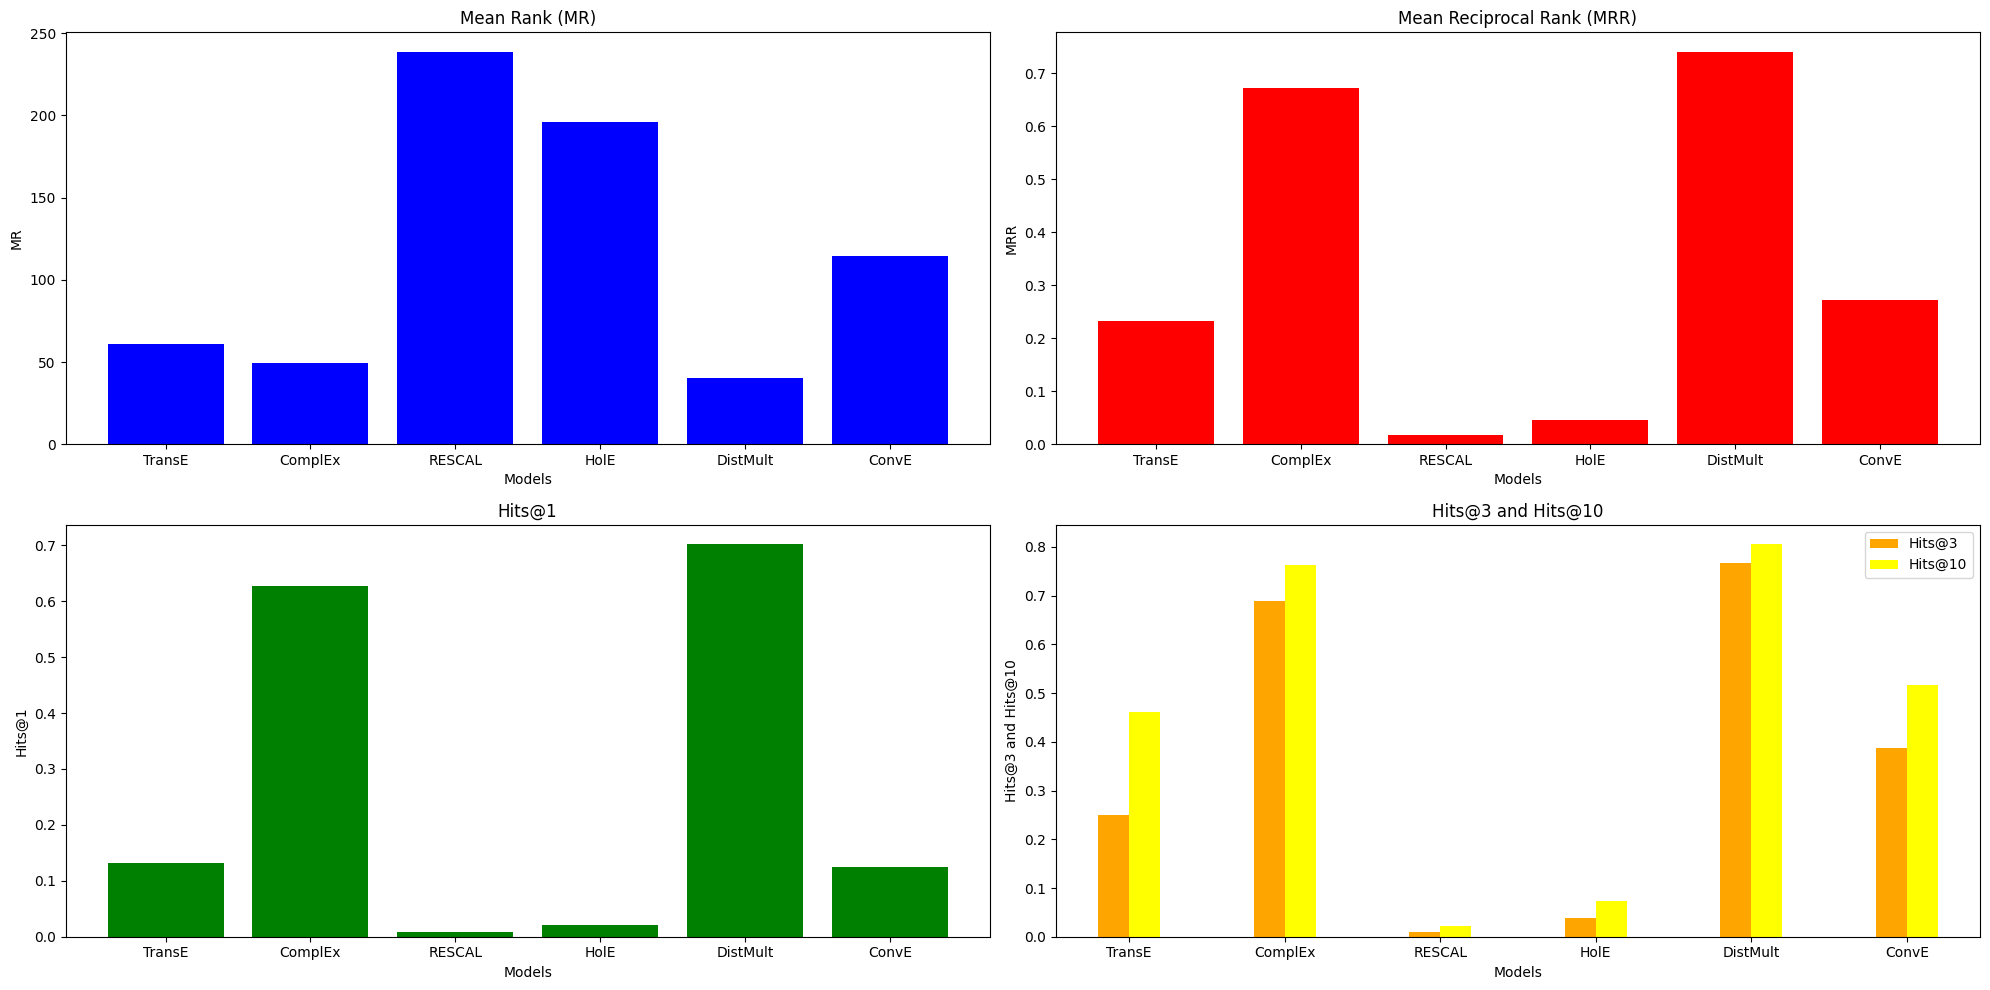

In [23]:
import matplotlib.pyplot as plt

models = ['TransE', 'ComplEx', 'RESCAL', 'HolE', 'DistMult', 'ConvE']


fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Mean Rank
ax[0, 0].bar(models, mr, color='blue')
ax[0, 0].set_title('Mean Rank (MR)')
ax[0, 0].set_xlabel('Models')
ax[0, 0].set_ylabel('MR')

# Mean Reciprocal Rank
ax[0, 1].bar(models, mrr, color='red')
ax[0, 1].set_title('Mean Reciprocal Rank (MRR)')
ax[0, 1].set_xlabel('Models')
ax[0, 1].set_ylabel('MRR')

# Hits@1
ax[1, 0].bar(models, hits_1, color='green')
ax[1, 0].set_title('Hits@1')
ax[1, 0].set_xlabel('Models')
ax[1, 0].set_ylabel('Hits@1')

# Hits@3 and Hits@10 - Adjusted for overlapping bars
# Note: Adjusting the position for clear visualization
positions = range(len(models))  # Positions for the models
width = 0.2  # Width of the bars

# Plotting Hits@3 and Hits@10 with adjusted positions for clarity
ax[1, 1].bar([p - width/2 for p in positions], hits_3, width=width, color='orange', label='Hits@3')
ax[1, 1].bar([p + width/2 for p in positions], hits_10, width=width, color='yellow', label='Hits@10')

ax[1, 1].set_title('Hits@3 and Hits@10')
ax[1, 1].set_xlabel('Models')
ax[1, 1].set_ylabel('Hits@3 and Hits@10')
ax[1, 1].legend()
ax[1, 1].set_xticks(positions)
ax[1, 1].set_xticklabels(models)

plt.tight_layout()
plt.show()